---
# Econometrics of Marketing
## Project 1: RFM segmentation
### MASTER 2 Eco Stat & D3S 
#### TSE
#### 2021-2022
---
Group : Lucie BERTIERE, Marie PHILIPPE, Dot RICART MARTINEZ & Claire SERRAZ  
Top 1 Group



# Libraries



In [ ]:
# Importation of the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime 

In [ ]:
# To connect to the google drive

#from google.colab import drive
#drive.mount('/content/drive')

#import os
#os.chdir("drive/MyDrive/MarketingEconometrics")

# Part 1: Data understanding 

## 1. Load the data 

**Import the 6 csv tables in a Jupyter notebook with Python 3 and look at the first rows of each table.**

In [ ]:
# Loading the data

CUSTOMER = pd.read_csv("CUSTOMER.csv")
CUSTOMER_ADDITIONAL = pd.read_csv("CUSTOMER_ADDITIONAL.csv")
PRODUCTS = pd.read_csv("PRODUCTS.csv")
RECEIPTS = pd.read_csv("RECEIPTS.csv")
REFERENTIAL = pd.read_csv("REFERENTIAL.csv")
STORE = pd.read_csv("STORE.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Set size and style of the plots
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")

# Change the font and size of the text
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=14)          
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)    
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

# Change the text color
plt.rcParams['text.color'] = "black" 
plt.rcParams['axes.labelcolor'] = "black"
plt.rcParams['xtick.color'] = "black"
plt.rcParams['ytick.color'] = "black"

In [ ]:
# 8 first rows of the CUSTOMER data set
CUSTOMER.head(8)

,ID_INDIVIDU,ID_FOYER,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE
0,4,175898,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989
1,27,0,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007
2,34,127060,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007
3,37,0,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007
4,47,0,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008
5,54,0,3,2,NaN,8.0,1975.0,11.0,20.0,06/11/2007
6,84,0,3,2,NaN,2.0,1964.0,1.0,10.0,05/12/2007
7,88,0,3,2,NaN,8.0,1976.0,4.0,25.0,01/01/1989


In [ ]:
# 8 first rows of the CUSTOMER_ADDITIONAL data set
CUSTOMER_ADDITIONAL.head(8)

,ID_INDIVIDU,CODE_MAGASIN,PAYS,ETAT,TAILLE,TAILLE_SG,TAILLE_BONNET
0,4,751,FR,N,38.0,95.0,B
1,27,942,FR,N,38.0,85.0,B
2,34,942,FR,N,42.0,95.0,B
3,37,942,FR,N,42.0,90.0,B
4,47,941,FR,N,40.0,90.0,C
5,54,941,FR,N,40.0,90.0,C
6,84,920,FR,N,36.0,90.0,B
7,88,311,FR,N,36.0,90.0,D


In [ ]:
# 8 first rows of the PRODUCTS data set
PRODUCTS.head(8)

,Ligne,Famille,Libelle_modele,MODELE
0,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100
1,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100B
2,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100C
3,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100D
4,Corseterie,Emboitant,SOUTIEN GORGE ARMATURE,100E
5,Corseterie,Corbeille,SOUTIEN GORGE CORBEILLE,101
6,Corseterie,Corbeille,SOUTIEN GORGE CORBEILLE,101A
7,Corseterie,Corbeille,SOUTIEN GORGE CORBEILLE,101B


In [ ]:
# 8 first rows of the RECEIPTS data set
RECEIPTS.head(8)

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE
0,"""14/12/2013""",3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756
1,"""14/12/2015""",3585211731150,4,175898,81,"""SALE""",10,1,69,0,0,730
2,"""14/12/2013""",3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756
3,"""14/12/2013""",3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756
4,"""02/07/2016""",3585211668319,4,175898,81,"""SALE""",513,1,75,0,0,920
5,"""21/06/2016""",3585211799914,4,175898,81,"""SALE""",545,1,12,3,20,920
6,"""21/06/2016""",3585211803185,4,175898,81,"""SALE""",545,1,41,10,20,920
7,"""21/06/2016""",7000000000201,4,175898,81,"""SALE""",545,1,0,0,100,920


In [ ]:
# 8 first rows of the REFERENTIAL data set
REFERENTIAL.head(8)

,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,EAN
0,42915,31,964,247,CONFE,10,6,10,NaN
1,42916,31,964,247,CONFE,36,1,10,NaN
2,42917,31,964,247,CONFE,36,2,10,NaN
3,42918,31,964,247,CONFE,36,3,10,NaN
4,42919,31,964,247,CONFE,36,6,10,NaN
5,42920,31,964,247,CONFE,61,1,10,NaN
6,42921,31,964,247,CONFE,61,2,10,NaN
7,42922,31,964,247,CONFE,61,3,10,NaN


In [ ]:
# 8 first rows of the STORE data set
STORE.head(8)

,CODE_BOUTIQUE,ID_BOUTIQUE,REGIONS,VILLE,CDP,CENTRE_VILLE,CONCEP,TYPE_MAGASIN,MER_TERRE,REGIONS_COMMERCIAL,QUOTA
0,61,44,Province,Nice,0 6000,Centre Co,ac,mag propre,mer,NaN,150.0
1,62,72,Province,CAP 3000,06700,Centre Commercial,nc,Succursale,Mer,Province,0.0
2,63,75,Province,CANNES,06400,Centre ville,nc,Succursale,Mer,Province,0.0
3,121,106,Province,RODEZ,12000,Centre ville,nv,Affilié,Mer,Province,0.0
4,130,38,Province,MARSEILLE,13001,Centre ville,ac,Succursale,Mer,Province,150.0
5,131,19,Province,AIX EN PROVENCE,13100,Centre ville,ac,Succursale,Mer,Province,300.0
6,141,28,Province,CAEN,14000,Centre ville,ac,Succursale,Mer,Province,150.0
7,142,102,Province,DEAUVILLE,14800,Centre ville,nv,Succursale,Mer,Province,0.0


**Complete the following data relational schema with the link between tables.**

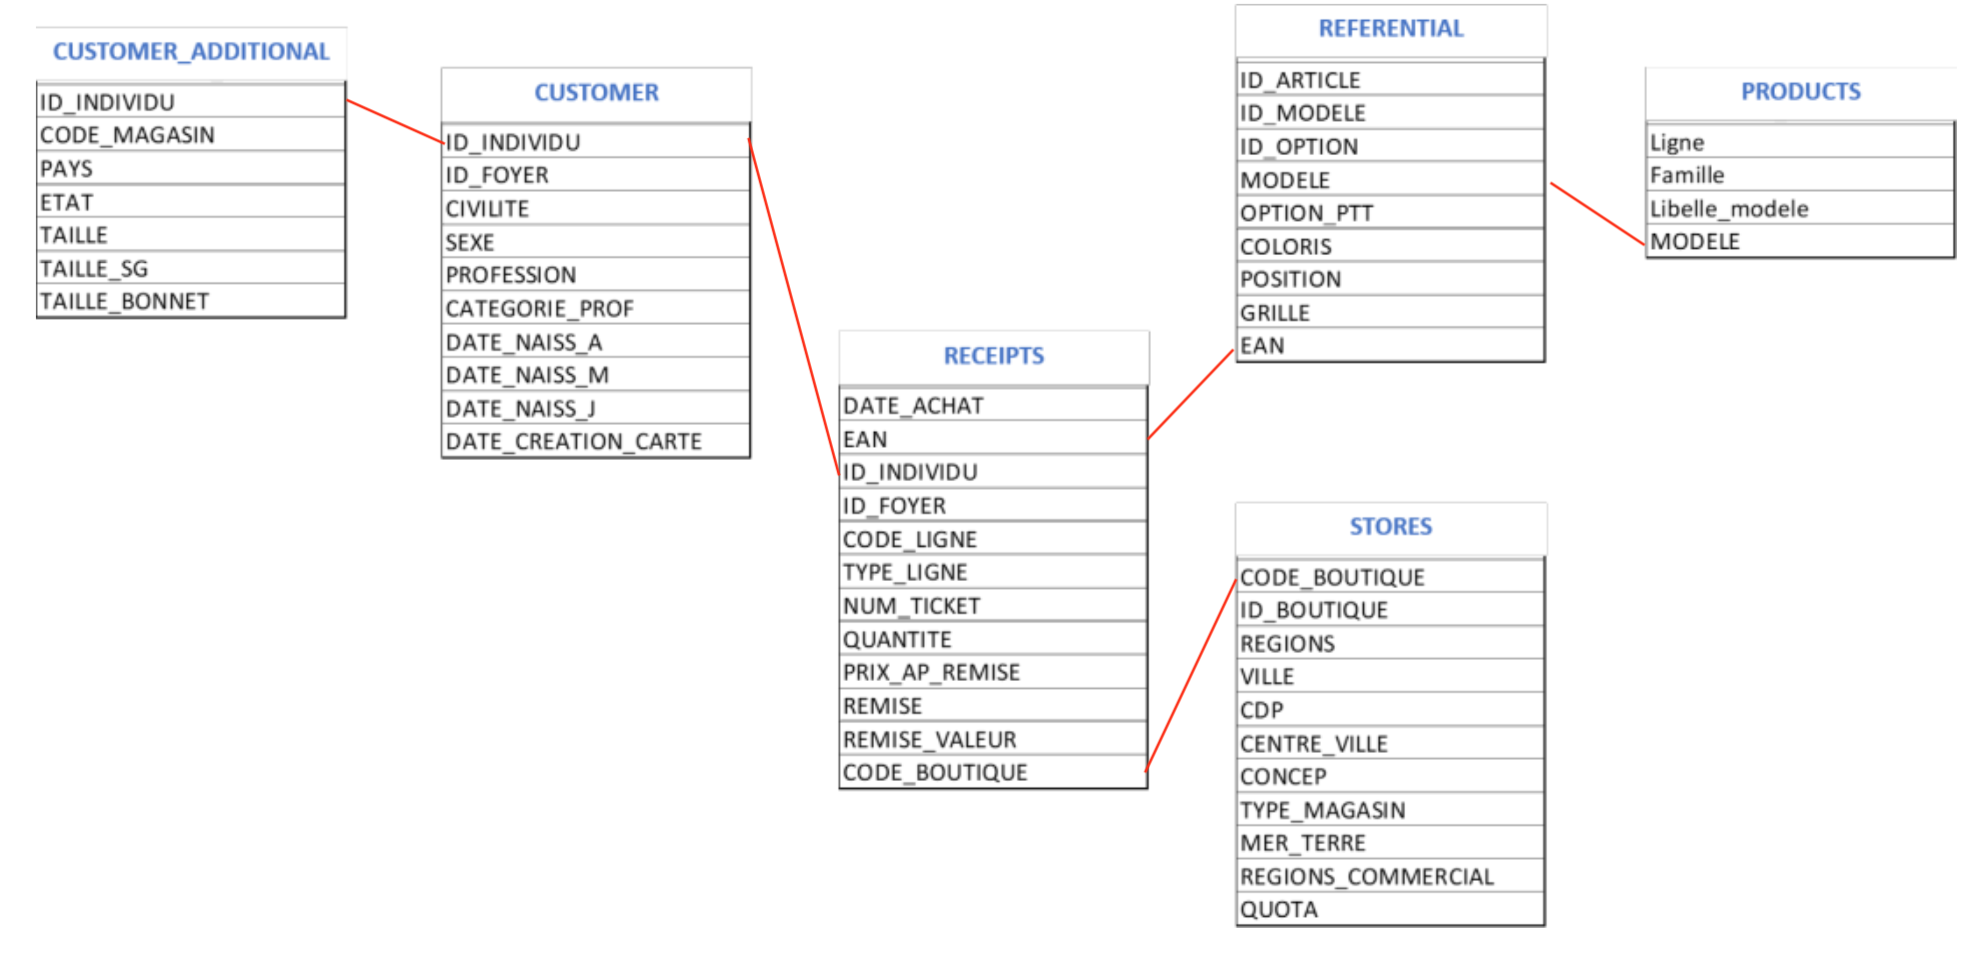

## 2. Selection and merging of the data

### Build the CUSTOMERS_INFO and the RECEIPTS_INFO tables containing all the information as follows: 


In [ ]:
# Dataframes copies of the data are created before changes are made

CUSTOMER_copy = CUSTOMER.copy()
CUSTOMER_ADDITIONAL_copy = CUSTOMER_ADDITIONAL.copy()
PRODUCTS_copy = PRODUCTS.copy()
RECEIPTS_copy = RECEIPTS.copy()
REFERENTIAL_copy = REFERENTIAL.copy()
STORE_copy = STORE.copy()


**Join the CUSTOMER’s dimensions (CUSTOMER and CUSTOMER_ADDITIONAL)**
- Drop ID_FOYER
- Keep Code_magasin from CUSTOMER_ADDITIONAL
- Code_magasin will be renamed MANAGING_STORE not to confuse it with Code_magasin from RECEIPTS table


**Questions**
- What is the type of merging to use? What are the tables of reference?
- What are the merging keys of each table? 



We are using a left merge : it uses only keys from the left frame even if there are no corresponding keys in the right frame.

The reference table is the **Customer** table to which we add more information that are in the Customer_additional table and for that we use **ID_CUSTOMER** as the key.

In [ ]:
# Here are the dimensions of the two tables we will merge
print("Shape of the Customer table :",CUSTOMER.shape)
print("Shape of the Customer_additional table :",CUSTOMER_ADDITIONAL.shape)

Shape of the Customer table : (36157, 10)
Shape of the Customer_additional table : (36157, 7)


In [ ]:
# Drop ID_FOYER
CUSTOMER = CUSTOMER.drop(columns = ['ID_FOYER'])

# We merge Customer with Customer_additional, table from which we keep only Code_magasin and the key to merge 
CUSTOMERS_INFO = CUSTOMER.merge(CUSTOMER_ADDITIONAL[['ID_INDIVIDU', 'CODE_MAGASIN']], on ='ID_INDIVIDU', how ='left')

# Rename MANAGING_STORE
CUSTOMERS_INFO.rename(columns = {'CODE_MAGASIN':'MANAGING_STORE'}, inplace = True)

# 8 first rows of the CUSTOMERS_INFO data set
CUSTOMERS_INFO.head(8)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE,MANAGING_STORE
0,4,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989,751
1,27,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007,942
2,34,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007,942
3,37,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007,942
4,47,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008,941
5,54,3,2,NaN,8.0,1975.0,11.0,20.0,06/11/2007,941
6,84,3,2,NaN,2.0,1964.0,1.0,10.0,05/12/2007,920
7,88,3,2,NaN,8.0,1976.0,4.0,25.0,01/01/1989,311


**Join the RECEIPTS’s dimensions (STORE, REFERENTIAL, PRODUCTS and RECEIPTS)**
- Keep only Ligne and Famille from PRODUCTS
- Keep only REGIONS, CENTRE_VILLE, TYPE_MAGASIN and
REGIONS_COMMERCIAL from STORE

**Questions**
- What is the type of merging to use? What are the tables of reference?
- What are the merging keys of each table? 

Here we also use the left join, which means that even if we have no correspondance in the right frame, we keep the keys of the left frame.


The reference table is the **RECEIPTS** table to which we add more information that are in the REFERENTIAL, PRODUCTS and STORE tables.



*   For the merge with the REFERENTIAL table the key is **EAN** (bar code).
*   For the merge with the PRODUCTS table the key is **MODELE**.
*   For the merge with the STORE table the key is **CODE_BOUTIQUE**.



In [ ]:
# Here are the dimensions of the four tables we will merge

print("Shape of the RECEIPTS_INFO table :",RECEIPTS.shape)
print("Shape of the REFERENTIAL table :",REFERENTIAL.shape)
print("Shape of the PRODUCTS table :",PRODUCTS.shape)
print("Shape of the STORE table :",STORE.shape)

Shape of the RECEIPTS_INFO table : (332736, 12)
Shape of the REFERENTIAL table : (66661, 9)
Shape of the PRODUCTS table : (206, 4)
Shape of the STORE table : (113, 11)


In [ ]:
# We want the EAN to be an object and not a numeric
RECEIPTS['EAN'] = RECEIPTS['EAN'].astype('object')

# First merge: RECEIPTS with REFERENTIAL
RECEIPTS_INFO = RECEIPTS.merge(REFERENTIAL, on = 'EAN', how = 'left')

# Second merge: the previous merge (Receipts_info) with PRODUCTS from which we keep only Ligne, Famille and Modele (the key for the merge)
RECEIPTS_INFO = RECEIPTS_INFO.merge(PRODUCTS[['MODELE', 'Ligne', 'Famille']], on='MODELE', how='left')

# We rename two columns to have them in uppercase like the others
RECEIPTS_INFO.rename(columns = {'Ligne':'LIGNE', 'Famille': 'FAMILLE'}, inplace = True)

# Third merge: the previous merge (Receipts_info) with STORE from which we keep only REGIONS, CENTRE_VILLE, TYPE_MAGASIN, 
# REGIONS_COMMERCIAL and CODE_BOUTIQUE (the key for the merge)
RECEIPTS_INFO = RECEIPTS_INFO.merge(STORE[['CODE_BOUTIQUE', 'REGIONS', 'CENTRE_VILLE', 'TYPE_MAGASIN', 'REGIONS_COMMERCIAL']], on = 'CODE_BOUTIQUE', how = 'left')

# 8 first rows of the RECEIPTS_INFO data set
RECEIPTS_INFO.head(8)

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
0,"""14/12/2013""",3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,41656.0,21.0,1249.0,128,PROME,10.0,2.0,10.0,Corseterie,String/Tanga,Paris,Centre ville,Succursale,Paris
1,"""14/12/2015""",3585211731150,4,175898,81,"""SALE""",10,1,69,0,0,730,60020.0,116.0,12128.0,222,MERVE,41.0,4.0,3.0,Homewear,Homewear_Ensemble,Province,Centre ville,Affilié,Province
2,"""14/12/2013""",3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,150.0,7.0,136.0,FAVORI,AGEND,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris
3,"""14/12/2013""",3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,45761.0,19.0,3056.0,122,SULFU,93.0,1.0,10.0,Corseterie,String/Tanga,Paris,Centre ville,Succursale,Paris
4,"""02/07/2016""",3585211668319,4,175898,81,"""SALE""",513,1,75,0,0,920,54398.0,136.0,8251.0,503,CAPFE,20.0,4.0,3.0,Bain,Bain_Maillot,Paris,Centre Commercial,Succursale,Paris
5,"""21/06/2016""",3585211799914,4,175898,81,"""SALE""",545,1,12,3,20,920,63264.0,20.0,13923.0,124,ILOVE,45.0,1.0,10.0,Corseterie,Short,Paris,Centre Commercial,Succursale,Paris
6,"""21/06/2016""",3585211803185,4,175898,81,"""SALE""",545,1,41,10,20,920,63979.0,593.0,14580.0,116B,OMBRE,10.0,4.0,25.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
7,"""21/06/2016""",7000000000201,4,175898,81,"""SALE""",545,1,0,0,100,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Centre Commercial,Succursale,Paris


## 3. Understanding the data 
Before starting the audit of a database, it is important to understand how the different types of data are linked.


- To help you, you can study the data of a particular customer: deduce from the analysis of the customer 174591 a rule for identifying a purchase receipt.


In [ ]:
# Creating a table with only the customer 174591
customer_174591 = RECEIPTS_INFO[RECEIPTS_INFO.ID_INDIVIDU == 174591]

# Sorting the values by the date of purchase 
# Displaying only the 10 first rows of the data frame
customer_174591.sort_values("DATE_ACHAT").head(10)

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
218998,"""04/11/2015""",7000000000096,174591,171526,81,"""SALE""",18,1,0,0,100,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
219007,"""04/11/2015""",3585211375200,174591,171526,81,"""SALE""",18,1,39,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
219010,"""04/11/2015""",3585211392887,174591,171526,81,"""SALE""",18,1,27,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
219011,"""04/11/2015""",3585211729034,174591,171526,81,"""SALE""",18,1,39,0,0,831,59980.0,29.0,12088.0,244,MAMZE,21.0,3.0,10.0,Homewear,Homewear_Bas,Province,Centre ville,Succursale,Province
219001,"""04/11/2015""",3585211726507,174591,171526,81,"""SALE""",18,1,32,0,0,831,60255.0,21.0,12363.0,128,RAVIS,30.0,3.0,10.0,Corseterie,String/Tanga,Province,Centre ville,Succursale,Province
219008,"""04/11/2015""",3585211380143,174591,171526,81,"""SALE""",18,1,27,0,0,831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
218997,"""04/11/2015""",3585211726255,174591,171526,81,"""SALE""",18,1,0,49,100,831,60214.0,229.0,12322.0,101D,RAVIS,30.0,5.0,25.0,Corseterie,Corbeille,Province,Centre ville,Succursale,Province
219009,"""04/11/2015""",3585211728990,174591,171526,81,"""SALE""",18,1,39,0,0,831,59976.0,29.0,12084.0,244,MAMZE,10.0,3.0,10.0,Homewear,Homewear_Bas,Province,Centre ville,Succursale,Province
218995,"""05/11/2015""",3585211726262,174591,171526,81,"""SALE""",1,1,49,0,0,831,60215.0,229.0,12323.0,101D,RAVIS,30.0,6.0,25.0,Corseterie,Corbeille,Province,Centre ville,Succursale,Province
218994,"""05/11/2015""",3585211734342,174591,171526,81,"""SALE""",1,1,39,0,0,831,59394.0,35.0,11935.0,252,FLANE,4101.0,3.0,10.0,Homewear,Homewear_Haut,Province,Centre ville,Succursale,Province


In [ ]:
f'For customer 174591 we have {customer_174591.shape[0]} lines. Each line of RECEIPTS_INFO represents an action defined by one ID_INDIVIDU, one CODE_BOUTIQUE, one NUM_TICKET and one DATE_ACHAT.'

'For customer 174591 we have 82 lines. Each line of RECEIPTS_INFO represents an action defined by one ID_INDIVIDU, one CODE_BOUTIQUE, one NUM_TICKET and one DATE_ACHAT.'

***One receipt corresponds to one ID_INDIVIDU x CODE_BOUTIQUE x NUM_TICKET x DATE_ACHAT***

- From the 2 databases previously built, study the consistency of the following variables with relevant univariate distribution and cross repartitions.

***More explanation at the end of this part.***


In [ ]:
f'RECEIPTS_INFO is composed of {RECEIPTS_INFO.shape[0]} observations and {RECEIPTS_INFO.shape[1]} columns.'

'RECEIPTS_INFO is composed of 332736 observations and 26 columns.'

In [ ]:
# List of all the columns that are in the table RECEIPTS_INFO
RECEIPTS_INFO.columns

Index(['DATE_ACHAT', 'EAN', 'ID_INDIVIDU', 'ID_FOYER', 'CODE_LIGNE',
       'TYPE_LIGNE', 'NUM_TICKET', 'QUANTITE', 'PRIX_AP_REMISE', 'REMISE',
       'REMISE_VALEUR', 'CODE_BOUTIQUE', 'ID_ARTICLE', 'ID_MODELE',
       'ID_OPTION', 'MODELE', 'OPTION_PTT', 'COLORIS', 'POSITION', 'GRILLE',
       'LIGNE', 'FAMILLE', 'REGIONS', 'CENTRE_VILLE', 'TYPE_MAGASIN',
       'REGIONS_COMMERCIAL'],
      dtype='object')

In [ ]:
# The type of each variable of this data frame
RECEIPTS_INFO.dtypes

DATE_ACHAT             object
EAN                    object
ID_INDIVIDU             int64
ID_FOYER                int64
CODE_LIGNE              int64
TYPE_LIGNE             object
NUM_TICKET              int64
QUANTITE                int64
PRIX_AP_REMISE          int64
REMISE                  int64
REMISE_VALEUR           int64
CODE_BOUTIQUE           int64
ID_ARTICLE            float64
ID_MODELE             float64
ID_OPTION             float64
MODELE                 object
OPTION_PTT             object
COLORIS               float64
POSITION              float64
GRILLE                float64
LIGNE                  object
FAMILLE                object
REGIONS                object
CENTRE_VILLE           object
TYPE_MAGASIN           object
REGIONS_COMMERCIAL     object
dtype: object

In [ ]:
# We put in the list all the variables we want to study
columns_of_interest = ["REGIONS", "CENTRE_VILLE", "TYPE_MAGASIN", "REGIONS_COMMERCIAL", "MODELE", 
                      "LIGNE", "FAMILLE", "EAN", "PRIX_AP_REMISE", "QUANTITE", "REMISE_VALEUR"]

# We compute the basic summary statistics
RECEIPTS_INFO[columns_of_interest].describe(include='all')

,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,MODELE,LIGNE,FAMILLE,EAN,PRIX_AP_REMISE,QUANTITE,REMISE_VALEUR
count,332731,332731,332731,330309,285742,256454,256454,3.327360e+05,332736.000000,332736.000000,332736.000000
unique,2,3,3,2,234,3,15,2.065200e+04,NaN,NaN,NaN
top,Province,Centre ville,Succursale,Province,128,Corseterie,String/Tanga,3.585212e+12,NaN,NaN,NaN
freq,217044,237672,308969,214622,23562,198243,44179,5.712000e+03,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.121210,1.000192,17.396173
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.934751,0.021231,40.670952
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,1.000000,0.000000


**Features to analyze in RECEIPTS_INFO**:
- REGIONS


In [ ]:
# We display the frequency of each modalities of the variable REGIONS
tab_REGIONS = RECEIPTS_INFO["REGIONS"].astype(str).value_counts(ascending = False, normalize = True)*100
tab_REGIONS

# Not so many missing values, only 2 modalities, with more stores in Province

Province    65.230092
Paris       34.768405
nan          0.001503
Name: REGIONS, dtype: float64

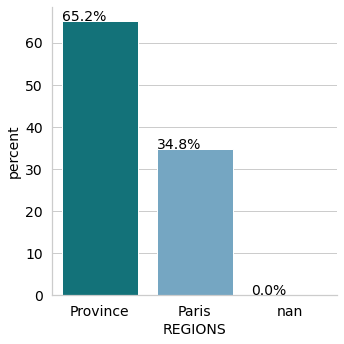

In [ ]:
# We draw the barplot of the variable region

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (tab_REGIONS.shape[0]):
   l.append({"REGIONS":tab_REGIONS.index[i], "percent":tab_REGIONS[i]})

# We transform this dictionnary into a dataframe
df = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "REGIONS", y = "percent", kind= 'bar',data = df, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)

- CENTRE_VILLE


In [ ]:
# We display the frequency of each modalities of the variable CENTRE_VILLE
tab_CENTRE_VILLE = RECEIPTS_INFO["CENTRE_VILLE"].astype(str).value_counts(normalize=True)*100
tab_CENTRE_VILLE

# There are 3 modalities, but 2 seem to be the same : "Centre co" and "Centre commercial"

Centre ville         71.429602
Centre Commercial    27.840991
Centre Co             0.727904
nan                   0.001503
Name: CENTRE_VILLE, dtype: float64

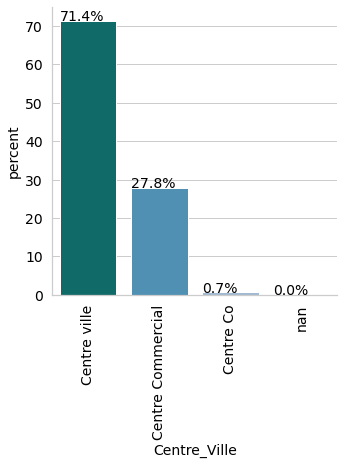

In [ ]:
# We draw the barplot of the variable CENTRE_VILLE

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (tab_CENTRE_VILLE.shape[0]):
   l.append({"Centre_Ville":tab_CENTRE_VILLE.index[i], "percent":tab_CENTRE_VILLE[i]})

# We transform this dictionnary into a dataframe
df = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "Centre_Ville", y = "percent", kind= 'bar',data = df, palette = 'PuBuGn_r')
plt.xticks(rotation='vertical')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)

- TYPE_MAGASIN


In [ ]:
# We display the frequency of each modalities of the variable TYPE_MAGASIN
tab_TYPE_MAGASIN = RECEIPTS_INFO["TYPE_MAGASIN"].astype(str).value_counts(normalize=True)*100
tab_TYPE_MAGASIN

# There are 3 modalities, "Succursale" is the one with the highest frequency (almost 93%)

Succursale    92.857100
Affilié        6.413493
mag propre     0.727904
nan            0.001503
Name: TYPE_MAGASIN, dtype: float64

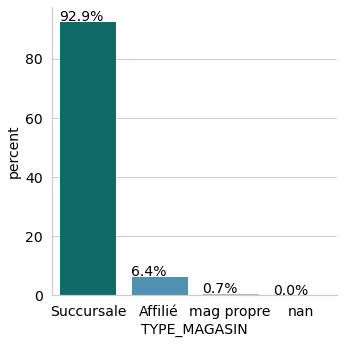

In [ ]:
# We draw the barplot of the variable TYPE_MAGASIN

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (tab_TYPE_MAGASIN.shape[0]):
   l.append({"TYPE_MAGASIN":tab_TYPE_MAGASIN.index[i], "percent":tab_TYPE_MAGASIN[i]})

# We transform this dictionnary into a dataframe
df = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "TYPE_MAGASIN", y = "percent", kind= 'bar',data = df, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)

- REGIONS_COMMERCIAL


In [ ]:
# We display the frequency of each modalities of the variable REGIONS_COMMERCIAL
tab_REGIONS_COMMERCIAL = RECEIPTS_INFO["REGIONS_COMMERCIAL"].astype(str).value_counts(normalize=True)*100
tab_REGIONS_COMMERCIAL

# This variable seems to give the same information as the variable "REGIONS" but with more "nan" values

Province    64.502188
Paris       34.768405
nan          0.729407
Name: REGIONS_COMMERCIAL, dtype: float64

In [ ]:
# To see if REGIONS_COMMERCIAL gives sthe same information as REGIONS we plot a crosstab

pd.crosstab(RECEIPTS_INFO["REGIONS"],RECEIPTS_INFO["REGIONS_COMMERCIAL"], margins = True)

# Both columns contains similar information
# We choose the feature with the smaller number of missing values : "REGIONS"

REGIONS_COMMERCIAL,Paris,Province,All
REGIONS,,,
Paris,115687,0,115687
Province,0,214622,214622
All,115687,214622,330309



- MODELE


In [ ]:
# We display the frequency of the top 10 modalities of the variable MODELE
tab_MODELE = RECEIPTS_INFO["MODELE"].astype(str).value_counts(normalize=True)*100
tab_MODELE.head(10)

# We have quite a lot of missing values (14%)

nan     14.123509
128      7.081290
124      6.154429
FAVO     5.921511
122      5.893561
120      5.487534
140      2.686214
119      2.599959
106B     2.346305
127      2.080628
Name: MODELE, dtype: float64

In [ ]:
# The stores contain 234 modeles in total (-1 because of nan)
len(tab_MODELE)-1

234

- LIGNE


In [ ]:
# We display the frequency of the top 10 modalities of the variable LIGNE
tab_LIGNE = RECEIPTS_INFO["LIGNE"].astype(str).value_counts(normalize=True)*100
tab_LIGNE

# There is a lot of missing values (almost 23%) and 3 modalities

Corseterie    59.579667
nan           22.925683
Bain           8.887526
Homewear       8.607124
Name: LIGNE, dtype: float64

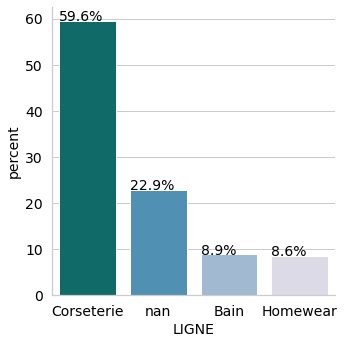

In [ ]:
# We draw the barplot of the variable LIGNE

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (tab_LIGNE.shape[0]):
   l.append({"LIGNE":tab_LIGNE.index[i], "percent":tab_LIGNE[i]})

# We transform this dictionnary into a dataframe
df = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "LIGNE", y = "percent", kind= 'bar',data = df, palette = 'PuBuGn_r')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)

- FAMILLE


In [ ]:
# We display the frequency of the top 10 modalities of the variable FAMILLE
tab_FAMILLE = RECEIPTS_INFO["FAMILLE"].astype(str).value_counts(normalize=True)*100
print(tab_FAMILLE)
print("")

# The stores contains 15 families of lingery in total (-1 because of nan)
print("Number of families : ", len(tab_FAMILLE)-1)

# There is a lot of missing values (the same number as the variable LIGNE)

nan                         22.925683
String/Tanga                13.277493
Slip                        12.167304
Short                        7.753895
Bain_Maillot                 6.507562
Push-up                      6.065770
Emboitant                    5.029212
Triangle/Brassiere           4.443162
Corbeille                    4.130302
Corseterie_PP                3.808124
Homewear_Haut                3.510892
Corbeille mousse/Bandeau     2.975933
Homewear_Bas                 2.668482
Homewear_Ensemble            2.427751
Bain_Beachwear               2.264859
Bustier/Guepiere             0.043578
Name: FAMILLE, dtype: float64

Number of families :  15


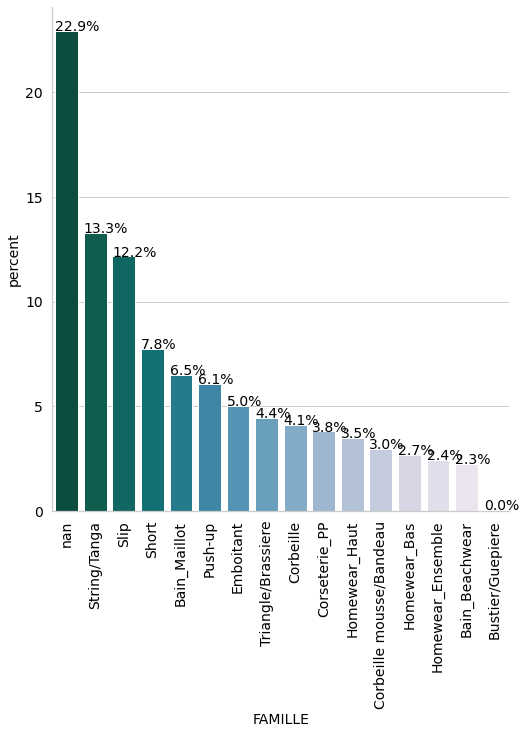

In [ ]:
# We draw the barplot of the variable FAMILLE

l = []

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (tab_FAMILLE.shape[0]):
   l.append({"FAMILLE":tab_FAMILLE.index[i], "percent":tab_FAMILLE[i]})

# We transform this dictionnary into a dataframe
df = pd.DataFrame(l)

# We plot the barplot (without the frequencies)
g = sns.catplot(x = "FAMILLE", y = "percent", kind= 'bar',data = df, palette = 'PuBuGn_r', height=8)
plt.xticks(rotation='vertical')

# We add the frequencies at the top of each bar
for p in g.ax.patches:
   txt = str(p.get_height().round(1)) + '%'
   txt_x = p.get_x()
   txt_y = p.get_height()
   g.ax.text(txt_x,txt_y,txt)


In [ ]:
# We do a crosstab of the variables LIGNE and FAMILLE
pd.crosstab(RECEIPTS_INFO["LIGNE"].astype(str),RECEIPTS_INFO["FAMILLE"].astype(str), margins = True)

# We see that when the variable LIGNE has a "nan" the variable FAMILLE has one too

FAMILLE,Bain_Beachwear,Bain_Maillot,Bustier/Guepiere,Corbeille,Corbeille mousse/Bandeau,Corseterie_PP,Emboitant,Homewear_Bas,Homewear_Ensemble,Homewear_Haut,Push-up,Short,Slip,String/Tanga,Triangle/Brassiere,nan,All
LIGNE,,,,,,,,,,,,,,,,,
Bain,7536,21653,0,0,0,0,0,0,0,0,2,0,0,0,381,0,29572
Corseterie,0,0,145,13743,9902,12671,16734,0,0,0,20181,25800,40485,44179,14403,0,198243
Homewear,0,0,0,0,0,0,0,8879,8078,11682,0,0,0,0,0,0,28639
nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76282,76282
All,7536,21653,145,13743,9902,12671,16734,8879,8078,11682,20183,25800,40485,44179,14784,76282,332736


- EAN


In [ ]:
# We display the top 10 frequencies of the variable EAN
tab_EAN = RECEIPTS_INFO["EAN"].astype(str).value_counts(normalize=True)*100
tab_EAN.head(10)

# We can't do any descriptive statistics for this variable as we have a lot of modalities

3585211608377    1.716676
7000000000089    0.825880
3585211862847    0.768477
3585211627743    0.672305
7000000000096    0.598673
3585211779459    0.439087
7000000000102    0.367859
7000000000119    0.337204
3585211067143    0.272588
7000000000195    0.231415
Name: EAN, dtype: float64

In [ ]:
# The stores contain 20652 references in total 
len(tab_EAN)

20652

- PRIX_AP_REMISE


In [ ]:
# We display some statistics of the variable PRIX_AP_REMISE
RECEIPTS_INFO["PRIX_AP_REMISE"].describe(include='all')

# The average price of a product (after discount) is of 27€, but some articles are "free" 
# and the maximum price is of 225€

count    332736.000000
mean         27.121210
std          16.934751
min           0.000000
25%          19.000000
50%          28.000000
75%          39.000000
max         225.000000
Name: PRIX_AP_REMISE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


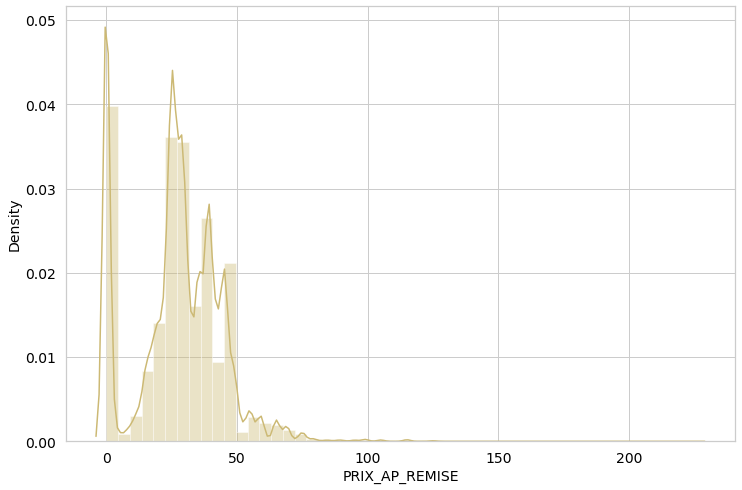

In [ ]:
# We display the ditribution plot of the variable PRIX_AP_REMISE
sns.distplot(RECEIPTS_INFO["PRIX_AP_REMISE"], color = 'y')

# There are some extreme values wich are the products that have a price over 100€ (really small densities)
# and there are a lot of 0€ prices

- QUANTITE


In [ ]:
# We display some statistics of the variable QUANTITE
RECEIPTS_INFO["QUANTITE"].describe(include='all')

# On average people tend to buy only once a product

count    332736.000000
mean          1.000192
std           0.021231
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: QUANTITE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


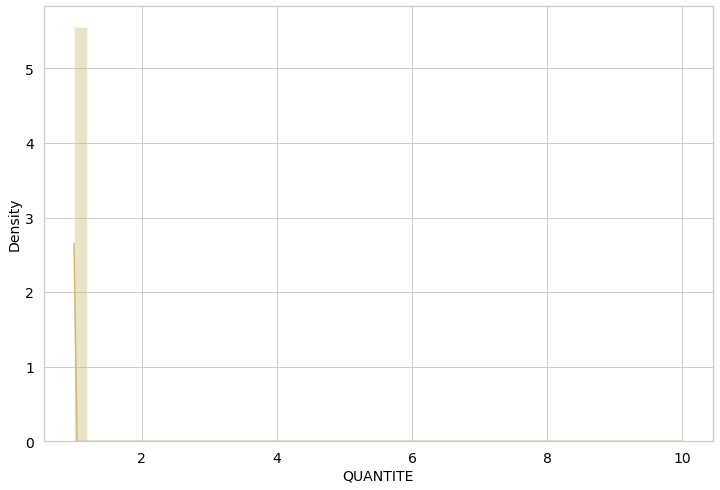

In [ ]:
# We display the ditribution plot of the variable QUANTITE
sns.distplot(RECEIPTS_INFO["QUANTITE"], color = 'y')

# There are some extreme values, those who buy more than 1 time the product

In [ ]:
# We diplay the number of purchase by quantities
tab_QUANTITE = RECEIPTS_INFO["QUANTITE"].value_counts()
tab_QUANTITE

# There is only 1 purchase for the quantity 3, 5 and 10.

1     332684
2         49
10         1
5          1
3          1
Name: QUANTITE, dtype: int64

- REMISE_VALEUR

In [ ]:
# We display some statistics of the variable REMISE_VALEUR
RECEIPTS_INFO["REMISE_VALEUR"].describe(include='all')

# On average the discount is of 17€, it might be biased by the maximum value of 8520€

count    332736.000000
mean         17.396173
std          40.670952
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        8520.000000
Name: REMISE_VALEUR, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


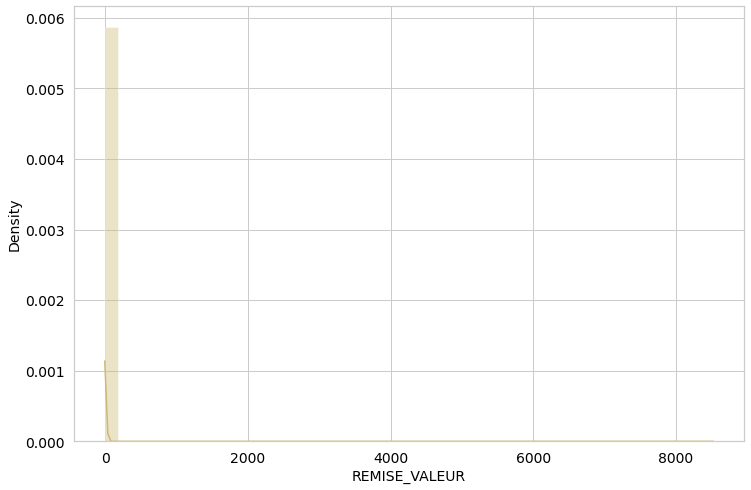

In [ ]:
# We display the ditribution plot of the variable REMISE_VALEUR
sns.distplot(RECEIPTS_INFO["REMISE_VALEUR"], color = 'y')

In [ ]:
# we diplay the number of purchase by discount values
tab_REMISE_VALEUR = RECEIPTS_INFO["REMISE_VALEUR"].value_counts()
tab_REMISE_VALEUR

# there is only one purchase with the big discount of more than 8000€

0       273152
100      57326
20         675
10         578
30         455
1          281
40         181
50          38
5           27
35           6
11           4
1007         2
1004         2
25           1
22           1
19           1
31           1
8520         1
144          1
4            1
177          1
29           1
Name: REMISE_VALEUR, dtype: int64

**Features to analyze in CUSTOMERS_INFO**:


In [ ]:
f'CUSTOMERS_INFO is composed of {CUSTOMERS_INFO.shape[0]} observations and {CUSTOMERS_INFO.shape[1]} columns.'

'CUSTOMERS_INFO is composed of 36157 observations and 10 columns.'

In [ ]:
# List of the columns in the table CUSTOMERS_INFO
CUSTOMERS_INFO.columns

Index(['ID_INDIVIDU', 'CIVILITE', 'SEXE', 'PROFESSION', 'CATEGORIE_PROF',
       'DATE_NAISS_A', 'DATE_NAISS_M', 'DATE_NAISS_J', 'DATE_CREATION_CARTE',
       'MANAGING_STORE'],
      dtype='object')

In [ ]:
# Types of the variables of the table CUSTOMERS_INFO
CUSTOMERS_INFO.dtypes

ID_INDIVIDU              int64
CIVILITE                 int64
SEXE                     int64
PROFESSION             float64
CATEGORIE_PROF         float64
DATE_NAISS_A           float64
DATE_NAISS_M           float64
DATE_NAISS_J           float64
DATE_CREATION_CARTE     object
MANAGING_STORE           int64
dtype: object

- Age


In [ ]:
# The variable AGE does not exist so we decided to create it

# First we keep only the year of the birth that are not missing
Birth_year = CUSTOMERS_INFO.loc[CUSTOMERS_INFO.DATE_NAISS_A.notnull(), ["DATE_NAISS_A"]]

# We compute the age by substracting the last year available in the data with the birth year computed before
AGE = 2016 - Birth_year

# we display some statistics
AGE.describe()

# On average customers are 43 years old
# But it might be biased by the minimum which is negative and by the maximum which is really high 
# (more than 100 years old)

,DATE_NAISS_A
count,35242.000000
mean,43.451024
std,19.285886
min,-34.000000
25%,38.000000
50%,45.000000
75%,53.000000
max,116.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Age')]

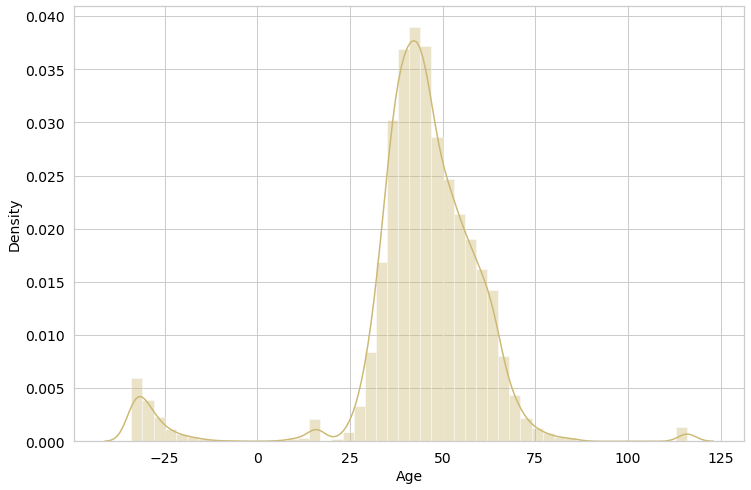

In [ ]:
# We display the ditribution plot of the variable
fig_age = sns.distplot(AGE, color = 'y')
fig_age.set(xlabel='Age')

- Seniority

In [ ]:
# The variable SENIORITY does not exist so we decided to create it 

# We put the good fromat to the variable DATE_CREATION_CARTE and we keep only the year
date_card = pd.to_datetime(CUSTOMERS_INFO.DATE_CREATION_CARTE).dt.year

# We compute the age by substracting the last year available in the data with the creation year of the 
# card computed before
Seniority = 2016 - date_card

# We display some statistics of the variable 
Seniority.describe()

# On average people have a card since more than 4 years.
# We have an extreme value with someone who has the card since 27 years.

count    36157.000000
mean         4.786653
std          3.636038
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: DATE_CREATION_CARTE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Seniority')]

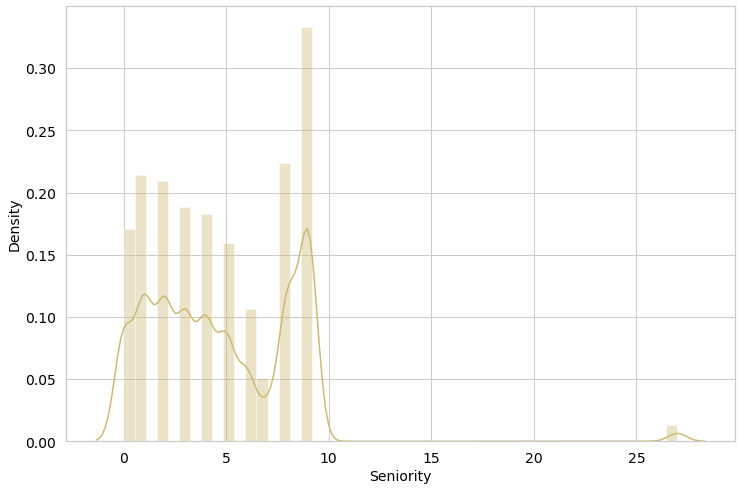

In [ ]:
# We display the ditribution plot of the variable
fig_sen = sns.distplot(Seniority, color = 'y')
fig_sen.set(xlabel='Seniority')

In [ ]:
# We diplay the number of purchase by seniority
Seniority.value_counts()

# There are quite a few people that have the card since 27 years : more than 250 customers

9     6502
8     4376
1     4186
2     4085
3     3685
4     3562
0     3331
5     3107
6     2070
7      995
27     258
Name: DATE_CREATION_CARTE, dtype: int64

 Analyze a particular customer to understand missing data 
 
 - Focus on the MODELE variable and especially on the modalities ACCES, DIVE, DIVERS, FAVO, FAVORI, PACK, PLV 

 - Identify potential inconsistencies and submit adequate management rules

In [ ]:
# We display the top 10 frequencies of the variable MODELE
(RECEIPTS_INFO["MODELE"].astype(str).value_counts(ascending = False, normalize = True)*100).head(10)

nan     14.123509
128      7.081290
124      6.154429
FAVO     5.921511
122      5.893561
120      5.487534
140      2.686214
119      2.599959
106B     2.346305
127      2.080628
Name: MODELE, dtype: float64

In [ ]:
# We display all the types of models available in the data frame
RECEIPTS_INFO.MODELE.unique()

# Reminder : There are 234 type of models

array(['128', '222', 'FAVORI', '122', '503', '124', '116B', nan, '536',
       '525', '529D', '106B', '502', '540', '200', '156B', 'FAVO', '506',
       '523B', '507', '126', '104C', '119', '101B', '120', '100B', '100C',
       '169', '151C', '121', 'DIVERS', '106A', '102A', '101A', '104A',
       '127', '151B', '107A', '247', '526B', '102C', '106C', 'ACCESS',
       '105B', '340', '523C', '298', '238', '102B', '248', '253', '542',
       '245', '107B', '270', '100E', '141', '112C', '101D', '140', '244',
       '100', '512B', '273', '541', '260', '104B', '138', '277', '113',
       'PLV', '101C', '552', '112B', '208', '105A', '557', '289', '527',
       '549', '107D', '100D', '566', '529B', '529C', '516D', '151D',
       '341', '156C', '103C', 'E02COR', '256', '226', '103B', '538',
       '501', '505B', '905', '219', '550', '520', '523D', '110C', '110B',
       '252', '523E', '510B', '110A', '112A', '551', '535', '567', '107C',
       '522B', '276', '105C', '156A', '568', '505D', '254'

In [ ]:
# We now focus on these models
models_list = ["ACCES", "DIVE", "DIVERS", "FAVO", "FAVORI", "PACK", "PLV"]

# We create a data frame with only the purchases of those models
Focus_MODELE = RECEIPTS_INFO[RECEIPTS_INFO.MODELE.isin(models_list)]

# We display the 10 first rows of the data frame
Focus_MODELE.head(10)

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
2,"""14/12/2013""",3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,150.0,7.0,136.0,FAVORI,AGEND,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris
20,"""21/04/2015""",3585211761911,34,127060,81,"""SALE""",2,1,0,0,100,942,58196.0,7.0,11029.0,FAVO,FVANI,13.0,1.0,5.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
34,"""30/09/2014""",3585211695902,34,127060,81,"""SALE""",8,1,0,0,100,942,53368.0,7.0,7628.0,FAVO,EXCLU,11.0,3.0,4.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
35,"""08/03/2013""",3585211253812,34,127060,81,"""SALE""",9,1,0,0,100,942,40546.0,7.0,1141.0,FAVORI,CDFA1,13.0,1.0,5.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
37,"""17/03/2015""",3585211767524,34,127060,81,"""SALE""",1,1,0,0,100,942,58193.0,7.0,11027.0,FAVO,1ANNE,13.0,1.0,5.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
39,"""30/09/2014""",3585211695889,34,127060,81,"""SALE""",8,1,0,0,100,942,53366.0,7.0,7626.0,FAVO,EXCLU,11.0,1.0,4.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
42,"""27/04/2014""",3585211627507,34,127060,81,"""SALE""",12,1,0,0,100,942,50932.0,7.0,6428.0,FAVO,CAHIE,13.0,1.0,5.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
45,"""11/10/2013""",3585211537011,34,127060,81,"""SALE""",4,1,0,0,100,942,46815.0,7.0,3787.0,FAVO,POCHO,13.0,1.0,5.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
51,"""08/03/2013""",3000000210215,34,127060,81,"""SALE""",9,1,0,0,100,942,35106.0,2.0,50.0,DIVERS,AGRA2,20.0,1.0,5.0,NaN,NaN,Paris,Centre Commercial,Succursale,Paris
76,"""05/05/2014""",3585211668296,91,93525,81,"""SALE""",5,1,0,0,100,312,50971.0,7.0,6452.0,FAVO,BAYAD,13.0,1.0,5.0,NaN,NaN,Province,Centre Commercial,Succursale,Province


In [ ]:
# We display the basic descriptive statistics of the variables in the data frame
Focus_MODELE.describe(include="all")

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
count,23587,2.358700e+04,23587.000000,23587.000000,23587.0,23587,23587.000000,23587.000000,23587.000000,23587.000000,23587.000000,23587.000000,23587.000000,23587.000000,23587.000000,23587,23587,23587.000000,23587.000000,23587.000000,0,0,23587,23587,23587,23454
unique,1166,8.900000e+01,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,72,NaN,NaN,NaN,0,0,2,3,3,2
top,"""01/10/2014""",3.585212e+12,NaN,NaN,NaN,"""SALE""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FAVO,WBOIT,NaN,NaN,NaN,NaN,NaN,Province,Centre ville,Succursale,Province
freq,457,5.712000e+03,NaN,NaN,NaN,23587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19703,5712,NaN,NaN,NaN,NaN,NaN,15722,16224,22059,15589
mean,NaN,NaN,149656.825031,146322.335269,81.0,NaN,19.090262,1.000424,0.695341,0.036079,96.728791,1072.894815,48817.177343,7.019545,6158.859965,NaN,NaN,14.429728,1.031712,4.963115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,48544.996664,48210.891887,0.0,NaN,50.145563,0.020586,6.127260,1.633594,19.781759,1810.608926,13298.528235,0.680867,3655.338198,NaN,NaN,7.416245,0.226525,0.199413,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,4.000000,0.000000,81.0,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,61.000000,49.000000,2.000000,49.000000,NaN,NaN,10.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,118923.500000,115825.000000,81.0,NaN,5.000000,1.000000,0.000000,0.000000,100.000000,350.000000,50270.000000,7.000000,3787.000000,NaN,NaN,13.000000,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,163087.000000,159770.000000,81.0,NaN,11.000000,1.000000,0.000000,0.000000,100.000000,691.000000,50898.000000,7.000000,5806.000000,NaN,NaN,13.000000,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,185961.000000,182530.000000,81.0,NaN,20.000000,1.000000,0.000000,0.000000,100.000000,771.000000,57856.000000,7.000000,7896.000000,NaN,NaN,13.000000,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Let's look at customer number 127826
customer_136341=Focus_MODELE[Focus_MODELE.ID_INDIVIDU==136341]
customer_136341

# This client came only for gifts, no line or family is stated

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL
127764,"""12/12/2013""",3585211538155,136341,133822,81,"""SALE""",1,1,0,0,100,753,47329.0,7.0,3988.0,FAVO,NUXE,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris
127765,"""12/12/2013""",3585211565823,136341,133822,81,"""SALE""",1,1,0,0,100,753,47331.0,7.0,3990.0,FAVO,COSMO,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris
127826,"""06/04/2016""",3585211846311,136341,133822,81,"""SALE""",29,1,0,0,100,753,60881.0,7.0,12704.0,FAVO,PALET,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris
127871,"""27/10/2014""",3585211695551,136341,133822,81,"""SALE""",29,1,0,0,100,753,53370.0,7.0,742.0,FAVO,PARFU,13.0,1.0,5.0,NaN,NaN,Paris,Centre ville,Succursale,Paris


For these types of model the variables **"Ligne"** and **"Famille"** are all missing. That is because it is **gifts** linked to the loyalty program. The prices are mostly 0's. If Prix_ap_remise=0 then discount=100%. It is a code to say that there is no price here and that it is a gift.

PLV holds for "promotion sur lieu de vente".

# Part 2: Data preparation 

## 4. Data preparation: cleaning and creation of indicators

Define and apply the rules needed to clean the data (missing values, outliers…) 

In [ ]:
# We apply the good format to the date variables
RECEIPTS_INFO["DATE_ACHAT"] = RECEIPTS_INFO["DATE_ACHAT"].apply(lambda x: x[1:-1])
RECEIPTS_INFO["DATE_ACHAT"] = pd.to_datetime(RECEIPTS_INFO["DATE_ACHAT"])

In [ ]:
# Dummy to say if the product is a gift or not
RECEIPTS_INFO["TOP_GIFT"] = np.where(RECEIPTS_INFO['MODELE'].isin(["FAVO", "FAVORI"]), 1, 0)

In [ ]:
# Dummy to say if the product is plv or not
RECEIPTS_INFO["TOP_PLV"] = np.where(RECEIPTS_INFO['MODELE'].isin(["PLV"]), 1, 0)

In [ ]:
# We compute the final price
RECEIPTS_INFO["PRICE"] = np.where(RECEIPTS_INFO['MODELE'].isin(["FAVO", "FAVORI"]), 0, RECEIPTS_INFO['PRIX_AP_REMISE']*RECEIPTS_INFO['QUANTITE'])

# We can notice the price for gifts is 0€. 

In [ ]:
# We deal with the "centre co" et "centre commercial" modalities of the variable "CENTRE_VILLE"
RECEIPTS_INFO["CENTRE_VILLE"] = np.where(RECEIPTS_INFO['CENTRE_VILLE'].isin(["Centre Commercial", "Centre Co"]), "Shopping center", 
                                          np.where(RECEIPTS_INFO['CENTRE_VILLE'] == 'Centre ville', 'City center', "NA"))

# We display the new frequencies of the modalities
tab_CENTRE_VILLE = RECEIPTS_INFO["CENTRE_VILLE"].astype(str).value_counts(normalize=True)*100
tab_CENTRE_VILLE

# Most purchases are made in the city center

City center        71.429602
Shopping center    28.568895
NA                  0.001503
Name: CENTRE_VILLE, dtype: float64

In [ ]:
RECEIPTS_INFO.head(8)

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE
0,2013-12-14,3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,41656.0,21.0,1249.0,128,PROME,10.0,2.0,10.0,Corseterie,String/Tanga,Paris,City center,Succursale,Paris,0,0,28
1,2015-12-14,3585211731150,4,175898,81,"""SALE""",10,1,69,0,0,730,60020.0,116.0,12128.0,222,MERVE,41.0,4.0,3.0,Homewear,Homewear_Ensemble,Province,City center,Affilié,Province,0,0,69
2,2013-12-14,3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,150.0,7.0,136.0,FAVORI,AGEND,13.0,1.0,5.0,NaN,NaN,Paris,City center,Succursale,Paris,1,0,0
3,2013-12-14,3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,45761.0,19.0,3056.0,122,SULFU,93.0,1.0,10.0,Corseterie,String/Tanga,Paris,City center,Succursale,Paris,0,0,23
4,2016-02-07,3585211668319,4,175898,81,"""SALE""",513,1,75,0,0,920,54398.0,136.0,8251.0,503,CAPFE,20.0,4.0,3.0,Bain,Bain_Maillot,Paris,Shopping center,Succursale,Paris,0,0,75
5,2016-06-21,3585211799914,4,175898,81,"""SALE""",545,1,12,3,20,920,63264.0,20.0,13923.0,124,ILOVE,45.0,1.0,10.0,Corseterie,Short,Paris,Shopping center,Succursale,Paris,0,0,12
6,2016-06-21,3585211803185,4,175898,81,"""SALE""",545,1,41,10,20,920,63979.0,593.0,14580.0,116B,OMBRE,10.0,4.0,25.0,NaN,NaN,Paris,Shopping center,Succursale,Paris,0,0,41
7,2016-06-21,7000000000201,4,175898,81,"""SALE""",545,1,0,0,100,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Shopping center,Succursale,Paris,0,0,0


In [ ]:
CUSTOMERS_INFO.head()

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE,MANAGING_STORE
0,4,0,0,NaN,NaN,NaN,NaN,NaN,01/01/1989,751
1,27,3,2,NaN,3.0,1967.0,9.0,1.0,08/08/2007,942
2,34,3,2,NaN,6.0,1953.0,3.0,4.0,27/07/2007,942
3,37,2,2,NaN,3.0,1964.0,8.0,21.0,11/07/2007,942
4,47,3,2,NaN,NaN,1972.0,3.0,31.0,23/04/2008,941


In [ ]:
# We now compute the age

# First we deal with missing values of the birth date
CUSTOMERS_INFO["DATE_NAISS_A"] = CUSTOMERS_INFO["DATE_NAISS_A"].fillna(0).astype(int)
CUSTOMERS_INFO["DATE_NAISS_M"] = CUSTOMERS_INFO["DATE_NAISS_M"].fillna(0).astype(int)
CUSTOMERS_INFO["DATE_NAISS_J"] = CUSTOMERS_INFO["DATE_NAISS_J"].fillna(0).astype(int)

# That is the birth date of each individual
dico_date = {'year': CUSTOMERS_INFO.DATE_NAISS_A,'month': CUSTOMERS_INFO.DATE_NAISS_M,'day': CUSTOMERS_INFO.DATE_NAISS_J}

# We coerce this date into one variable
CUSTOMERS_INFO["BIRTH_DATE"] = pd.to_datetime(dico_date,errors='coerce')

# We compute the age compare to the maximum date we will use afterwards
max_date = '2016-11-30 00:00:00'
max_date=pd.to_datetime(max_date)

# We compute and round the age
CUSTOMERS_INFO["AGE"] = round(((max_date - CUSTOMERS_INFO["BIRTH_DATE"])/np.timedelta64(1, 'Y')),0)

In [ ]:
# We display some statistics of the variable
CUSTOMERS_INFO.AGE.describe()

# We need to deal with extreme values and negative ages

count    35242.000000
mean        43.886981
std         19.293901
min        -34.000000
25%         38.000000
50%         45.000000
75%         54.000000
max        117.000000
Name: AGE, dtype: float64

In [ ]:
CUSTOMERS_INFO.head()

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE,MANAGING_STORE,BIRTH_DATE,AGE
0,4,0,0,NaN,NaN,0,0,0,01/01/1989,751,NaT,NaN
1,27,3,2,NaN,3.0,1967,9,1,08/08/2007,942,1967-09-01,49.0
2,34,3,2,NaN,6.0,1953,3,4,27/07/2007,942,1953-03-04,64.0
3,37,2,2,NaN,3.0,1964,8,21,11/07/2007,942,1964-08-21,52.0
4,47,3,2,NaN,NaN,1972,3,31,23/04/2008,941,1972-03-31,45.0


In [ ]:
# We need to exclude the ages <19 or >90
CUSTOMERS_INFO['AGE']=np.where((CUSTOMERS_INFO.AGE < 15.)| (CUSTOMERS_INFO.AGE > 90.), np.nan, CUSTOMERS_INFO.AGE)
CUSTOMERS_INFO.AGE.describe()

# Now the average customer age is bigger: 47 years old

count    33482.000000
mean        47.005555
std         10.563767
min         16.000000
25%         39.000000
50%         46.000000
75%         54.000000
max         87.000000
Name: AGE, dtype: float64

In [ ]:
# Now for seniority
CUSTOMERS_INFO["DATE_CREATION_CARTE"] = pd.to_datetime(CUSTOMERS_INFO["DATE_CREATION_CARTE"])

# We express the seniority in months 
CUSTOMERS_INFO["SENIORITY"] = round((max_date - CUSTOMERS_INFO["DATE_CREATION_CARTE"])/np.timedelta64(1, 'M'),2)

# We display some statistics
CUSTOMERS_INFO.SENIORITY.describe()

# The maximum seniority is of 334 months, but there are negative seniorities

count    36157.000000
mean        62.273574
std         43.859802
min         -0.300000
25%         26.810000
50%         55.820000
75%        102.470000
max        334.960000
Name: SENIORITY, dtype: float64

In [ ]:
# We delete the seniority >120 and put seniority <0 to 0
CUSTOMERS_INFO['SENIORITY']=np.where((CUSTOMERS_INFO.SENIORITY < 0.), 0, CUSTOMERS_INFO.SENIORITY)
CUSTOMERS_INFO['SENIORITY']=np.where((CUSTOMERS_INFO.SENIORITY > 120.), np.nan, CUSTOMERS_INFO.SENIORITY)

# Check if the change is good
CUSTOMERS_INFO.SENIORITY.describe()

count    35899.000000
mean        60.314451
std         37.405599
min          0.000000
25%         26.610000
50%         55.490000
75%        102.210000
max        118.770000
Name: SENIORITY, dtype: float64

In [ ]:
# We display the 8 first rows of the table CUSTOMERS_INFO
CUSTOMERS_INFO.head(8)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_NAISS_A,DATE_NAISS_M,DATE_NAISS_J,DATE_CREATION_CARTE,MANAGING_STORE,BIRTH_DATE,AGE,SENIORITY
0,4,0,0,NaN,NaN,0,0,0,1989-01-01,751,NaT,NaN,NaN
1,27,3,2,NaN,3.0,1967,9,1,2007-08-08,942,1967-09-01,49.0,111.77
2,34,3,2,NaN,6.0,1953,3,4,2007-07-27,942,1953-03-04,64.0,112.17
3,37,2,2,NaN,3.0,1964,8,21,2007-11-07,942,1964-08-21,52.0,108.78
4,47,3,2,NaN,NaN,1972,3,31,2008-04-23,941,1972-03-31,45.0,103.26
5,54,3,2,NaN,8.0,1975,11,20,2007-06-11,941,1975-11-20,41.0,113.68
6,84,3,2,NaN,2.0,1964,1,10,2007-05-12,920,1964-01-10,53.0,114.66
7,88,3,2,NaN,8.0,1976,4,25,1989-01-01,311,1976-04-25,41.0,NaN


## Scope: on the last 12 months available

In [ ]:
# The smallest date
RECEIPTS_INFO["DATE_ACHAT"].min()

Timestamp('2012-01-09 00:00:00')

In [ ]:
#The latest date available
RECEIPTS_INFO["DATE_ACHAT"].max()

Timestamp('2016-12-08 00:00:00')

In [ ]:
# We define the SCOPE
min_date = '2015-12-01 00:00:00'
# We don't take 2016-12-08 as we want a scope over 12 complete months
# We go until the end of the november month
max_date = '2016-11-30 00:00:00'

# For the RFM we create a table with only the 12 months scope
RECEIPTS_INFO_RFM = RECEIPTS_INFO[(RECEIPTS_INFO.DATE_ACHAT >= min_date) & (RECEIPTS_INFO.DATE_ACHAT <= max_date)]

In [ ]:
# Dimensions of the RFM table
RECEIPTS_INFO_RFM.shape

(89523, 29)

In [ ]:
f'We check that that RECEIPTS_INFO_RFM has the good SCOPE, the min(DATE_ACHAT) is {RECEIPTS_INFO_RFM["DATE_ACHAT"].min()} and the max(DATE_ACHAT) is {RECEIPTS_INFO_RFM["DATE_ACHAT"].max()}. The new dimensions for RECEIPTS_INFO_RFM are {RECEIPTS_INFO_RFM.shape[0]} rows and {RECEIPTS_INFO_RFM.shape[1]} columns.   '

'We check that that RECEIPTS_INFO_RFM has the good SCOPE, the min(DATE_ACHAT) is 2015-12-01 00:00:00 and the max(DATE_ACHAT) is 2016-11-08 00:00:00. The new dimensions for RECEIPTS_INFO_RFM are 89523 rows and 29 columns.   '

In [ ]:
RECEIPTS_INFO_RFM[RECEIPTS_INFO_RFM.ID_INDIVIDU==91]

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE
54,2016-10-04,3585211810381,91,93525,81,"""SALE""",13,1,35,0,0,312,62613.0,155.0,13803.0,119,BALLE,31.0,2.0,3.0,Corseterie,Slip,Province,Shopping center,Succursale,Province,0,0,35
56,2016-10-04,3585211810244,91,93525,81,"""SALE""",13,1,32,0,0,312,62628.0,19.0,13818.0,122,BALLE,31.0,1.0,10.0,Corseterie,String/Tanga,Province,Shopping center,Succursale,Province,0,0,32
90,2016-10-04,3585211809866,91,93525,81,"""SALE""",13,1,45,0,0,312,62577.0,199.0,13767.0,107A,BALLE,31.0,4.0,25.0,Corseterie,Triangle/Brassiere,Province,Shopping center,Succursale,Province,0,0,45


## RECEIPTS_INFO table:
- **Calculate per visit**: 
   - Turnover (VISIT_VALUE)
   - Number of products (NB_PRODUCTS)
   - Average amount per product (AVG_PRICE)

In [ ]:
# VISIT (new table)

# We exclude the individuals that are only coming for gifts
# We group by the date of the purchase * the store * the individual * the ticket
# Then we aggregate some variables : price and quantity
VISIT = RECEIPTS_INFO_RFM[~RECEIPTS_INFO_RFM.MODELE.isin(["FAVO","FAVORI","PLV"])].groupby(
    ["DATE_ACHAT", "CODE_BOUTIQUE", "ID_INDIVIDU", "NUM_TICKET"]).aggregate(
    {'PRICE': 'sum', 'QUANTITE': 'sum'}).reset_index()

In [ ]:
VISIT[VISIT.ID_INDIVIDU==161836]

,DATE_ACHAT,CODE_BOUTIQUE,ID_INDIVIDU,NUM_TICKET,PRICE,QUANTITE
3,2015-12-01,63,161836,36,50,2
6160,2016-02-27,63,161836,7,39,2
6664,2016-03-03,63,161836,3,74,2
11880,2016-05-05,63,161836,17,0,1
16920,2016-07-04,63,161836,9,109,4
22380,2016-10-05,63,161836,3,234,6


In [ ]:
VISIT.head(5)

,DATE_ACHAT,CODE_BOUTIQUE,ID_INDIVIDU,NUM_TICKET,PRICE,QUANTITE
0,2015-12-01,62,53156,22,18,1
1,2015-12-01,62,123195,13,107,6
2,2015-12-01,62,123195,14,138,2
3,2015-12-01,63,161836,36,50,2
4,2015-12-01,130,136287,103,82,3


In [ ]:
# VISIT_VALUE : sum of the monetary values
# NB_PRODUCTS : sum of the products purchased

# We give the good names to the columns
my_columns = ['DATE_ACHAT', 'CODE_BOUTIQUE','ID_INDIVIDU', 'NUM_TICKET', 
              'VISIT_VALUE', 'NB_PRODUCTS']

VISIT.columns = my_columns

In [ ]:
# Types of the variables of this new data frame
VISIT.dtypes

DATE_ACHAT       datetime64[ns]
CODE_BOUTIQUE             int64
ID_INDIVIDU               int64
NUM_TICKET                int64
VISIT_VALUE               int64
NB_PRODUCTS               int64
dtype: object

In [ ]:
# Computation of the average price per product
VISIT["AVG_PRICE"] = round(VISIT["VISIT_VALUE"] / VISIT["NB_PRODUCTS"],2)

In [ ]:
# We display the first 8 rows of the table
VISIT.head(8)

,DATE_ACHAT,CODE_BOUTIQUE,ID_INDIVIDU,NUM_TICKET,VISIT_VALUE,NB_PRODUCTS,AVG_PRICE
0,2015-12-01,62,53156,22,18,1,18.00
1,2015-12-01,62,123195,13,107,6,17.83
2,2015-12-01,62,123195,14,138,2,69.00
3,2015-12-01,63,161836,36,50,2,25.00
4,2015-12-01,130,136287,103,82,3,27.33
5,2015-12-01,130,141956,56,39,1,39.00
6,2015-12-01,130,146371,47,88,4,22.00
7,2015-12-01,130,149120,75,152,6,25.33


- **Calculate per individual (from the precedent table per visit):**
   - Number of visits (NB_VISITS)
   - Average turnover (AVG_VISIT_VALUE)
   - Cumulated turnover (CUMUL_VALUE)
   - Average number of products per basket (AVG_NB_PRODUCTS_VISIT)


In [ ]:
# We aggregate at the individual level
FREQUENCY = VISIT.groupby(["ID_INDIVIDU"]).aggregate({
    'DATE_ACHAT': 'count', 'VISIT_VALUE':  
    ['mean', 'sum'], 'NB_PRODUCTS': 'mean'}).reset_index()

In [ ]:
# NB_VISITS : Number of visits of the individual
# AVG_VISIT_VALUE : Average monetary value by visit
# CUMUL_VALUE : Cumulative value by visit
# AVG_NB_PRODUCTS_VALUE : Average quantity of products by visit

# we give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_VISITS','AVG_VISIT_VALUE', 
              'CUMUL_VALUE','AVG_NB_PRODUCTS_VISIT']

FREQUENCY.columns = my_columns

In [ ]:
# We round the results to have only 2 decimals
FREQUENCY['AVG_VISIT_VALUE'] = round(FREQUENCY['AVG_VISIT_VALUE'],2)
FREQUENCY['AVG_NB_PRODUCTS_VISIT'] = round(FREQUENCY['AVG_NB_PRODUCTS_VISIT'],2)

# We display the 8 first rows of the table FREQUENCY
FREQUENCY.head(8)

,ID_INDIVIDU,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT
0,4,6,79.17,475,2.17
1,91,1,112.00,112,3.00
2,99,2,60.00,120,2.50
3,557,4,45.50,182,2.75
4,1396,6,120.33,722,5.50
5,1433,3,95.67,287,4.67
6,1534,3,87.00,261,2.33
7,1579,1,193.00,193,7.00


In [ ]:
FREQUENCY[FREQUENCY.ID_INDIVIDU==161836]

,ID_INDIVIDU,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT
3882,161836,6,84.33,506,2.83


- **Calculate per individual:** 
   - Recency of the last purchase (RECENCY)
   - Number of distinct stores (NB_STORES)
   - Number of different lines (NB_LINES)
   - Number of different families (NB_FAMILIES)
   - Number of gifts (NB_GIFTS)
   - Share of visits in the managing store (= number of visits in the 
MANAGING_STORE / total number of visits

In [ ]:
# Time since the last purchase
RECENCY = VISIT.groupby('ID_INDIVIDU').aggregate({'DATE_ACHAT': 'max'}).reset_index()

In [ ]:
# Apply date format
RECENCY["DATE_ACHAT"] = pd.to_datetime(RECENCY["DATE_ACHAT"])

In [ ]:
# The last purchase date
max_date = pd.to_datetime(max_date)

# We can now compute the difference between the date achat and the last purchase date
RECENCY["RECENCY"] = (max_date - RECENCY["DATE_ACHAT"])/np.timedelta64(1, 'D')

In [ ]:
# we display the 8 first rows of the table RECENCY
RECENCY.head(8)

,ID_INDIVIDU,DATE_ACHAT,RECENCY
0,4,2016-07-23,130.0
1,91,2016-10-04,57.0
2,99,2016-05-28,186.0
3,557,2016-06-27,156.0
4,1396,2016-06-20,163.0
5,1433,2016-07-21,132.0
6,1534,2016-10-05,56.0
7,1579,2016-03-14,261.0


In [ ]:
# We aggregate at the individual level and we don't want the purchase which had "promotion sur le lieu de vente"
STORES = RECEIPTS_INFO_RFM[(RECEIPTS_INFO_RFM.MODELE != "PLV") & 
     (RECEIPTS_INFO_RFM.CODE_BOUTIQUE.notnull())].groupby(
    'ID_INDIVIDU')["CODE_BOUTIQUE"].nunique().reset_index()

# NB_STORES : number of stores
# We give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_STORES']
STORES.columns = my_columns

# We display the 8 first rows of the table
STORES.head(8)

,ID_INDIVIDU,NB_STORES
0,4,4
1,91,1
2,99,1
3,557,1
4,1396,3
5,1433,1
6,1534,3
7,1579,1


In [ ]:
# We exclude the gifts and aggregate at the individual level
LINES = RECEIPTS_INFO_RFM[(~RECEIPTS_INFO_RFM.MODELE.isin(["FAVO","FAVORI","PLV"])) & 
    (RECEIPTS_INFO_RFM.LIGNE.notnull())].groupby(
    'ID_INDIVIDU')["LIGNE"].nunique().reset_index()

# NB_LINES : Number of lines
# We give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_LINES']
LINES.columns = my_columns

# We display the 8 first rows of the table
LINES.head(8)

,ID_INDIVIDU,NB_LINES
0,4,3
1,91,1
2,99,2
3,557,3
4,1396,2
5,1433,2
6,1534,3
7,1579,1


In [ ]:
# We exclude the gifts and "promotion sur lieu de vente" and aggregate at the individual level
FAMILIES = RECEIPTS_INFO_RFM[(~RECEIPTS_INFO_RFM.MODELE.isin(["FAVO","FAVORI","PLV"])) & 
    (RECEIPTS_INFO_RFM.FAMILLE.notnull())].groupby(
    'ID_INDIVIDU')["FAMILLE"].nunique().reset_index()

# NB_ FAMILIES : Number of families 
# We give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_FAMILIES']
FAMILIES.columns = my_columns

# We display the 8 first rows of the table
FAMILIES.head(8)

,ID_INDIVIDU,NB_FAMILIES
0,4,4
1,91,3
2,99,3
3,557,5
4,1396,8
5,1433,5
6,1534,3
7,1579,3


In [ ]:
# We exclude the gifts and aggregate at the individual level
GIFTS = RECEIPTS_INFO_RFM[(RECEIPTS_INFO_RFM.MODELE.isin(["FAVO","FAVORI"]))|
            (RECEIPTS_INFO_RFM.PRICE==0)].groupby('ID_INDIVIDU')["DATE_ACHAT"].count().reset_index()

# NB_GIFTS :  the number of gifts
# We give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_GIFTS']
GIFTS.columns = my_columns

# We display the 8 first rows of the table
GIFTS.head(8)

,ID_INDIVIDU,NB_GIFTS
0,4,1
1,99,1
2,557,7
3,1396,5
4,1433,5
5,1534,1
6,1579,2
7,1753,1


In [ ]:
# To get the managing store we need to merge the two following tables
MANAGING_STORE = VISIT[["ID_INDIVIDU","CODE_BOUTIQUE"]].merge(
    CUSTOMERS_INFO[["ID_INDIVIDU","MANAGING_STORE"]], on="ID_INDIVIDU")

# Creation of a dummy to know if the boutique is a managing store
MANAGING_STORE["MANAGING_STORE_DUMMY"] = np.where(
    MANAGING_STORE["CODE_BOUTIQUE"] == MANAGING_STORE["MANAGING_STORE"], 1, 0)

# We display the 8 first rows of the table
MANAGING_STORE.head(8)

,ID_INDIVIDU,CODE_BOUTIQUE,MANAGING_STORE,MANAGING_STORE_DUMMY
0,53156,62,691,0
1,53156,62,691,0
2,53156,61,691,0
3,53156,62,691,0
4,123195,62,61,0
5,123195,62,61,0
6,161836,63,63,1
7,161836,63,63,1


In [ ]:
# Aggregation at the individual level
SHARE_VISITS_MANAGING_STORE = MANAGING_STORE.groupby('ID_INDIVIDU')["MANAGING_STORE_DUMMY"].mean().reset_index()

# SHARE_VISITS_MANAGING_STORE: the share of visits in the managing store
my_columns = ['ID_INDIVIDU', 'SHARE_VISITS_MANAGING_STORE']
SHARE_VISITS_MANAGING_STORE.columns = my_columns

# We display the 8 first rows of the table
SHARE_VISITS_MANAGING_STORE.head(8)

,ID_INDIVIDU,SHARE_VISITS_MANAGING_STORE
0,4,0.0
1,91,1.0
2,99,0.0
3,557,1.0
4,1396,0.0
5,1433,1.0
6,1534,0.0
7,1579,0.0


## CUSTOMERS_INFO table:
- **Calculate per individual:** 
   - Age (AGE)
   - Seniority (SENIORITY)


  ***Work already done in the part 2 of this notebook (Define and apply the rules needed to clean the data)***

In [ ]:
# Descriptive statistics of the variable AGE
CUSTOMERS_INFO.AGE.describe()

count    33482.000000
mean        47.005555
std         10.563767
min         16.000000
25%         39.000000
50%         46.000000
75%         54.000000
max         87.000000
Name: AGE, dtype: float64

In [ ]:
# Descriptive statistics of the variable SENIORITY
CUSTOMERS_INFO.SENIORITY.describe()

count    35899.000000
mean        60.314451
std         37.405599
min          0.000000
25%         26.610000
50%         55.490000
75%        102.210000
max        118.770000
Name: SENIORITY, dtype: float64

## MASTER table (at the individual level) 
 
 **Gather all features in a MASTER table (at the individual level)**

In [ ]:
# All the columns in the CUSTOMERS_INFO table
CUSTOMERS_INFO.columns

Index(['ID_INDIVIDU', 'CIVILITE', 'SEXE', 'PROFESSION', 'CATEGORIE_PROF',
       'DATE_NAISS_A', 'DATE_NAISS_M', 'DATE_NAISS_J', 'DATE_CREATION_CARTE',
       'MANAGING_STORE', 'BIRTH_DATE', 'AGE', 'SENIORITY'],
      dtype='object')

In [ ]:
# We merge the customers_info (with only the desired variables) with the frequency variable
MASTER = CUSTOMERS_INFO[['ID_INDIVIDU', 'CIVILITE', 'SEXE', 'PROFESSION', 'CATEGORIE_PROF', 
   'DATE_CREATION_CARTE','MANAGING_STORE','AGE', 'SENIORITY']].merge(FREQUENCY, on='ID_INDIVIDU', how='left')

In [ ]:
# Then we merge the master tables (result of the previous merge) with recency
MASTER = MASTER.merge(RECENCY, on='ID_INDIVIDU', how='left')

In [ ]:
# Then we merge the master tables with stores
MASTER = MASTER.merge(STORES, on='ID_INDIVIDU', how='left')

In [ ]:
# Then we merge the masters tables with lines
MASTER = MASTER.merge(LINES, on='ID_INDIVIDU', how='left')

In [ ]:
# Then we merge the master tables with families
MASTER = MASTER.merge(FAMILIES, on='ID_INDIVIDU', how='left')

In [ ]:
# Then we merge the master tables with gifts
MASTER = MASTER.merge(GIFTS, on='ID_INDIVIDU', how='left')

In [ ]:
# Then we merge the master tables with share_visits_managing_store
MASTER = MASTER.merge(SHARE_VISITS_MANAGING_STORE, on='ID_INDIVIDU', how='left')

In [ ]:
# Dimension of the merging table : MASTER
MASTER.shape

(36157, 20)

In [ ]:
# We display the 20 first rows of the table MASTER
MASTER.head(20)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_CREATION_CARTE,MANAGING_STORE,AGE,SENIORITY,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT,DATE_ACHAT,RECENCY,NB_STORES,NB_LINES,NB_FAMILIES,NB_GIFTS,SHARE_VISITS_MANAGING_STORE
0,4,0,0,NaN,NaN,1989-01-01,751,NaN,NaN,6.0,79.17,475.0,2.17,2016-07-23,130.0,4.0,3.0,4.0,1.0,0.0
1,27,3,2,NaN,3.0,2007-08-08,942,49.0,111.77,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,34,3,2,NaN,6.0,2007-07-27,942,64.0,112.17,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,37,2,2,NaN,3.0,2007-11-07,942,52.0,108.78,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,47,3,2,NaN,NaN,2008-04-23,941,45.0,103.26,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,54,3,2,NaN,8.0,2007-06-11,941,41.0,113.68,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,84,3,2,NaN,2.0,2007-05-12,920,53.0,114.66,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,88,3,2,NaN,8.0,1989-01-01,311,41.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,89,2,2,NaN,NaN,2007-12-18,311,46.0,107.44,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,91,2,2,NaN,2.0,2007-08-31,312,63.0,111.02,1.0,112.00,112.0,3.00,2016-10-04,57.0,1.0,1.0,3.0,NaN,1.0


This table is going to be used to compute the RFM

# Part 3: Build the RFM segmentation





## Data preparation

In [ ]:
# We delete the inactive people between our analysis period
MASTER_RFM = MASTER[MASTER.RECENCY.notnull()]

# we display the 10 first rows of the master_rfm table
MASTER_RFM.head(10)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_CREATION_CARTE,MANAGING_STORE,AGE,SENIORITY,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT,DATE_ACHAT,RECENCY,NB_STORES,NB_LINES,NB_FAMILIES,NB_GIFTS,SHARE_VISITS_MANAGING_STORE
0,4,0,0,NaN,NaN,1989-01-01,751,NaN,NaN,6.0,79.17,475.0,2.17,2016-07-23,130.0,4.0,3.0,4.0,1.0,0.0
9,91,2,2,NaN,2.0,2007-08-31,312,63.0,111.02,1.0,112.00,112.0,3.00,2016-10-04,57.0,1.0,1.0,3.0,NaN,1.0
10,99,2,2,NaN,2.0,2007-10-10,312,47.0,109.70,2.0,60.00,120.0,2.50,2016-05-28,186.0,1.0,2.0,3.0,1.0,0.0
87,557,3,2,NaN,NaN,2007-05-14,753,57.0,114.60,4.0,45.50,182.0,2.75,2016-06-27,156.0,1.0,3.0,5.0,7.0,1.0
208,1396,3,2,NaN,NaN,2007-12-19,920,43.0,107.40,6.0,120.33,722.0,5.50,2016-06-20,163.0,3.0,2.0,8.0,5.0,0.0
218,1433,3,2,NaN,NaN,2007-11-28,920,63.0,108.09,3.0,95.67,287.0,4.67,2016-07-21,132.0,1.0,2.0,5.0,5.0,1.0
242,1534,2,2,NaN,8.0,2008-08-05,942,35.0,99.85,3.0,87.00,261.0,2.33,2016-10-05,56.0,3.0,3.0,3.0,1.0,0.0
250,1579,3,2,NaN,6.0,2008-05-21,942,46.0,102.34,1.0,193.00,193.0,7.00,2016-03-14,261.0,1.0,1.0,3.0,2.0,0.0
256,1611,3,2,NaN,14.0,2008-05-15,942,55.0,102.54,1.0,42.00,42.0,1.00,2016-03-31,244.0,1.0,1.0,1.0,NaN,0.0
274,1753,3,2,NaN,NaN,2008-07-04,771,52.0,100.90,1.0,146.00,146.0,5.00,2016-07-04,149.0,1.0,1.0,2.0,1.0,1.0


In [ ]:
MASTER_RFM.shape

(10834, 20)

**CAREFUL :** we have a lot of missing values, we check that there are not in the receipts_info table from the beginning, and that it is not a problem of merge

In [ ]:
RECEIPTS_INFO[RECEIPTS_INFO.ID_INDIVIDU==27]

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE


## Analyze the distribution of the following variables: 
- Amount
- Frequency 
- Recency

In [ ]:
# All the columns available in this table
MASTER_RFM.columns

Index(['ID_INDIVIDU', 'CIVILITE', 'SEXE', 'PROFESSION', 'CATEGORIE_PROF',
       'DATE_CREATION_CARTE', 'MANAGING_STORE', 'AGE', 'SENIORITY',
       'NB_VISITS', 'AVG_VISIT_VALUE', 'CUMUL_VALUE', 'AVG_NB_PRODUCTS_VISIT',
       'DATE_ACHAT', 'RECENCY', 'NB_STORES', 'NB_LINES', 'NB_FAMILIES',
       'NB_GIFTS', 'SHARE_VISITS_MANAGING_STORE'],
      dtype='object')

In [ ]:
# Dimension of the table
MASTER_RFM.shape

(10834, 20)

### **Amount**

In [ ]:
# We display some statistics of the variable CUMUL_VALUE
MASTER_RFM.CUMUL_VALUE.describe()

# On average the cumulative value is 224€
# Some people have a 0 cumulative value

count    10834.000000
mean       224.508769
std        192.967964
min          0.000000
25%        106.250000
50%        172.000000
75%        283.000000
max       2587.000000
Name: CUMUL_VALUE, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


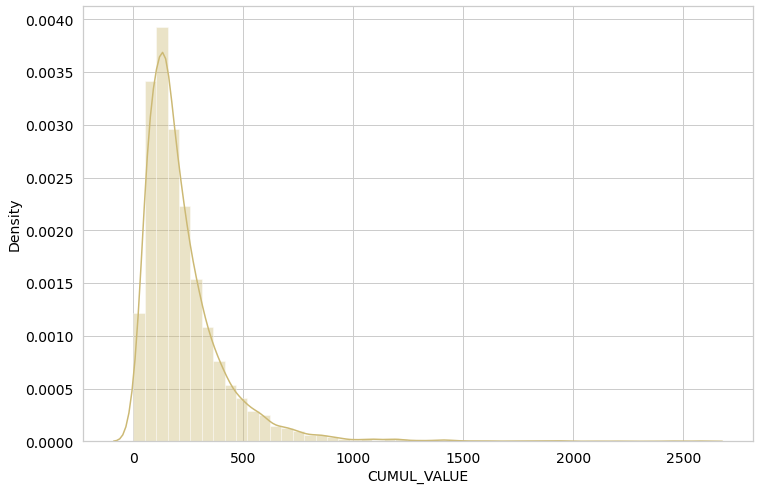

In [ ]:
# we display the ditribution plot of the variable
sns.distplot(MASTER_RFM["CUMUL_VALUE"], color = 'y')

In [ ]:
# We check people that have a null cumulative value
# We display the 10 first rows of this table
MASTER_RFM[MASTER_RFM.CUMUL_VALUE==0].head(10)

# They came only for gifts and they have for some high value of NB_GIFTS (for instance id_individu : 6195)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_CREATION_CARTE,MANAGING_STORE,AGE,SENIORITY,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT,DATE_ACHAT,RECENCY,NB_STORES,NB_LINES,NB_FAMILIES,NB_GIFTS,SHARE_VISITS_MANAGING_STORE
963,6195,3,2,NaN,2.0,2008-02-13,941,38.0,105.56,2.0,0.0,0.0,1.0,2016-08-08,114.0,2.0,NaN,NaN,2.0,0.5
1220,7992,3,2,NaN,6.0,2007-05-09,941,44.0,114.76,1.0,0.0,0.0,1.0,2016-06-04,179.0,1.0,NaN,NaN,1.0,1.0
2497,16687,3,2,NaN,6.0,2007-07-07,331,50.0,112.82,1.0,0.0,0.0,1.0,2016-03-21,254.0,1.0,NaN,NaN,1.0,0.0
2725,18379,2,2,NaN,6.0,2007-09-26,341,60.0,110.16,1.0,0.0,0.0,1.0,2016-08-18,104.0,1.0,NaN,NaN,1.0,0.0
2914,19852,3,2,NaN,NaN,2007-10-15,141,NaN,109.54,2.0,0.0,0.0,1.0,2016-06-02,181.0,1.0,NaN,NaN,2.0,1.0
4436,30275,3,2,NaN,6.0,2008-06-01,371,52.0,101.98,1.0,0.0,0.0,1.0,2016-03-23,252.0,1.0,NaN,NaN,1.0,1.0
4568,31169,3,2,NaN,13.0,2008-01-06,371,41.0,106.81,1.0,0.0,0.0,1.0,2016-03-17,258.0,1.0,NaN,NaN,1.0,1.0
7332,49813,3,2,NaN,2.0,2007-05-22,592,47.0,114.33,1.0,0.0,0.0,1.0,2016-02-17,287.0,1.0,NaN,NaN,2.0,0.0
8814,59883,2,2,NaN,8.0,2008-04-24,130,34.0,103.23,1.0,0.0,0.0,1.0,2016-07-02,151.0,1.0,NaN,NaN,1.0,1.0
8815,59886,2,2,NaN,14.0,2008-04-24,130,56.0,103.23,1.0,0.0,0.0,1.0,2016-03-17,258.0,1.0,NaN,NaN,1.0,1.0


In [ ]:
# We look at this specific customer
RECEIPTS_INFO[RECEIPTS_INFO.ID_INDIVIDU==6195].head(10)

# A lot of 0's but still comes sometimes to buy

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE
1472,2014-04-16,3585211450280,6195,4914,81,"""SALE""",50,1,45,0,0,920,48476.0,175.0,2305.0,106A,JALOU,2114.0,4.0,25.0,Corseterie,Push-up,Paris,Shopping center,Succursale,Paris,0,0,45
1473,2014-04-16,3585211627507,6195,4914,81,"""SALE""",50,1,0,0,100,920,50932.0,7.0,6428.0,FAVO,CAHIE,13.0,1.0,5.0,NaN,NaN,Paris,Shopping center,Succursale,Paris,1,0,0
1474,2014-06-24,3585211527258,6195,4914,81,"""SALE""",28,1,34,0,0,941,50310.0,175.0,5846.0,106A,BETIS,41.0,4.0,25.0,Corseterie,Push-up,Paris,Shopping center,Succursale,Paris,0,0,34
1475,2014-04-16,7000000000126,6195,4914,81,"""SALE""",50,1,0,0,100,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Shopping center,Succursale,Paris,0,0,0
1476,2014-04-16,3585211548703,6195,4914,81,"""SALE""",50,1,0,0,100,920,46813.0,7.0,773.0,FAVO,FLEUR,13.0,1.0,5.0,NaN,NaN,Paris,Shopping center,Succursale,Paris,1,0,0
1477,2014-06-24,3585211528040,6195,4914,81,"""SALE""",28,1,18,0,0,941,50341.0,19.0,5877.0,122,BETIS,41.0,1.0,10.0,Corseterie,String/Tanga,Paris,Shopping center,Succursale,Paris,0,0,18
1478,2015-06-28,3585211648601,6195,4914,81,"""SALE""",28,1,18,0,0,941,57014.0,19.0,10136.0,122,MAGNE,42.0,1.0,10.0,Corseterie,String/Tanga,Paris,Shopping center,Succursale,Paris,0,0,18
1479,2015-11-01,3585211552694,6195,4914,81,"""SALE""",5,1,19,0,0,942,51844.0,19.0,6582.0,122,ARTIF,4128.0,1.0,10.0,Corseterie,String/Tanga,Paris,Shopping center,Succursale,Paris,0,0,19
1480,2016-05-17,3585211909450,6195,4914,81,"""SALE""",7,1,0,0,100,770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,Shopping center,Succursale,Paris,0,0,0
1481,2015-06-28,3585211651168,6195,4914,81,"""SALE""",28,1,32,0,0,941,56856.0,175.0,9978.0,106A,LICEN,61.0,4.0,25.0,Corseterie,Push-up,Paris,Shopping center,Succursale,Paris,0,0,32


In [ ]:
# Number of individuals coming only for gifts
len(MASTER_RFM[MASTER_RFM.CUMUL_VALUE==0])

# It's not a lot of customers : 133

133

In [ ]:
# We decide to drop the people who came only for gifts
MASTER_RFM = MASTER_RFM[MASTER_RFM.CUMUL_VALUE>0]

In [ ]:
# New dimensions of the master_rfm table
MASTER_RFM.shape

(10701, 20)

### **Frequency**

In [ ]:
# We display some statistics of the variable NB_VISITS
MASTER_RFM.NB_VISITS.describe()

# On average people came twice in the year

count    10701.000000
mean         2.172974
std          1.837329
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: NB_VISITS, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


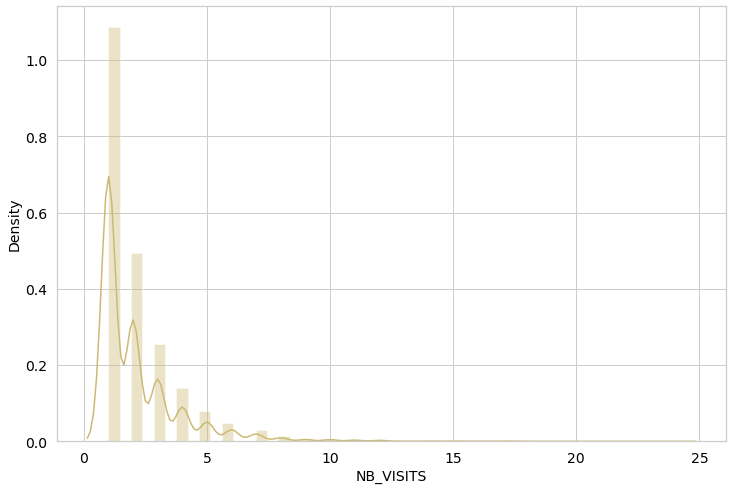

In [ ]:
# We display the ditribution plot of the variable
sns.distplot(MASTER_RFM["NB_VISITS"], color = 'y')

### **Recency**

In [ ]:
# We display some statistics of the variable RECENCY
MASTER_RFM.RECENCY.describe()

# On average people have a card since 172 months

count    10701.000000
mean       171.938697
std         90.039319
min         22.000000
25%        101.000000
50%        158.000000
75%        237.000000
max        365.000000
Name: RECENCY, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


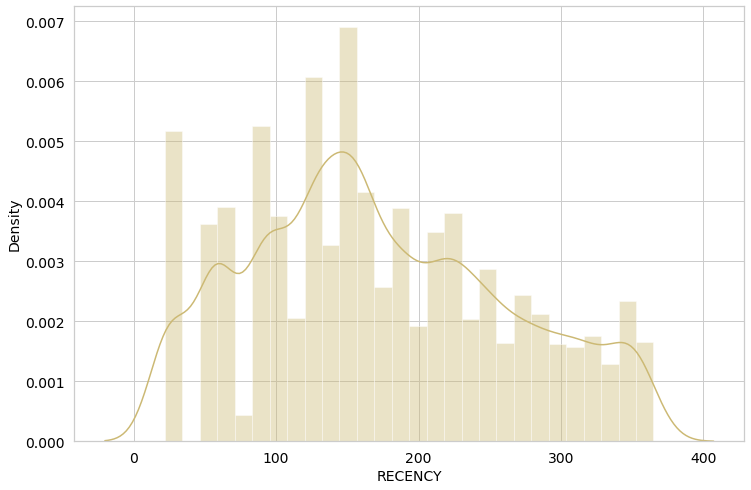

In [ ]:
# we display the ditribution plot of the variable
sns.distplot(MASTER_RFM["RECENCY"], color = 'y')

In [ ]:
# We display the 8 first rows of the table
MASTER_RFM.head(8)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_CREATION_CARTE,MANAGING_STORE,AGE,SENIORITY,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT,DATE_ACHAT,RECENCY,NB_STORES,NB_LINES,NB_FAMILIES,NB_GIFTS,SHARE_VISITS_MANAGING_STORE
0,4,0,0,NaN,NaN,1989-01-01,751,NaN,NaN,6.0,79.17,475.0,2.17,2016-07-23,130.0,4.0,3.0,4.0,1.0,0.0
9,91,2,2,NaN,2.0,2007-08-31,312,63.0,111.02,1.0,112.00,112.0,3.00,2016-10-04,57.0,1.0,1.0,3.0,NaN,1.0
10,99,2,2,NaN,2.0,2007-10-10,312,47.0,109.70,2.0,60.00,120.0,2.50,2016-05-28,186.0,1.0,2.0,3.0,1.0,0.0
87,557,3,2,NaN,NaN,2007-05-14,753,57.0,114.60,4.0,45.50,182.0,2.75,2016-06-27,156.0,1.0,3.0,5.0,7.0,1.0
208,1396,3,2,NaN,NaN,2007-12-19,920,43.0,107.40,6.0,120.33,722.0,5.50,2016-06-20,163.0,3.0,2.0,8.0,5.0,0.0
218,1433,3,2,NaN,NaN,2007-11-28,920,63.0,108.09,3.0,95.67,287.0,4.67,2016-07-21,132.0,1.0,2.0,5.0,5.0,1.0
242,1534,2,2,NaN,8.0,2008-08-05,942,35.0,99.85,3.0,87.00,261.0,2.33,2016-10-05,56.0,3.0,3.0,3.0,1.0,0.0
250,1579,3,2,NaN,6.0,2008-05-21,942,46.0,102.34,1.0,193.00,193.0,7.00,2016-03-14,261.0,1.0,1.0,3.0,2.0,0.0


## Determine thresholds in order to split them in low/medium/high groups. 

In [ ]:
# New customer = those who came in the program before 12 months
MASTER_RFM["NEW_CUSTOMER"] = np.where(MASTER_RFM.SENIORITY<= 12, 1, 0)

In [ ]:
# How many new clients we have ?
sum(MASTER_RFM["NEW_CUSTOMER"])

3369

In [ ]:
# Inactive customer if recency > 1 year

MASTER_RFM["TOP_INACTIVE"] = np.where(MASTER_RFM.RECENCY>(1*365), 1, 0)

In [ ]:
# Variables of interest
interest_variables = ["CUMUL_VALUE", "NB_VISITS", "RECENCY"]

# We are not keeping the new clients
# This is to define the tresholds for the RFM segmentation
MASTER_RFM.loc[(MASTER_RFM.NEW_CUSTOMER==0),interest_variables].quantile([0.33, 0.67])

,CUMUL_VALUE,NB_VISITS,RECENCY
0.33,109.0,1.0,126.0
0.67,239.0,3.0,209.0


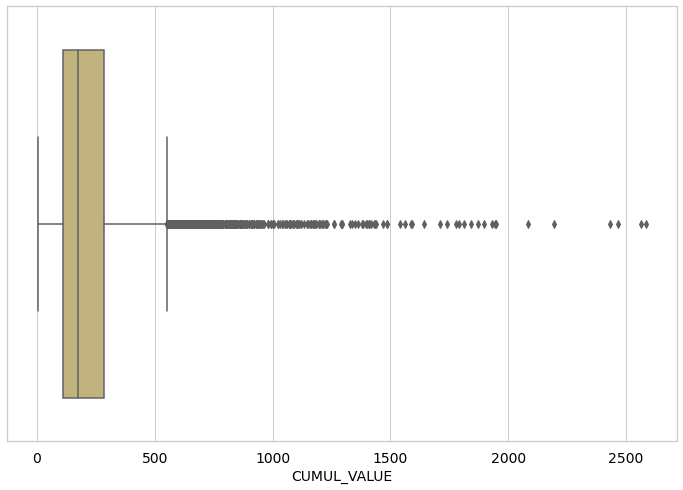

In [ ]:
# Boxplot for the CUMUL_VALUE
ax = sns.boxplot(x=MASTER_RFM["CUMUL_VALUE"], color="y")

# Some extreme values and some 0's, but 50% of the clients have a cumulative value of more than 172€

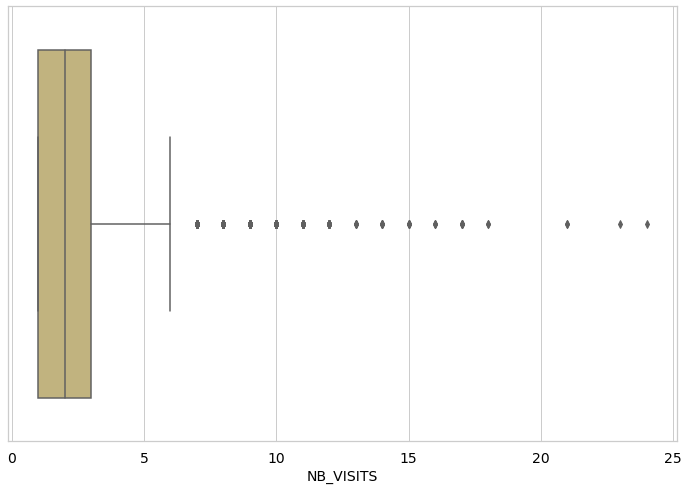

In [ ]:
# Boxplot for the NB_VISITS
ax = sns.boxplot(x=MASTER_RFM["NB_VISITS"], color="y")

# Some people come a lot but they are rare
# 50% of the clients come less than once this year

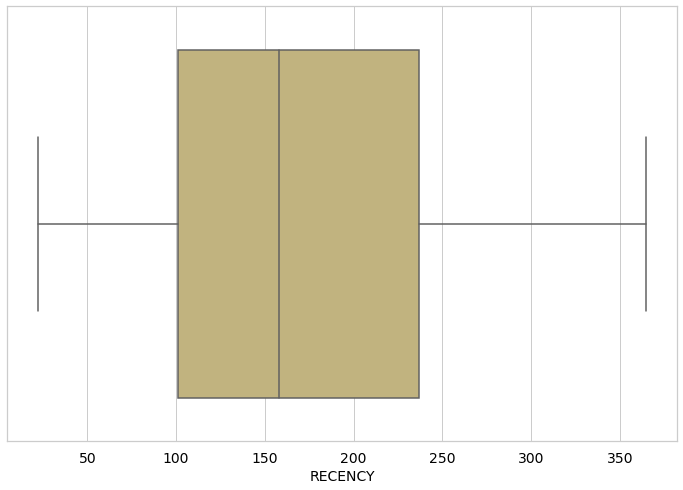

In [ ]:
# Boxplot for the RECENCY
ax = sns.boxplot(x=MASTER_RFM["RECENCY"], color="y")

# We have a various range of recency
# 50% of the clients have a recency of more than 160 months

According to the quantiles results we are going to fix the thresholds:

- **MONETARY VALUE (AMOUNT)**: 
   - low if < 100€
   - medium if >= 100€ and < 250€
   - high if >= 250€


- **FREQUENCY**:
   - low if only 1 visit on the period T
   - medium if 2 visits on the period T
   - high if > 2 visits on the period T


- **RECENCY**: 
   - low if last pruchase more than 7 months agos (210 days)
   - medium if last pruchase between 4 and 7 months ago
   - high if last pruchase less than 4 months ago (120 days)

## Create the final RFM segments


### 3 segments

In [ ]:
# Values for the thresholds
min_amount = 100
max_amount = 250
min_freq = 2
max_freq = 3
min_recency = 120
max_recency = 210

In [ ]:
# displaying the table
MASTER_RFM

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_CREATION_CARTE,MANAGING_STORE,AGE,SENIORITY,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT,DATE_ACHAT,RECENCY,NB_STORES,NB_LINES,NB_FAMILIES,NB_GIFTS,SHARE_VISITS_MANAGING_STORE,NEW_CUSTOMER,TOP_INACTIVE
0,4,0,0,NaN,NaN,1989-01-01,751,NaN,NaN,6.0,79.17,475.0,2.17,2016-07-23,130.0,4.0,3.0,4.0,1.0,0.0,0,0
9,91,2,2,NaN,2.0,2007-08-31,312,63.0,111.02,1.0,112.00,112.0,3.00,2016-10-04,57.0,1.0,1.0,3.0,NaN,1.0,0,0
10,99,2,2,NaN,2.0,2007-10-10,312,47.0,109.70,2.0,60.00,120.0,2.50,2016-05-28,186.0,1.0,2.0,3.0,1.0,0.0,0,0
87,557,3,2,NaN,NaN,2007-05-14,753,57.0,114.60,4.0,45.50,182.0,2.75,2016-06-27,156.0,1.0,3.0,5.0,7.0,1.0,0,0
208,1396,3,2,NaN,NaN,2007-12-19,920,43.0,107.40,6.0,120.33,722.0,5.50,2016-06-20,163.0,3.0,2.0,8.0,5.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35970,240219,3,2,NaN,1.0,2016-08-31,642,47.0,2.99,1.0,138.00,138.0,5.00,2016-08-31,91.0,1.0,1.0,3.0,1.0,1.0,1,0
35971,240221,3,2,NaN,2.0,2016-08-31,642,27.0,2.99,1.0,142.00,142.0,5.00,2016-08-31,91.0,1.0,1.0,4.0,1.0,1.0,1,0
35975,240269,3,2,NaN,2.0,2016-08-31,642,26.0,2.99,1.0,245.00,245.0,8.00,2016-08-31,91.0,1.0,1.0,3.0,1.0,1.0,1,0
35978,240290,2,2,NaN,NaN,2016-08-31,491,41.0,2.99,1.0,81.00,81.0,5.00,2016-08-31,91.0,1.0,2.0,3.0,1.0,1.0,1,0


In [ ]:
# We define the segmentation for the monetary value
MASTER_RFM["AMOUNT_seg"] = np.where(MASTER_RFM.TOP_INACTIVE == 1, 'Inactive',
                           np.where(MASTER_RFM.NEW_CUSTOMER == 1, 'New',
                           np.where(MASTER_RFM.CUMUL_VALUE < min_amount, 'Low',
                           np.where(MASTER_RFM.CUMUL_VALUE >= max_amount, 'High','Medium'))))


In [ ]:
# We define the segmentation for the frequency
MASTER_RFM["FREQUENCY_seg"] = np.where(MASTER_RFM.TOP_INACTIVE == 1, 'Inactive',
                              np.where(MASTER_RFM.NEW_CUSTOMER == 1, 'New',
                              np.where(MASTER_RFM.NB_VISITS < min_freq, 'Low',
                              np.where(MASTER_RFM.NB_VISITS >= max_freq, 'High','Medium'))))

In [ ]:
# We define the segmentation for the recency
MASTER_RFM["RECENCY_seg"] = np.where(MASTER_RFM.TOP_INACTIVE == 1, 'Inactive',
                            np.where(MASTER_RFM.NEW_CUSTOMER == 1, 'New',
                            np.where(MASTER_RFM.RECENCY > max_recency, 'Low',
                            np.where(MASTER_RFM.RECENCY <= min_recency, 'High','Medium'))))

We check that the groups are well balanced between them.

In [ ]:
# For the monetary value : it is well balanced, with a little bit more individual in the medium part
MASTER_RFM[["AMOUNT_seg", "ID_INDIVIDU"]].groupby("AMOUNT_seg").count()

,ID_INDIVIDU
AMOUNT_seg,
High,2267
Low,2148
Medium,2917
New,3369


In [ ]:
# For the frequency : it is a bit less balanced than previously, with a lot of people in the low segmentation
MASTER_RFM[["FREQUENCY_seg", "ID_INDIVIDU"]].groupby("FREQUENCY_seg").count()

,ID_INDIVIDU
FREQUENCY_seg,
High,2427
Low,3198
Medium,1707
New,3369


In [ ]:
# For the recency : it is well balanced, with a little bit more individual in the medium part
MASTER_RFM[["RECENCY_seg", "ID_INDIVIDU"]].groupby("RECENCY_seg").count()

,ID_INDIVIDU
RECENCY_seg,
High,2220
Low,2393
Medium,2719
New,3369


### Conditions

Here we create the conditions for the different segmentations.

In [ ]:
#LOW 
condition_FM_LOW = ((MASTER_RFM.FREQUENCY_seg=='Low') & ((MASTER_RFM.AMOUNT_seg=='Low') 
                 | (MASTER_RFM.AMOUNT_seg=='Medium'))) | ((MASTER_RFM.FREQUENCY_seg=='Medium') 
                                                       & (MASTER_RFM.AMOUNT_seg=='Low'))

In [ ]:
#MEDIUM
condition_FM_MEDIUM = ((MASTER_RFM.FREQUENCY_seg=='Low') 
              & ((MASTER_RFM.AMOUNT_seg=='Low') 
                 | (MASTER_RFM.AMOUNT_seg=='Medium'))) | ((MASTER_RFM.FREQUENCY_seg=='Medium') 
                                                       & (MASTER_RFM.AMOUNT_seg=='Low'))

In [ ]:
#HIGH
condition_FM_HIGH = ((MASTER_RFM.FREQUENCY_seg=='High') 
               & ((MASTER_RFM.AMOUNT_seg=='High') 
                  | (MASTER_RFM.AMOUNT_seg=='Medium'))) | ((MASTER_RFM.FREQUENCY_seg=='Medium') 
                                                        & (MASTER_RFM.AMOUNT_seg=='High'))

### Segmentation

In [ ]:
# We can now say which individuals are in which segmentations
MASTER_RFM["SEGMENTATION_FM"] = np.where(MASTER_RFM.NEW_CUSTOMER, 'New',
    np.where(condition_FM_LOW, 'Low',
    np.where(condition_FM_HIGH , 'High', 'Medium')))

In [ ]:
# how much individuals in each segmentations ?
MASTER_RFM[["SEGMENTATION_FM", "ID_INDIVIDU"]].groupby("SEGMENTATION_FM").count()

,ID_INDIVIDU
SEGMENTATION_FM,
High,2760
Low,3295
Medium,1277
New,3369


In [ ]:
# We check if the number of individuals is the total number of people in segmentations
MASTER_RFM[["SEGMENTATION_FM", "ID_INDIVIDU"]].count()

SEGMENTATION_FM    10701
ID_INDIVIDU        10701
dtype: int64

### Groups

In [ ]:
# We set the conditions to create the different groups
condition_TOP = ((MASTER_RFM.RECENCY_seg=='High') & ((MASTER_RFM.SEGMENTATION_FM=='High') | 
                                                     (MASTER_RFM.SEGMENTATION_FM=='Medium')))
condition_GOOD = ((MASTER_RFM.RECENCY_seg=='Medium') & ((MASTER_RFM.SEGMENTATION_FM=='High') | 
                                                        (MASTER_RFM.SEGMENTATION_FM=='Medium')))
condition_DECELERATION = ((MASTER_RFM.RECENCY_seg=='Low') & ((MASTER_RFM.SEGMENTATION_FM=='High') | 
                                                             (MASTER_RFM.SEGMENTATION_FM=='Medium')))
condition_SMALL = ((MASTER_RFM.SEGMENTATION_FM=='Low') & ((MASTER_RFM.RECENCY_seg=='High') | 
                                                          (MASTER_RFM.RECENCY_seg=='Medium')))
condition_WEAK = ((MASTER_RFM.SEGMENTATION_FM=='Low') & (MASTER_RFM.RECENCY_seg=='Low'))

In [ ]:
# We create the different groups
MASTER_RFM["final_SEGMENTATION_RFM"] = np.where(condition_TOP , 'Top',
   np.where(condition_GOOD , 'Good',
   np.where(condition_DECELERATION , 'Deceleration', 
   np.where(condition_SMALL , 'Small',
   np.where(condition_WEAK, 'Weak', MASTER_RFM.SEGMENTATION_FM)))))

In [ ]:
# How many individuals are in each group ?
MASTER_RFM[["final_SEGMENTATION_RFM", "ID_INDIVIDU"]].groupby("final_SEGMENTATION_RFM").count()

,ID_INDIVIDU
final_SEGMENTATION_RFM,
Deceleration,699
Good,1655
New,3369
Small,1601
Top,1683
Weak,1694


In [ ]:
# We check if the number of individual is the total number of people in the final segmentation
MASTER_RFM[["final_SEGMENTATION_RFM", "ID_INDIVIDU"]].count()

final_SEGMENTATION_RFM    10701
ID_INDIVIDU               10701
dtype: int64

# Part 4: Analysis of segments 

Analyze dimensions: Eclecticism / Reactivity / Diversification / Attachment

In [ ]:
# All the columns available 
MASTER_RFM.columns

Index(['ID_INDIVIDU', 'CIVILITE', 'SEXE', 'PROFESSION', 'CATEGORIE_PROF',
       'DATE_CREATION_CARTE', 'MANAGING_STORE', 'AGE', 'SENIORITY',
       'NB_VISITS', 'AVG_VISIT_VALUE', 'CUMUL_VALUE', 'AVG_NB_PRODUCTS_VISIT',
       'DATE_ACHAT', 'RECENCY', 'NB_STORES', 'NB_LINES', 'NB_FAMILIES',
       'NB_GIFTS', 'SHARE_VISITS_MANAGING_STORE', 'NEW_CUSTOMER',
       'TOP_INACTIVE', 'AMOUNT_seg', 'FREQUENCY_seg', 'RECENCY_seg',
       'SEGMENTATION_FM', 'final_SEGMENTATION_RFM'],
      dtype='object')

In [ ]:
# Creation of the data frame containing only the Top customers
TOP = MASTER_RFM[MASTER_RFM.final_SEGMENTATION_RFM=='Top']

# Creating the other dataframes to compare
GOOD = MASTER_RFM[MASTER_RFM.final_SEGMENTATION_RFM=='Good']
DECELERATION = MASTER_RFM[MASTER_RFM.final_SEGMENTATION_RFM=='Deceleration']
SMALL = MASTER_RFM[MASTER_RFM.final_SEGMENTATION_RFM=='Small']
WEAK = MASTER_RFM[MASTER_RFM.final_SEGMENTATION_RFM=='Weak']

# Displaying the 10 first rows of the data frame
TOP.head(10)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_CREATION_CARTE,MANAGING_STORE,AGE,SENIORITY,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT,DATE_ACHAT,RECENCY,NB_STORES,NB_LINES,NB_FAMILIES,NB_GIFTS,SHARE_VISITS_MANAGING_STORE,NEW_CUSTOMER,TOP_INACTIVE,AMOUNT_seg,FREQUENCY_seg,RECENCY_seg,SEGMENTATION_FM,final_SEGMENTATION_RFM
242,1534,2,2,NaN,8.0,2008-08-05,942,35.0,99.85,3.0,87.00,261.0,2.33,2016-10-05,56.0,3.0,3.0,3.0,1.0,0.0,0,0,High,High,High,High,Top
457,2886,2,2,NaN,6.0,2008-01-30,942,49.0,106.02,7.0,100.29,702.0,2.86,2016-10-04,57.0,1.0,2.0,7.0,2.0,0.0,0,0,High,High,High,High,Top
551,3547,3,2,NaN,8.0,2007-10-13,942,41.0,109.60,2.0,142.50,285.0,4.00,2016-09-03,88.0,2.0,3.0,5.0,NaN,0.5,0,0,High,Medium,High,High,Top
911,5857,3,2,NaN,6.0,2008-03-20,941,37.0,104.38,5.0,50.80,254.0,1.80,2016-11-05,25.0,4.0,2.0,6.0,NaN,0.0,0,0,High,High,High,High,Top
1044,6713,3,2,NaN,NaN,2008-01-30,941,40.0,106.02,6.0,83.00,498.0,3.33,2016-10-08,53.0,3.0,1.0,6.0,6.0,0.0,0,0,High,High,High,High,Top
1071,6904,2,2,NaN,NaN,2007-03-10,941,32.0,116.73,2.0,60.50,121.0,2.00,2016-09-06,85.0,2.0,1.0,1.0,1.0,0.0,0,0,Medium,Medium,High,Medium,Top
1186,7776,3,2,NaN,6.0,2007-09-29,941,42.0,110.06,6.0,120.17,721.0,4.33,2016-08-08,114.0,1.0,2.0,8.0,4.0,1.0,0,0,High,High,High,High,Top
1196,7834,3,2,NaN,3.0,2007-11-07,941,53.0,108.78,3.0,127.00,381.0,4.00,2016-08-24,98.0,1.0,3.0,7.0,NaN,0.0,0,0,High,High,High,High,Top
1199,7853,2,2,NaN,NaN,2007-11-07,941,40.0,108.78,3.0,47.33,142.0,2.67,2016-10-01,60.0,3.0,2.0,5.0,1.0,0.0,0,0,Medium,High,High,High,Top
1260,8273,3,2,NaN,13.0,2007-07-18,941,52.0,112.46,2.0,55.50,111.0,3.00,2016-10-01,60.0,2.0,1.0,2.0,2.0,0.0,0,0,Medium,Medium,High,Medium,Top


In [ ]:
# dimensions of the TOP table
TOP.shape

(1683, 27)

In [ ]:
# list of the unique values of the variable MANAGING_STORE
TOP['MANAGING_STORE'].unique()

array([ 942,  941,  770,  921,  920,  311,  314,  312,  331,  333,  692,
        141,  342,  721,  752,  751,  756,  757,  491,  341,  350,  371,
        251,  381,  441,  442,  451,  511,  591,  592,  671,  691,  841,
         61,  763,  761,  758,  561,  130,  754, 7518,  753,  782,  922,
        694,  693,  740,  181,  762, 7516, 7511,  291,  781,  332,  750,
        541,  630,  641,  292,  530,  313,  131,  351,  211,  642,  861,
        731,  171, 7512,  759,  980,  151,  930,  421,  786,  593,   62,
        771,  695, 7514,   63,  422,  831,  201,  661,  334,  923, 7519,
        470,  950,  785,  924,  241, 7521])

In [ ]:
# Displaying the columns available in the TOP table as well as their types
TOP.dtypes

ID_INDIVIDU                             int64
CIVILITE                                int64
SEXE                                    int64
PROFESSION                            float64
CATEGORIE_PROF                        float64
DATE_CREATION_CARTE            datetime64[ns]
MANAGING_STORE                          int64
AGE                                   float64
SENIORITY                             float64
NB_VISITS                             float64
AVG_VISIT_VALUE                       float64
CUMUL_VALUE                           float64
AVG_NB_PRODUCTS_VISIT                 float64
DATE_ACHAT                     datetime64[ns]
RECENCY                               float64
NB_STORES                             float64
NB_LINES                              float64
NB_FAMILIES                           float64
NB_GIFTS                              float64
SHARE_VISITS_MANAGING_STORE           float64
NEW_CUSTOMER                            int64
TOP_INACTIVE                      

**Adding the group of the customers in the receipts_info table and customer_additional** 

In [ ]:
# Keep only the columns we need
MASTER_RFM_Seg = MASTER_RFM[["ID_INDIVIDU", "final_SEGMENTATION_RFM"]]

In [ ]:
# Merge the datasets to get the segmentation in the receipts_info table
RECEIPTS_INFO_RFM = pd.merge(RECEIPTS_INFO, MASTER_RFM_Seg, on=["ID_INDIVIDU"], how="outer")
RECEIPTS_INFO_RFM

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE,final_SEGMENTATION_RFM
0,2013-12-14,3585211297939,4,0,81,"""SALE""",29,1,28,0,0,756,41656.0,21.0,1249.0,128,PROME,10.0,2.0,10.0,Corseterie,String/Tanga,Paris,City center,Succursale,Paris,0,0,28,Good
1,2015-12-14,3585211731150,4,175898,81,"""SALE""",10,1,69,0,0,730,60020.0,116.0,12128.0,222,MERVE,41.0,4.0,3.0,Homewear,Homewear_Ensemble,Province,City center,Affilié,Province,0,0,69,Good
2,2013-12-14,3585210149062,4,0,81,"""SALE""",29,1,0,0,100,756,150.0,7.0,136.0,FAVORI,AGEND,13.0,1.0,5.0,NaN,NaN,Paris,City center,Succursale,Paris,1,0,0,Good
3,2013-12-14,3585211405723,4,0,81,"""SALE""",29,1,23,0,0,756,45761.0,19.0,3056.0,122,SULFU,93.0,1.0,10.0,Corseterie,String/Tanga,Paris,City center,Succursale,Paris,0,0,23,Good
4,2016-02-07,3585211668319,4,175898,81,"""SALE""",513,1,75,0,0,920,54398.0,136.0,8251.0,503,CAPFE,20.0,4.0,3.0,Bain,Bain_Maillot,Paris,Shopping center,Succursale,Paris,0,0,75,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332731,2016-08-31,3585211634772,240296,236270,81,"""SALE""",11,1,37,0,0,541,51503.0,179.0,2305.0,105B,JALOU,1199.0,5.0,25.0,Corseterie,Triangle/Brassiere,Province,City center,Succursale,Province,0,0,37,New
332732,2016-08-31,3585211793813,240296,236270,81,"""SALE""",11,1,49,0,0,541,62497.0,30.0,11078.0,245,AUDAC,20.0,1.0,10.0,Homewear,Homewear_Ensemble,Province,City center,Succursale,Province,0,0,49,New
332733,2016-08-31,3585211635557,240296,236270,81,"""SALE""",11,1,26,0,0,541,51649.0,157.0,2305.0,127,JALOU,1199.0,3.0,3.0,Corseterie,Slip,Province,City center,Succursale,Province,0,0,26,New
332734,2016-08-31,3585211862847,240296,236270,81,"""SALE""",11,1,0,0,100,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Province,City center,Succursale,Province,0,0,0,New


In [ ]:
# Dimension of the table RECIPTS_INFO_RFM
RECEIPTS_INFO_RFM.shape

(332736, 30)

In [ ]:
# Checking if we have the same dimension as the RECEIPTS_INFO table
RECEIPTS_INFO.shape

(332736, 29)

In [ ]:
# Keep only the top customers

TOP_RECEIPTS = RECEIPTS_INFO_RFM[RECEIPTS_INFO_RFM["final_SEGMENTATION_RFM"] == "Top"]
TOP_RECEIPTS

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE,final_SEGMENTATION_RFM
373,2013-06-11,3585211396830,1534,290,81,"""SALE""",12,1,35,0,0,7511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,35,Top
374,2016-12-03,3585211542732,1534,290,81,"""SALE""",5,1,42,0,0,943,50583.0,272.0,6101.0,112B,EPURE,42.0,5.0,25.0,Corseterie,Corbeille mousse/Bandeau,Paris,City center,Succursale,Paris,0,0,42,Top
375,2015-12-19,3585211733055,1534,290,81,"""SALE""",7,1,75,0,0,7512,59179.0,278.0,11720.0,208,EXTRA,7005.0,3.0,3.0,Homewear,Homewear_Haut,Paris,City center,Succursale,Paris,0,0,75,Top
376,2015-04-21,3585211626241,1534,290,81,"""SALE""",13,1,29,0,0,7511,55331.0,152.0,9183.0,507,RIVIE,20.0,4.0,3.0,Bain,Bain_Maillot,Paris,City center,Succursale,Paris,0,0,29,Top
377,2013-06-11,3585211396397,1534,290,81,"""SALE""",12,1,33,0,0,7511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paris,City center,Succursale,Paris,0,0,33,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304958,2015-10-12,3585211711954,217422,213794,81,"""SALE""",12,1,39,0,0,671,58720.0,227.0,11429.0,101B,COCOT,30.0,5.0,25.0,Corseterie,Corbeille,Province,City center,Succursale,Province,0,0,39,Top
304959,2016-06-30,3585211797637,217422,213794,81,"""SALE""",110,1,41,0,0,671,64043.0,97.0,14644.0,140,OMBRE,20.0,1.0,10.0,Corseterie,Corseterie_PP,Province,City center,Succursale,Province,0,0,41,Top
304960,2016-10-02,3585211719523,217422,213794,81,"""SALE""",58,1,0,19,100,671,60443.0,21.0,6272.0,128,VANIT,21.0,1.0,10.0,Corseterie,String/Tanga,Province,City center,Succursale,Province,0,0,0,Top
304961,2016-06-03,3585211806872,217422,213794,81,"""SALE""",9,1,15,0,0,671,60672.0,576.0,9501.0,219,SOCKS,4142.0,1.0,10.0,NaN,NaN,Province,City center,Succursale,Province,0,0,15,Top


In [ ]:
# Displaying the columns available in the TOP_RECEIPTS table
TOP_RECEIPTS.columns

Index(['DATE_ACHAT', 'EAN', 'ID_INDIVIDU', 'ID_FOYER', 'CODE_LIGNE',
       'TYPE_LIGNE', 'NUM_TICKET', 'QUANTITE', 'PRIX_AP_REMISE', 'REMISE',
       'REMISE_VALEUR', 'CODE_BOUTIQUE', 'ID_ARTICLE', 'ID_MODELE',
       'ID_OPTION', 'MODELE', 'OPTION_PTT', 'COLORIS', 'POSITION', 'GRILLE',
       'LIGNE', 'FAMILLE', 'REGIONS', 'CENTRE_VILLE', 'TYPE_MAGASIN',
       'REGIONS_COMMERCIAL', 'TOP_GIFT', 'TOP_PLV', 'PRICE',
       'final_SEGMENTATION_RFM'],
      dtype='object')

In [ ]:
# Merge the datasets to get the segmentation in the customer_additional table

CUSTOMER_ADDITIONAL_RFM = pd.merge(CUSTOMER_ADDITIONAL, MASTER_RFM_Seg, on=["ID_INDIVIDU"], how="outer")
CUSTOMER_ADDITIONAL_RFM

,ID_INDIVIDU,CODE_MAGASIN,PAYS,ETAT,TAILLE,TAILLE_SG,TAILLE_BONNET,final_SEGMENTATION_RFM
0,4,751,FR,N,38.0,95.0,B,Good
1,27,942,FR,N,38.0,85.0,B,NaN
2,34,942,FR,N,42.0,95.0,B,NaN
3,37,942,FR,N,42.0,90.0,B,NaN
4,47,941,FR,N,40.0,90.0,C,NaN
...,...,...,...,...,...,...,...,...
36152,241454,7511,FR,C,NaN,NaN,NaN,NaN
36153,241459,661,FR,C,1.0,85.0,b,NaN
36154,241460,661,FR,C,2.0,85.0,b,NaN
36155,241473,381,FR,C,NaN,NaN,NaN,NaN


In [ ]:
CUSTOMER_ADDITIONAL_RFM.shape

(36157, 8)

In [ ]:
CUSTOMER_ADDITIONAL.shape

(36157, 7)

In [ ]:
# We keep only the top customers

TOP_CUSTOMER_ADDITIONAL = CUSTOMER_ADDITIONAL_RFM[CUSTOMER_ADDITIONAL_RFM["final_SEGMENTATION_RFM"] == "Top"]
TOP_CUSTOMER_ADDITIONAL 

,ID_INDIVIDU,CODE_MAGASIN,PAYS,ETAT,TAILLE,TAILLE_SG,TAILLE_BONNET,final_SEGMENTATION_RFM
242,1534,942,FR,N,40.0,90.0,B,Top
457,2886,942,NaN,N,40.0,90.0,C,Top
551,3547,942,FR,M,42.0,95.0,B,Top
911,5857,941,FR,N,38.0,85.0,D,Top
1044,6713,941,FR,N,38.0,85.0,B,Top
...,...,...,...,...,...,...,...,...
32510,217305,753,FR,N,NaN,NaN,NaN,Top
32513,217337,923,FR,C,40.0,90.0,b,Top
32515,217352,941,FR,N,NaN,NaN,NaN,Top
32527,217414,593,FR,N,38.0,NaN,9,Top


## Eclecticism

*Do they choose a particular product or store ? Do they focus only on one ?*
 
*   NB_LINES
*   NB_FAMILIES
*   NB_STORES 
*   PURCHASE PART OF THE MANAGING STORE
*   LOCATION OF THE MANAGING STORE

In [ ]:
# Summary statistics

TOP[['NB_LINES','NB_FAMILIES',"NB_STORES", "SHARE_VISITS_MANAGING_STORE"]].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE
count,1682.000000,1682.000000,1683.00000,1683.000000
mean,2.015458,5.403686,1.64587,0.604548
std,0.738826,2.222980,0.86789,0.417090
min,1.000000,1.000000,1.00000,0.000000
25%,1.000000,4.000000,1.00000,0.142857
50%,2.000000,5.000000,1.00000,0.750000
75%,3.000000,7.000000,2.00000,1.000000
max,3.000000,14.000000,8.00000,1.000000


In [ ]:
GOOD[['NB_LINES','NB_FAMILIES',"NB_STORES", "SHARE_VISITS_MANAGING_STORE"]].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE
count,1655.000000,1655.000000,1655.000000,1655.000000
mean,1.967372,4.874320,1.471903,0.613500
std,0.711045,2.036822,0.684269,0.425527
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,0.000000
50%,2.000000,5.000000,1.000000,0.800000
75%,2.000000,6.000000,2.000000,1.000000
max,3.000000,13.000000,6.000000,1.000000


In [ ]:
DECELERATION[['NB_LINES','NB_FAMILIES',"NB_STORES", "SHARE_VISITS_MANAGING_STORE"]].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE
count,699.000000,699.000000,699.000000,699.000000
mean,1.751073,4.317597,1.339056,0.617907
std,0.656341,1.717721,0.551949,0.436136
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,1.000000,0.000000
50%,2.000000,4.000000,1.000000,1.000000
75%,2.000000,5.000000,2.000000,1.000000
max,3.000000,10.000000,4.000000,1.000000


In [ ]:
SMALL[['NB_LINES','NB_FAMILIES',"NB_STORES", "SHARE_VISITS_MANAGING_STORE"]].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE
count,1569.000000,1569.000000,1601.000000,1601.000000
mean,1.197578,2.201402,1.032480,0.609931
std,0.414001,1.024059,0.177326,0.481957
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,1.000000
max,3.000000,6.000000,2.000000,1.000000


In [ ]:
WEAK[['NB_LINES','NB_FAMILIES',"NB_STORES", "SHARE_VISITS_MANAGING_STORE"]].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE
count,1656.000000,1656.000000,1694.000000,1694.000000
mean,1.178140,2.210145,1.012987,0.640791
std,0.402746,1.008984,0.113252,0.477597
min,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,1.000000
max,3.000000,7.000000,2.000000,1.000000


* NB_LINES

posx and posy should be finite values
posx and posy should be finite values


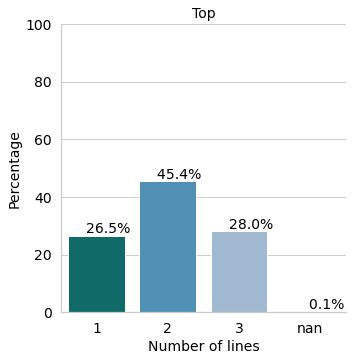

posx and posy should be finite values
posx and posy should be finite values


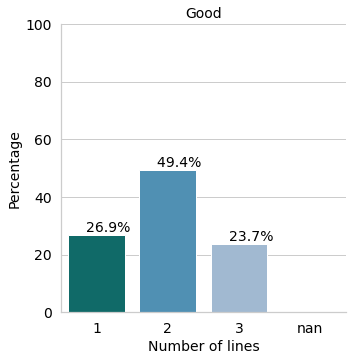

posx and posy should be finite values
posx and posy should be finite values


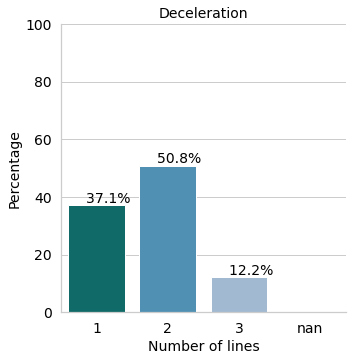

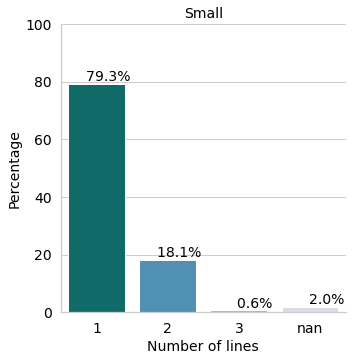

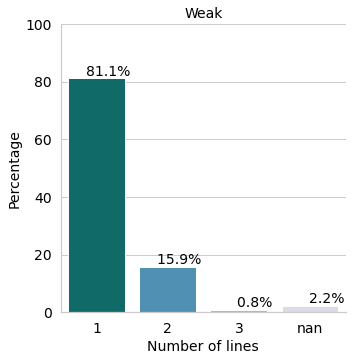

In [ ]:
# Plotting the number of lines

lT = []
lG = []
lD = []
lS = []
lW = []

# We display the frequency of each modalities of the variable NB_LINES
TOP_Lines = TOP["NB_LINES"].astype(str).value_counts(normalize=True)*100
GOOD_Lines = GOOD["NB_LINES"].astype(str).value_counts(normalize=True)*100
DECELERATION_Lines = DECELERATION["NB_LINES"].astype(str).value_counts(normalize=True)*100
SMALL_Lines = SMALL["NB_LINES"].astype(str).value_counts(normalize=True)*100
WEAK_Lines = WEAK["NB_LINES"].astype(str).value_counts(normalize=True)*100

# Creation of a dictionnary with the modalities and the frequencies linked to the modalities
for i in range (TOP_Lines.shape[0]):
   lT.append({"NB_LINES":TOP_Lines.index[i], "percent": TOP_Lines[i]})
for i in range (GOOD_Lines.shape[0]):
   lG.append({"NB_LINES":GOOD_Lines.index[i], "percent": GOOD_Lines[i]})
for i in range (DECELERATION_Lines.shape[0]):
   lD.append({"NB_LINES":DECELERATION_Lines.index[i], "percent": DECELERATION_Lines[i]})
for i in range (SMALL_Lines.shape[0]):
   lS.append({"NB_LINES":SMALL_Lines.index[i], "percent": SMALL_Lines[i]})
for i in range (WEAK_Lines.shape[0]):
   lW.append({"NB_LINES":WEAK_Lines.index[i], "percent": WEAK_Lines[i]})

# We transform this dictionnary into a dataframe
dfT = pd.DataFrame(lT)
dfG = pd.DataFrame(lG)
dfD = pd.DataFrame(lD)
dfS = pd.DataFrame(lS)
dfW = pd.DataFrame(lW)

# We plot the barplot (without the frequencies)
# We want to plot them in the same order
T = sns.catplot(x = "NB_LINES", y = "percent", kind= 'bar',data = dfT, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_LINES',ascending = True).NB_LINES)
G = sns.catplot(x = "NB_LINES", y = "percent", kind= 'bar',data = dfG, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_LINES',ascending = True).NB_LINES)
D = sns.catplot(x = "NB_LINES", y = "percent", kind= 'bar',data = dfD, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_LINES',ascending = True).NB_LINES)
S = sns.catplot(x = "NB_LINES", y = "percent", kind= 'bar',data = dfS, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_LINES',ascending = True).NB_LINES)
W = sns.catplot(x = "NB_LINES", y = "percent", kind= 'bar',data = dfW, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_LINES',ascending = True).NB_LINES)

# We add the right axis labels
for dataframe in [T,G,D,S,W]:
    (dataframe.set_axis_labels("Number of lines", "Percentage")
              .set_xticklabels(["1", "2", "3", "nan"])
              .set_titles("{col_name} {col_var}")
              .set(ylim=(0, 100)))

# We add the frequencies at the top of each bar
for dataframe in [T,G,D,S,W]:
  for p in dataframe.ax.patches:
    if len(str(p.get_height().round(1)))==4:
        txt = "    " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 1
        dataframe.ax.text(txt_x,txt_y,txt)
    if len(str(p.get_height().round(1)))==3:
        txt = "      " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 1
        dataframe.ax.text(txt_x,txt_y,txt)
    if dataframe==T:
      dataframe.ax.set_title("Top")
    if dataframe==G:
      dataframe.ax.set_title("Good")
    if dataframe==D:
      dataframe.ax.set_title("Deceleration")
    if dataframe==S:
      dataframe.ax.set_title("Small")
    if dataframe==W:
      dataframe.ax.set_title("Weak")

In [ ]:
# Check which line is the most bought

TOP_RECEIPTS.groupby('LIGNE').aggregate({'LIGNE':'count'})
# The most bought line by top customers is corsetery, then homewear, and finally bath

,LIGNE
LIGNE,
Bain,6196
Corseterie,41935
Homewear,7377


In [ ]:
# Percentages of line purchases by top customers

TOP_RECEIPTS['LIGNE'].value_counts(normalize=True)*100

Corseterie    75.547669
Homewear      13.289976
Bain          11.162355
Name: LIGNE, dtype: float64

* NB_FAMLIES

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


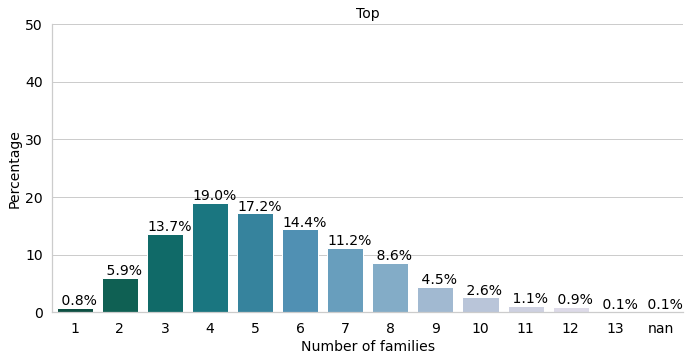

posx and posy should be finite values
posx and posy should be finite values


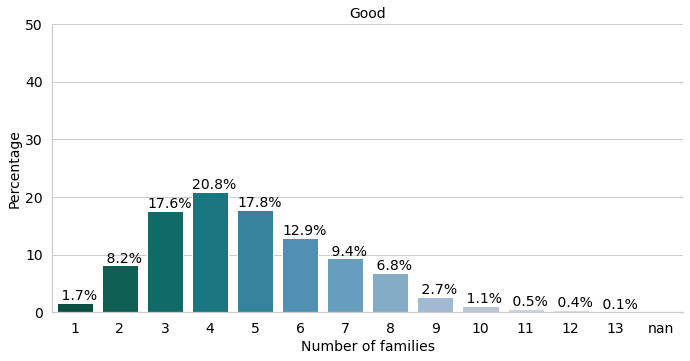

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


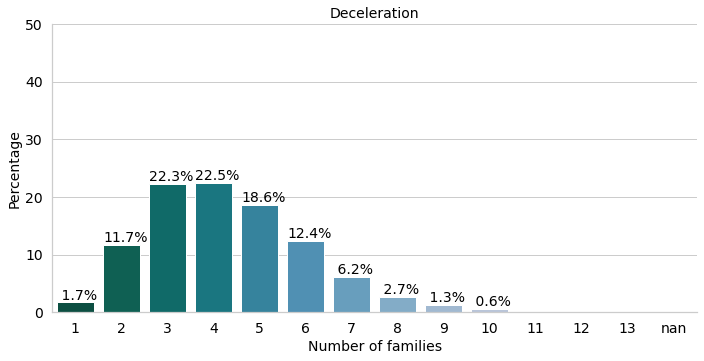

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


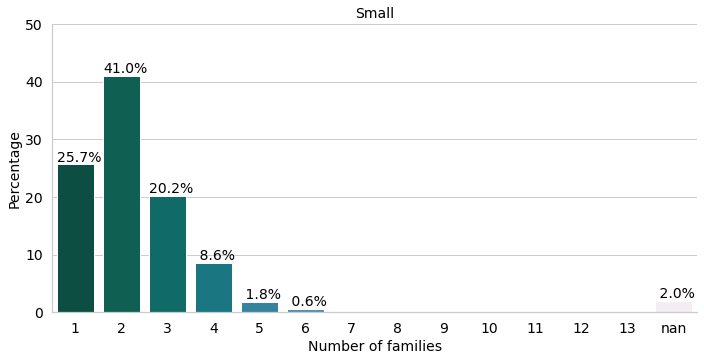

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


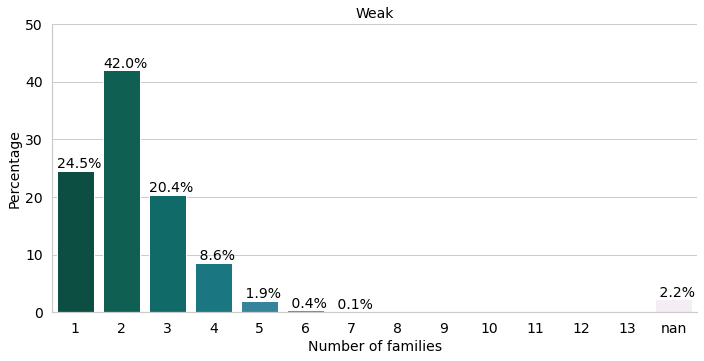

In [ ]:
# Plotting the number of families

FT = []
FG = []
FD = []
FS = []
FW = []

# We display the frequency of each modalities of the variable NB_LINES
TOP_Families = TOP["NB_FAMILIES"].astype(str).value_counts(normalize=True)*100
GOOD_Families = GOOD["NB_FAMILIES"].astype(str).value_counts(normalize=True)*100
DECELERATION_Families = DECELERATION["NB_FAMILIES"].astype(str).value_counts(normalize=True)*100
SMALL_Families = SMALL["NB_FAMILIES"].astype(str).value_counts(normalize=True)*100
WEAK_Families = WEAK["NB_FAMILIES"].astype(str).value_counts(normalize=True)*100

# Creation of a dictionnary with the modalities and the frequencies linked to the modalities
for i in range (TOP_Families.shape[0]):
   FT.append({"NB_FAMILIES":TOP_Families.index[i], "percent": TOP_Families[i]})
for i in range (GOOD_Families.shape[0]):
   FG.append({"NB_FAMILIES":GOOD_Families.index[i], "percent": GOOD_Families[i]})
for i in range (DECELERATION_Families.shape[0]):
   FD.append({"NB_FAMILIES":DECELERATION_Families.index[i], "percent": DECELERATION_Families[i]})
for i in range (SMALL_Families.shape[0]):
   FS.append({"NB_FAMILIES":SMALL_Families.index[i], "percent": SMALL_Families[i]})
for i in range (WEAK_Families.shape[0]):
   FW.append({"NB_FAMILIES":WEAK_Families.index[i], "percent": WEAK_Families[i]})

# We transform this dictionnary into a dataframe
dfT = pd.DataFrame(FT)
dfG = pd.DataFrame(FG)
dfD = pd.DataFrame(FD)
dfS = pd.DataFrame(FS)
dfW = pd.DataFrame(FW)

# We plot the barplot (without the frequencies)
# We want to plot them in the same order 
T = sns.catplot(x = "NB_FAMILIES", y = "percent", kind= 'bar',data = dfT, height=5, aspect=2,
                palette = 'PuBuGn_r', order=['1.0','2.0','3.0', '4.0', '5.0', '6.0',
                                             '7.0','8.0','9.0','10.0','11.0','12.0','13.0', 'nan'])
G = sns.catplot(x = "NB_FAMILIES", y = "percent", kind= 'bar',data = dfG, height=5, aspect=2, 
                palette = 'PuBuGn_r', order=['1.0','2.0','3.0', '4.0', '5.0', '6.0',
                                             '7.0','8.0','9.0','10.0','11.0','12.0','13.0', 'nan'])
D = sns.catplot(x = "NB_FAMILIES", y = "percent", kind= 'bar',data = dfD, height=5, aspect=2, 
                palette = 'PuBuGn_r', order=['1.0','2.0','3.0', '4.0', '5.0', '6.0',
                                             '7.0','8.0','9.0','10.0','11.0','12.0','13.0', 'nan'])
S = sns.catplot(x = "NB_FAMILIES", y = "percent", kind= 'bar',data = dfS, height=5, aspect=2, 
                palette = 'PuBuGn_r', order=['1.0','2.0','3.0', '4.0', '5.0', '6.0',
                                             '7.0','8.0','9.0','10.0','11.0','12.0','13.0', 'nan'])
W = sns.catplot(x = "NB_FAMILIES", y = "percent", kind= 'bar',data = dfW, height=5, aspect=2, 
                palette = 'PuBuGn_r', order=['1.0','2.0','3.0', '4.0', '5.0', '6.0',
                                             '7.0','8.0','9.0','10.0','11.0','12.0','13.0', 'nan'])

# We add the right axis labels
for dataframe in [T,G,D,S,W]:
    (dataframe.set_axis_labels("Number of families", "Percentage")
              .set_xticklabels(["1", "2", "3", "4", "5", "6","7",
                                "8", "9", "10","11","12","13","nan"])
              .set_titles("{col_name} {col_var}")
              .set(ylim=(0, 50)))

# We add the frequencies at the top of each bar
for dataframe in [T,G,D,S,W]:
  for p in dataframe.ax.patches:
    if len(str(p.get_height().round(1)))==4:
        txt = "" + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        dataframe.ax.text(txt_x,txt_y,txt)
    if len(str(p.get_height().round(1)))==3:
        txt = " " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 0.5
        dataframe.ax.text(txt_x,txt_y,txt)
    if dataframe==T:
      dataframe.ax.set_title("Top")
    if dataframe==G:
      dataframe.ax.set_title("Good")
    if dataframe==D:
      dataframe.ax.set_title("Deceleration")
    if dataframe==S:
      dataframe.ax.set_title("Small")
    if dataframe==W:
      dataframe.ax.set_title("Weak")

In [ ]:
# Check which line is the most bought

F = TOP_RECEIPTS.groupby('FAMILLE').aggregate({'FAMILLE':'count'})
F.rename(columns = {'FAMILLE':'F'}, inplace = True)
F.sort_values("F", ascending=False)
# The most bought families by top customers is string/tanga, then slip....

,F
FAMILLE,
String/Tanga,9136
Slip,8664
Short,6041
Bain_Maillot,4471
Push-up,3960
Emboitant,3550
Triangle/Brassiere,3162
Homewear_Haut,3108
Corbeille,3062


In [ ]:
# Percentages of family purchases by top customers

TOP_RECEIPTS['FAMILLE'].value_counts(normalize=True)*100

String/Tanga                16.458889
Slip                        15.608561
Short                       10.883116
Bain_Maillot                 8.054695
Push-up                      7.134107
Emboitant                    6.395475
Triangle/Brassiere           5.696476
Homewear_Haut                5.599193
Corbeille                    5.516322
Corseterie_PP                4.703826
Homewear_Bas                 4.139944
Homewear_Ensemble            3.550840
Corbeille mousse/Bandeau     3.309433
Bain_Beachwear               2.913094
Bustier/Guepiere             0.036031
Name: FAMILLE, dtype: float64

* NB_STORES

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


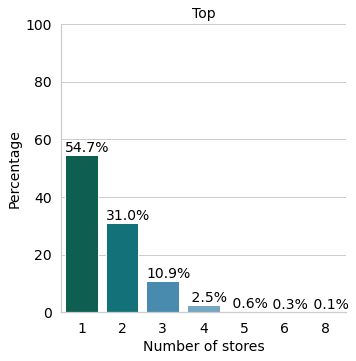

posx and posy should be finite values
posx and posy should be finite values


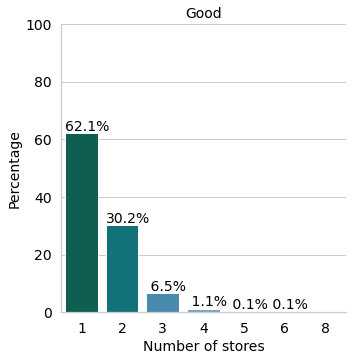

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


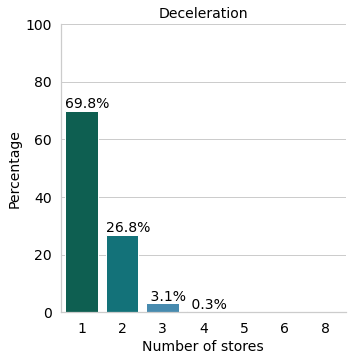

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


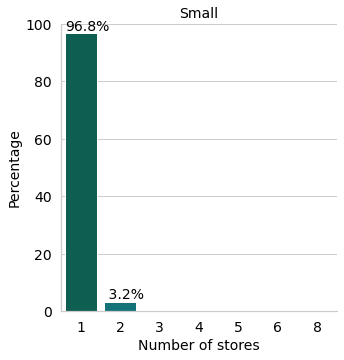

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


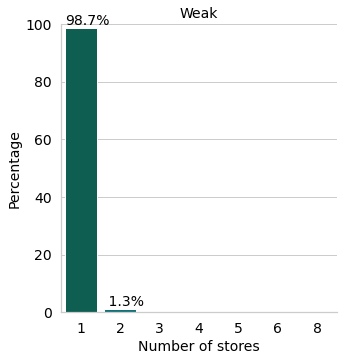

In [ ]:
# Plotting the number of stores

ST = []
SG = []
SD = []
SS = []
SW = []

# We display the frequency of each modalities of the variable NB_LINES
TOP_Stores = TOP["NB_STORES"].astype(str).value_counts(normalize=True)*100
GOOD_Stores = GOOD["NB_STORES"].astype(str).value_counts(normalize=True)*100
DECELERATION_Stores = DECELERATION["NB_STORES"].astype(str).value_counts(normalize=True)*100
SMALL_Stores = SMALL["NB_STORES"].astype(str).value_counts(normalize=True)*100
WEAK_Stores = WEAK["NB_STORES"].astype(str).value_counts(normalize=True)*100

# Creation of a dictionnary with the modalities and the frequency linked to the modalities
for i in range (TOP_Stores.shape[0]):
   ST.append({"NB_STORES":TOP_Stores.index[i], "percent": TOP_Stores[i]})
for i in range (GOOD_Stores.shape[0]):
   SG.append({"NB_STORES":GOOD_Stores.index[i], "percent": GOOD_Stores[i]})
for i in range (DECELERATION_Stores.shape[0]):
   SD.append({"NB_STORES":DECELERATION_Stores.index[i], "percent": DECELERATION_Stores[i]})
for i in range (SMALL_Stores.shape[0]):
   SS.append({"NB_STORES":SMALL_Stores.index[i], "percent": SMALL_Stores[i]})
for i in range (WEAK_Stores.shape[0]):
   SW.append({"NB_STORES":WEAK_Stores.index[i], "percent": WEAK_Stores[i]})

# We transform this dictionnary into a dataframe
dfT = pd.DataFrame(ST)
dfG = pd.DataFrame(SG)
dfD = pd.DataFrame(SD)
dfS = pd.DataFrame(SS)
dfW = pd.DataFrame(SW)

# We plot the barplot (without the frequencies)
# We want to plot them in the same order 
T = sns.catplot(x = "NB_STORES", y = "percent", kind= 'bar',data = dfT,
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_STORES',ascending = True).NB_STORES)
G = sns.catplot(x = "NB_STORES", y = "percent", kind= 'bar',data = dfG, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_STORES',ascending = True).NB_STORES)
D = sns.catplot(x = "NB_STORES", y = "percent", kind= 'bar',data = dfD, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_STORES',ascending = True).NB_STORES)
S = sns.catplot(x = "NB_STORES", y = "percent", kind= 'bar',data = dfS, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_STORES',ascending = True).NB_STORES)
W = sns.catplot(x = "NB_STORES", y = "percent", kind= 'bar',data = dfW, 
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_STORES',ascending = True).NB_STORES)

# We add the right axis labels
for dataframe in [T,G,D,S,W]:
    (dataframe.set_axis_labels("Number of stores", "Percentage")
              .set_xticklabels(["1", "2", "3", "4", "5", "6","8"])
              .set_titles("{col_name} {col_var}")
              .set(ylim=(0, 100)))
    
# We add the frequencies at the top of each bar
for dataframe in [T,G,D,S,W]:
  for p in dataframe.ax.patches:
    if len(str(p.get_height().round(1)))==4:
        txt = "" + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 1
        dataframe.ax.text(txt_x,txt_y,txt)
    if len(str(p.get_height().round(1)))==3:
        txt = " " + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 1
        dataframe.ax.text(txt_x,txt_y,txt)
    if dataframe==T:
      dataframe.ax.set_title("Top")
    if dataframe==G:
      dataframe.ax.set_title("Good")
    if dataframe==D:
      dataframe.ax.set_title("Deceleration")
    if dataframe==S:
      dataframe.ax.set_title("Small")
    if dataframe==W:
      dataframe.ax.set_title("Weak")

* SHARE_VISITS_MANAGING_STORE

[(0.0, 0.7)]

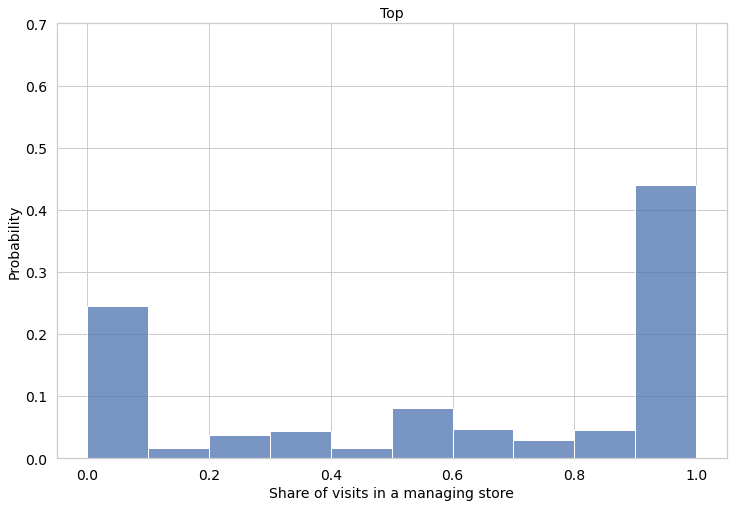

In [ ]:
## Plotting the share of visits in a managing store

T=sns.histplot(data=TOP, x="SHARE_VISITS_MANAGING_STORE", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=10)
plt.xlabel("Share of visits in a managing store")
plt.ylabel("Probability")
plt.title("Top")
T.set(ylim=(0, 0.7))

[(0.0, 0.7)]

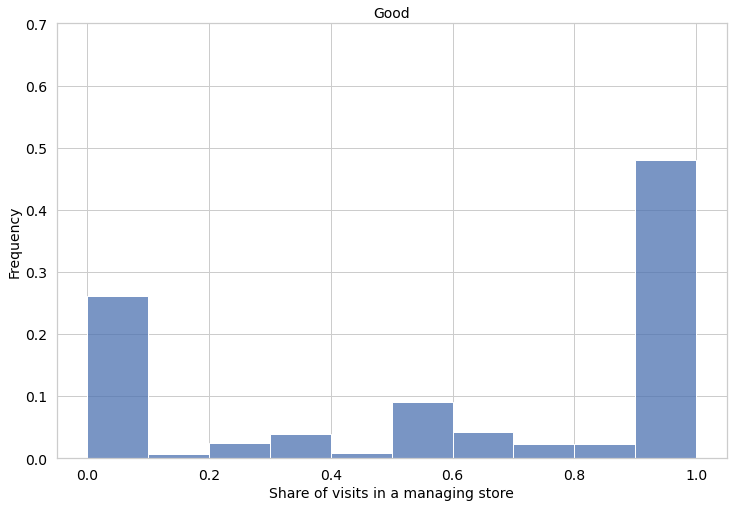

In [ ]:
G=sns.histplot(data=GOOD, x="SHARE_VISITS_MANAGING_STORE", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=10)
plt.xlabel("Share of visits in a managing store")
plt.ylabel("Frequency")
plt.title("Good")
G.set(ylim=(0, 0.7))

[(0.0, 0.7)]

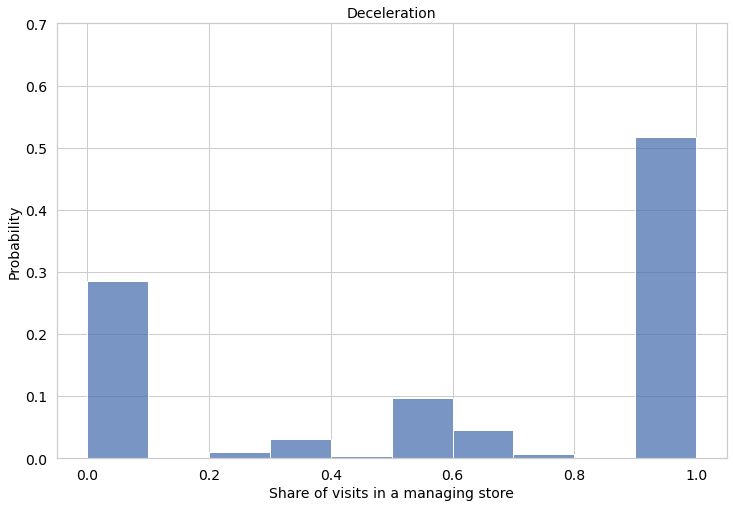

In [ ]:
D=sns.histplot(data=DECELERATION, x="SHARE_VISITS_MANAGING_STORE", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=10)
plt.xlabel("Share of visits in a managing store")
plt.ylabel("Probability")
plt.title("Deceleration")
D.set(ylim=(0, 0.7))

[(0.0, 0.7)]

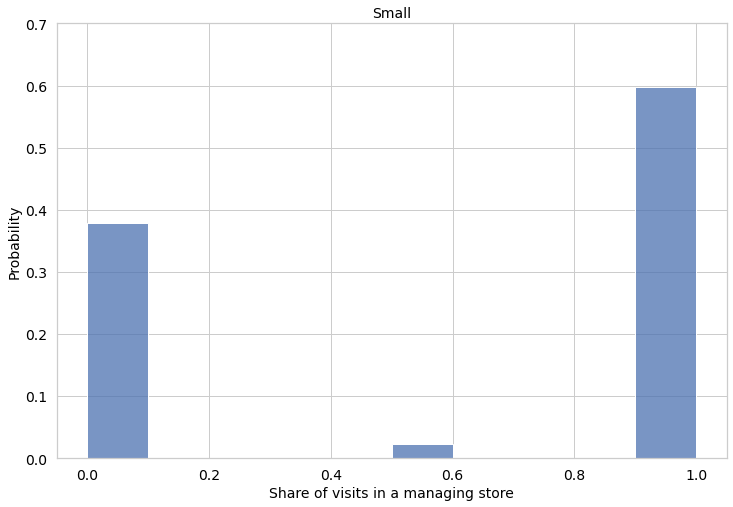

In [ ]:
S=sns.histplot(data=SMALL, x="SHARE_VISITS_MANAGING_STORE", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=10)
plt.xlabel("Share of visits in a managing store")
plt.ylabel("Probability")
plt.title("Small")
S.set(ylim=(0, 0.7))

[(0.0, 0.7)]

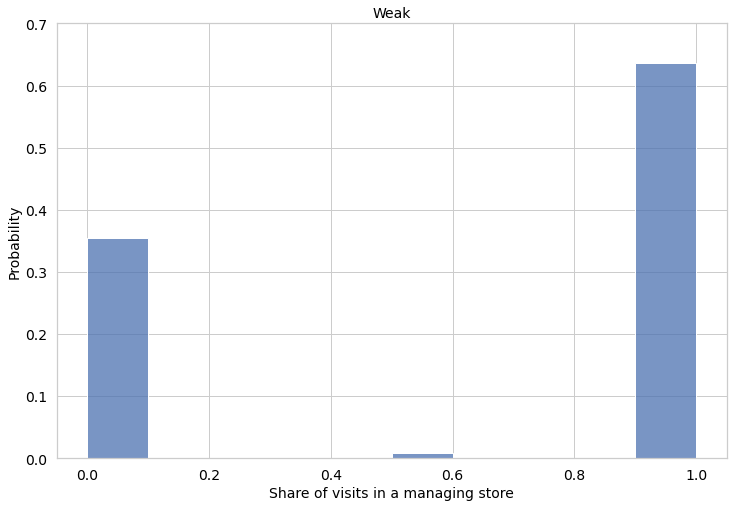

In [ ]:
W=sns.histplot(data=WEAK, x="SHARE_VISITS_MANAGING_STORE", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=10)
plt.xlabel("Share of visits in a managing store")
plt.ylabel("Probability")
plt.title("Weak")
W.set(ylim=(0, 0.7))

* LOCATION MANAGING STORE

In [ ]:
# Location of the managing store

# Check in which country there are the most managing stores

TOP_CUSTOMER_ADDITIONAL.groupby('PAYS').aggregate({'PAYS':'count'})

# Most managing stores are in France

,PAYS
PAYS,
BE,4
CH,2
FR,1572
FX,3


In [ ]:
# We keep only one line for each managing store

TOP_CUSTOMER_ADDITIONAL2=TOP_CUSTOMER_ADDITIONAL.copy()
TOP_CUSTOMER_ADDITIONAL2=TOP_CUSTOMER_ADDITIONAL2['CODE_MAGASIN'].drop_duplicates()
TOP_CUSTOMER_ADDITIONAL2

242       942
911       941
1362      770
1492      921
1663      920
         ... 
31145     950
31209     785
31618     924
31905     241
31959    7521
Name: CODE_MAGASIN, Length: 94, dtype: int64

In [ ]:
# We keep only one line for each store

TOP_RECEIPTS2=TOP_RECEIPTS.copy()
TOP_RECEIPTS2.rename(columns = {'CODE_BOUTIQUE':'CODE_MAGASIN'}, inplace = True)
TOP_RECEIPTS2=TOP_RECEIPTS2[['CODE_MAGASIN', "CENTRE_VILLE", "REGIONS"]].drop_duplicates()
TOP_RECEIPTS2

,CODE_MAGASIN,CENTRE_VILLE,REGIONS
373,7511,City center,Paris
374,943,City center,Paris
375,7512,City center,Paris
383,444,City center,Province
386,7518,City center,Paris
...,...,...,...
168329,7525,City center,Paris
186932,950,City center,Paris
229704,891,City center,Province
236778,241,City center,Province


In [ ]:
# Merge the 2 new datasets to know if the managing store is in the city center or not and Paris or province

TOP_CUSTOMER_ADDITIONAL_LOCATION=pd.merge(TOP_CUSTOMER_ADDITIONAL2, TOP_RECEIPTS2,
         on=["CODE_MAGASIN"], how="inner")
TOP_CUSTOMER_ADDITIONAL_LOCATION

,CODE_MAGASIN,CENTRE_VILLE,REGIONS
0,942,Shopping center,Paris
1,941,Shopping center,Paris
2,770,Shopping center,Paris
3,921,City center,Paris
4,920,Shopping center,Paris
...,...,...,...
89,950,City center,Paris
90,785,City center,Paris
91,924,City center,Paris
92,241,City center,Province


In [ ]:
# See if among the top customers the managing store is more ofter in a shopping center or city center

TOP_CUSTOMER_ADDITIONAL_LOCATION.groupby('CENTRE_VILLE').aggregate({'CENTRE_VILLE':'count'})

,CENTRE_VILLE
CENTRE_VILLE,
City center,70
Shopping center,24


In [ ]:
# See if among the top customers the managing store is more ofter in Paris or province

TOP_CUSTOMER_ADDITIONAL_LOCATION.groupby('REGIONS').aggregate({'REGIONS':'count'})

,REGIONS
REGIONS,
Paris,31
Province,63


## Reactivity

*Frequency of purchase, recency*

*   NB_VISITS
*   RECENCY

In [ ]:
# Summary statistics

TOP[['NB_VISITS','RECENCY']].describe()

,NB_VISITS,RECENCY
count,1683.000000,1683.000000
mean,4.247178,66.806892
std,2.658884,29.498042
min,1.000000,22.000000
25%,2.000000,53.000000
50%,3.000000,60.000000
75%,5.000000,92.000000
max,24.000000,120.000000


In [ ]:
GOOD[['NB_VISITS','RECENCY']].describe()

,NB_VISITS,RECENCY
count,1655.000000,1655.000000
mean,3.262840,154.511782
std,1.668882,24.069698
min,1.000000,121.000000
25%,2.000000,133.000000
50%,3.000000,153.000000
75%,4.000000,168.000000
max,15.000000,210.000000


In [ ]:
DECELERATION[['NB_VISITS','RECENCY']].describe()

,NB_VISITS,RECENCY
count,699.000000,699.000000
mean,2.376252,259.779685
std,0.889324,38.668381
min,1.000000,211.000000
25%,2.000000,228.000000
50%,2.000000,251.000000
75%,3.000000,281.000000
max,8.000000,365.000000


In [ ]:
SMALL[['NB_VISITS','RECENCY']].describe()

,NB_VISITS,RECENCY
count,1601.000000,1601.000000
mean,1.093067,131.296065
std,0.290617,51.121923
min,1.000000,22.000000
25%,1.000000,94.000000
50%,1.000000,140.000000
75%,1.000000,169.000000
max,2.000000,210.000000


In [ ]:
WEAK[['NB_VISITS','RECENCY']].describe()

,NB_VISITS,RECENCY
count,1694.000000,1694.000000
mean,1.048996,287.425030
std,0.215924,45.986618
min,1.000000,211.000000
25%,1.000000,247.000000
50%,1.000000,287.000000
75%,1.000000,322.000000
max,2.000000,365.000000


* NB_VISITS

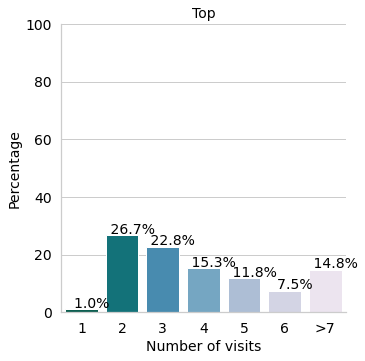

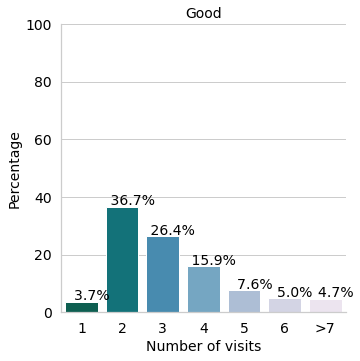

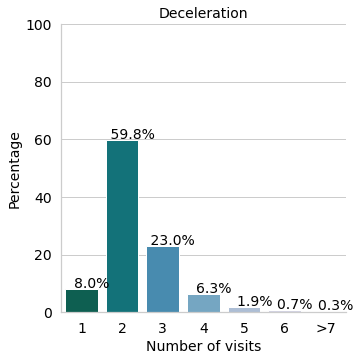

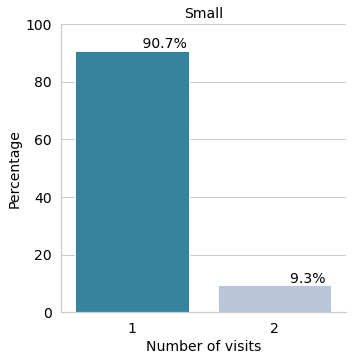

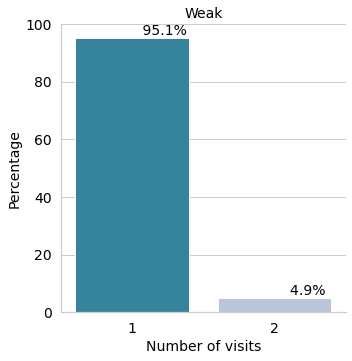

In [ ]:
## Plotting the number of visits

#Histogramme à faire 

VT = []
VG = []
VD = []
VS = []
VW = []

# We display the frequency of each modalities of the variable NB_LINES
TOP_Visits = TOP["NB_VISITS"].astype(str).value_counts(normalize=True)*100
GOOD_Visits = GOOD["NB_VISITS"].astype(str).value_counts(normalize=True)*100
DECELERATION_Visits = DECELERATION["NB_VISITS"].astype(str).value_counts(normalize=True)*100
SMALL_Visits = SMALL["NB_VISITS"].astype(str).value_counts(normalize=True)*100
WEAK_Visits = WEAK["NB_VISITS"].astype(str).value_counts(normalize=True)*100

# Creation of a dictionnary with the modalities and the frequencies linked to the modalities
for i in range (TOP_Visits.shape[0]):
   VT.append({"NB_VISITS":TOP_Visits.index[i], "percent": TOP_Visits[i]})
for i in range (GOOD_Visits.shape[0]):
   VG.append({"NB_VISITS":GOOD_Visits.index[i], "percent": GOOD_Visits[i]})
for i in range (DECELERATION_Visits.shape[0]):
   VD.append({"NB_VISITS":DECELERATION_Visits.index[i], "percent": DECELERATION_Visits[i]})
for i in range (SMALL_Visits.shape[0]):
   VS.append({"NB_VISITS":SMALL_Visits.index[i], "percent": SMALL_Visits[i]})
for i in range (WEAK_Visits.shape[0]):
   VW.append({"NB_VISITS":WEAK_Visits.index[i], "percent": WEAK_Visits[i]})

# We transform this dictionnary into a dataframe
dfT = pd.DataFrame(VT)
dfG = pd.DataFrame(VG)
dfD = pd.DataFrame(VD)
dfS = pd.DataFrame(VS)
dfW = pd.DataFrame(VW)

# We create new categories
dfT['NB_VISITS']=dfT['NB_VISITS'].astype(float)
dfT = dfT.sort_values(by=['NB_VISITS'], ascending=True)
dfT = dfT.reset_index(drop=True)
VT2=[]
for i in range (0,6):
    VT2.append({"NB_VISITS":dfT.NB_VISITS[i], "percent": dfT.percent[i]})
i=6
VT2.append({"NB_VISITS":dfT.NB_VISITS[i], "percent": dfT.percent[i] + dfT.percent[i+1] + dfT.percent[i+2] 
            + dfT.percent[i+3] + dfT.percent[i+4] + dfT.percent[i+5] + dfT.percent[i+6] + dfT.percent[i+7] 
            + dfT.percent[i+8] + dfT.percent[i+9] + dfT.percent[i+10] + dfT.percent[i+11] 
            + dfT.percent[i+12] + dfT.percent[i+13] + dfT.percent[i+14]})
dfT = pd.DataFrame(VT2)
#1,2,3,4,5,6,7:18+21+23+24

dfG['NB_VISITS']=dfG['NB_VISITS'].astype(float)
dfG = dfG.sort_values(by=['NB_VISITS'], ascending=True)
dfG = dfG.reset_index(drop=True)
VG2 = []
for i in range (0,6):
    VG2.append({"NB_VISITS":dfG.NB_VISITS[i], "percent": dfG.percent[i]})
i=6
VG2.append({"NB_VISITS":dfG.NB_VISITS[i], "percent": dfG.percent[i] + dfG.percent[i+1] + dfG.percent[i+2] 
            + dfG.percent[i+3] + dfG.percent[i+4] + dfG.percent[i+5] + dfG.percent[i+6]})
dfG = pd.DataFrame(VG2)
#1,2,3,4,5,6,7:12+15

dfD['NB_VISITS']=dfD['NB_VISITS'].astype(float)
dfD = dfD.sort_values(by=['NB_VISITS'], ascending=True)
dfD = dfD.reset_index(drop=True)
VD2 = []
for i in range (0,6):
    VD2.append({"NB_VISITS":dfD.NB_VISITS[i], "percent": dfD.percent[i]})
i=6
VD2.append({"NB_VISITS":dfD.NB_VISITS[i], "percent": dfD.percent[i] + dfD.percent[i+1]})
dfD = pd.DataFrame(VD2)
#1,2,3,4,5,6,7:8

dfS['NB_VISITS']=dfS['NB_VISITS'].astype(float)
dfS = dfS.sort_values(by=['NB_VISITS'], ascending=True)
dfS = dfS.reset_index(drop=True)
VS2 = []
for i in range (0,2):
    VS2.append({"NB_VISITS":dfS.NB_VISITS[i], "percent": dfS.percent[i]})
dfS = pd.DataFrame(VS2)
#1,2

dfW['NB_VISITS']=dfW['NB_VISITS'].astype(float)
dfW = dfW.sort_values(by=['NB_VISITS'], ascending=True)
dfW = dfW.reset_index(drop=True)
VW2 = []
for i in range (0,2):
    VW2.append({"NB_VISITS":dfW.NB_VISITS[i], "percent": dfW.percent[i]})
dfW = pd.DataFrame(VW2)
#1,2

# We plot the barplot (without the frequencies)
# We want to plot them in the same order and we don't want the nan values
T = sns.catplot(x = "NB_VISITS", y = "percent", kind= 'bar',data = dfT,
                palette = 'PuBuGn_r', order=dfT.sort_values('NB_VISITS',ascending = True).NB_VISITS)
G = sns.catplot(x = "NB_VISITS", y = "percent", kind= 'bar',data = dfG, 
                palette = 'PuBuGn_r', order=dfG.sort_values('NB_VISITS',ascending = True).NB_VISITS)
D = sns.catplot(x = "NB_VISITS", y = "percent", kind= 'bar',data = dfD, 
                palette = 'PuBuGn_r', order=dfD.sort_values('NB_VISITS',ascending = True).NB_VISITS)
S = sns.catplot(x = "NB_VISITS", y = "percent", kind= 'bar',data = dfS, 
                palette = 'PuBuGn_r', order=dfS.sort_values('NB_VISITS',ascending = True).NB_VISITS)
W = sns.catplot(x = "NB_VISITS", y = "percent", kind= 'bar',data = dfW, 
                palette = 'PuBuGn_r', order=dfW.sort_values('NB_VISITS',ascending = True).NB_VISITS)

# We add the right axis labels
for dataframe in [T,G,D,S,W]:
    (dataframe.set_axis_labels("Number of visits", "Percentage")
              .set_titles("{col_name} {col_var}")
              .set(ylim=(0, 100)))
    if dataframe in [T,G,D]:
        dataframe.set_xticklabels(["1", "2", "3", "4", "5", "6",">7"])
    if dataframe in [S,W]:
        dataframe.set_xticklabels(["1", "2"])

# We add the frequencies at the top of each bar
for dataframe in [T,G,D,S,W]:
  for p in dataframe.ax.patches:
    if dataframe in [T,G,D]:
        if len(str(p.get_height().round(1)))==4:
            txt = " " + str(p.get_height().round(1)) + '%'
            txt_x = p.get_x()
            txt_y = p.get_height() + 0.5
            dataframe.ax.text(txt_x,txt_y,txt)
        if len(str(p.get_height().round(1)))==3:
            txt = "  " + str(p.get_height().round(1)) + '%'
            txt_x = p.get_x()
            txt_y = p.get_height() + 0.5
            dataframe.ax.text(txt_x,txt_y,txt)
    if dataframe in [S,W]:
        if len(str(p.get_height().round(1)))==4:
            txt = "               " + str(p.get_height().round(1)) + '%'
            txt_x = p.get_x()
            txt_y = p.get_height() + 1
            dataframe.ax.text(txt_x,txt_y,txt)
        if len(str(p.get_height().round(1)))==3:
            txt = "                " + str(p.get_height().round(1)) + '%'
            txt_x = p.get_x()
            txt_y = p.get_height() + 1
            dataframe.ax.text(txt_x,txt_y,txt)
    if dataframe==T:
      dataframe.ax.set_title("Top")
    if dataframe==G:
      dataframe.ax.set_title("Good")
    if dataframe==D:
      dataframe.ax.set_title("Deceleration")
    if dataframe==S:
      dataframe.ax.set_title("Small")
    if dataframe==W:
      dataframe.ax.set_title("Weak")

* RECENCY

[(0.0, 0.35)]

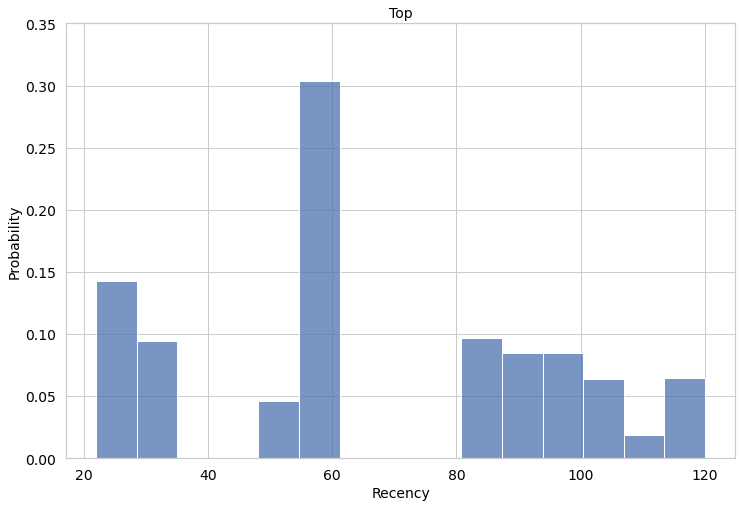

In [ ]:
# Plotting the recency

T=sns.histplot(data=TOP, x="RECENCY", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=15)
plt.xlabel("Recency")
plt.ylabel("Probability")
plt.title("Top")
T.set(ylim=(0, 0.35))

[(0.0, 0.35)]

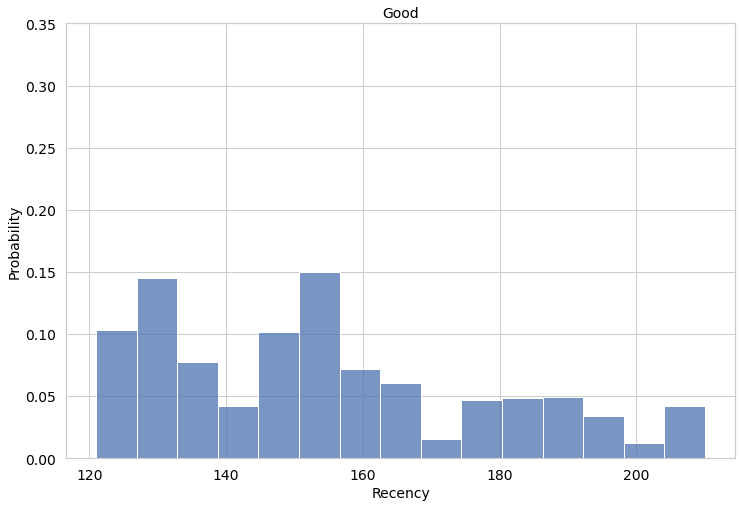

In [ ]:
G=sns.histplot(data=GOOD, x="RECENCY", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=15)
plt.xlabel("Recency")
plt.ylabel("Probability")
plt.title("Good")
G.set(ylim=(0, 0.35))

[(0.0, 0.35)]

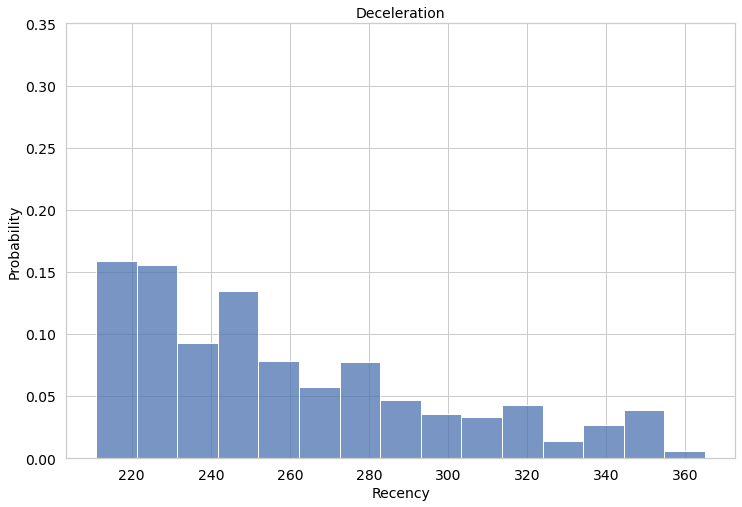

In [ ]:
D=sns.histplot(data=DECELERATION, x="RECENCY", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=15)
plt.xlabel("Recency")
plt.ylabel("Probability")
plt.title("Deceleration")
D.set(ylim=(0, 0.35))

[(0.0, 0.35)]

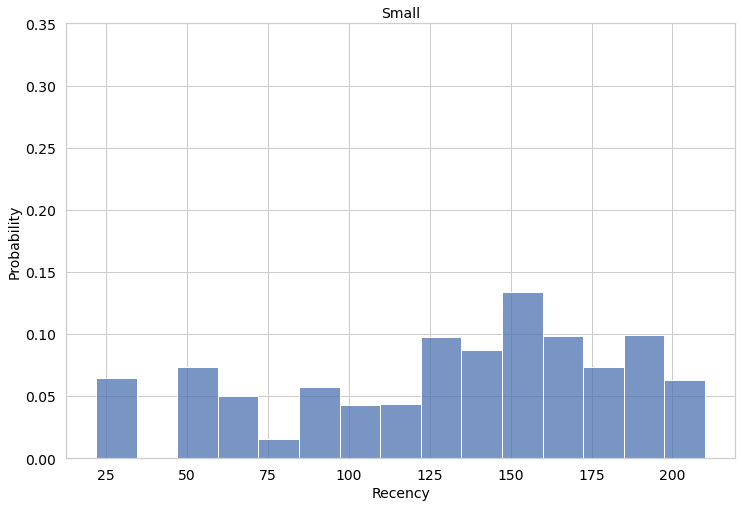

In [ ]:
S=sns.histplot(data=SMALL, x="RECENCY", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=15)
plt.xlabel("Recency")
plt.ylabel("Probability")
plt.title("Small")
S.set(ylim=(0, 0.35))

[(0.0, 0.35)]

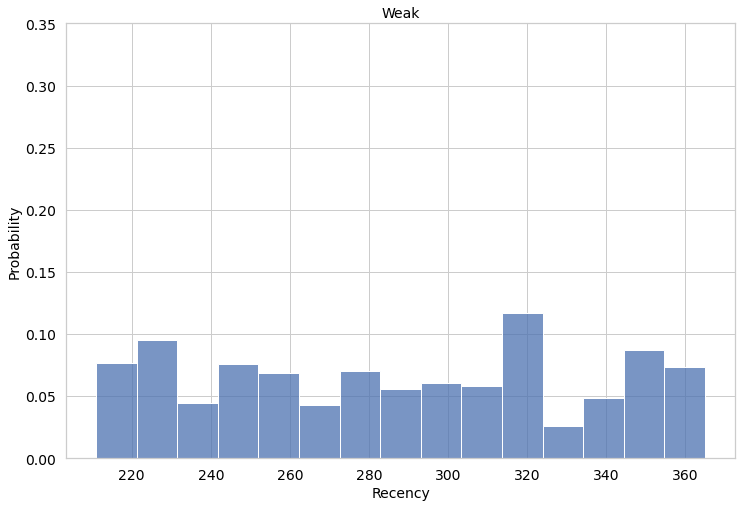

In [ ]:
W=sns.histplot(data=WEAK, x="RECENCY", stat='probability', 
               palette='PuBuGn_r', edgecolor="white", bins=15)
plt.xlabel("Recency")
plt.ylabel("Probability")
plt.title("Weak")
W.set(ylim=(0, 0.35))

## Diversification

*Type of clients*

*   SEXE

posx and posy should be finite values
posx and posy should be finite values


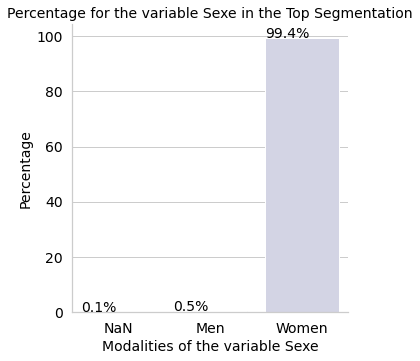

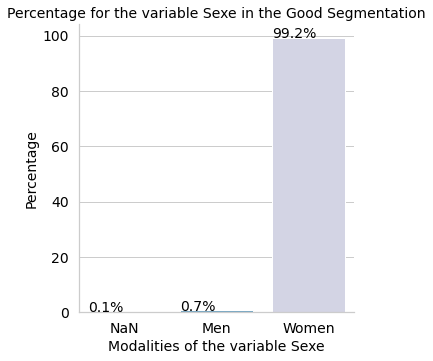

posx and posy should be finite values
posx and posy should be finite values


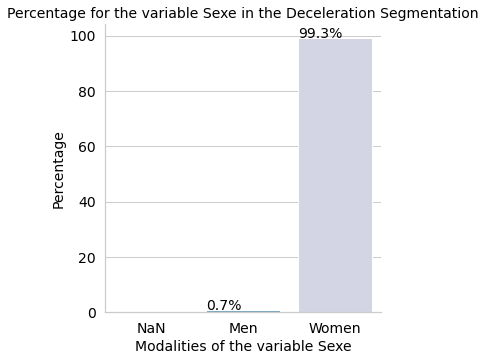

posx and posy should be finite values
posx and posy should be finite values


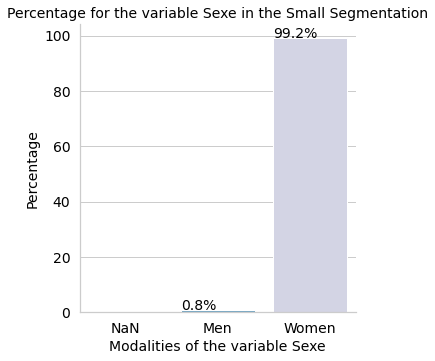

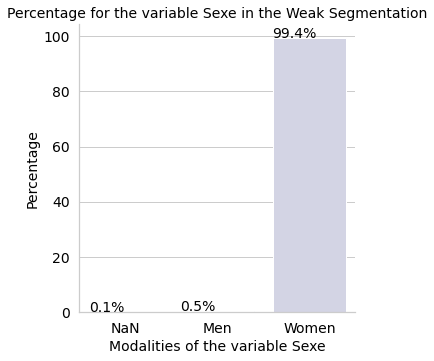

In [ ]:
# Plotting the variable sexe

lT = []
lG = []
lD = []
lS = []
lW = []

# We display the frequency of each modalities of the variable SEXE
# We assume 0 is NaN, 1 is men and 2 is women
TOP_SEXE = TOP["SEXE"].astype(str).value_counts(normalize=True)*100
GOOD_SEXE = GOOD["SEXE"].astype(str).value_counts(normalize=True)*100
DECELERATION_SEXE = DECELERATION["SEXE"].astype(str).value_counts(normalize=True)*100
SMALL_SEXE = SMALL["SEXE"].astype(str).value_counts(normalize=True)*100
WEAK_SEXE = WEAK["SEXE"].astype(str).value_counts(normalize=True)*100

# Creation of a dictionnary with the modalities and the frequencies linked to the modalities
for i in range (TOP_SEXE.shape[0]):
   lT.append({"SEXE":TOP_SEXE.index[i], "percent": TOP_SEXE[i]})
for i in range (GOOD_SEXE.shape[0]):
   lG.append({"SEXE":GOOD_SEXE.index[i], "percent": GOOD_SEXE[i]})
for i in range (DECELERATION_SEXE.shape[0]):
   lD.append({"SEXE":DECELERATION_SEXE.index[i], "percent": DECELERATION_SEXE[i]})
for i in range (SMALL_SEXE.shape[0]):
   lS.append({"SEXE":SMALL_SEXE.index[i], "percent": SMALL_SEXE[i]})
for i in range (WEAK_SEXE.shape[0]):
   lW.append({"SEXE":WEAK_SEXE.index[i], "percent": WEAK_SEXE[i]})

# We transform this dictionnary into a dataframe
dfT = pd.DataFrame(lT)
dfG = pd.DataFrame(lG)
dfD = pd.DataFrame(lD)
dfS = pd.DataFrame(lS)
dfW = pd.DataFrame(lW)

# We plot the barplot (without the frequencies)
# We want to plot them in the same order 
T = sns.catplot(x = "SEXE", y = "percent", kind= 'bar',data = dfT, 
                palette = 'PuBuGn_r', order=dfT.sort_values('SEXE',ascending = True).SEXE)
T.set_xticklabels(["NaN", "Men", "Women"])
T.ax.set(xlabel='Modalities of the variable Sexe',
       ylabel='Percentage')

G = sns.catplot(x = "SEXE", y = "percent", kind= 'bar',data = dfG, 
                palette = 'PuBuGn_r', order=dfT.sort_values('SEXE',ascending = True).SEXE)
G.set_xticklabels(["NaN", "Men", "Women"])
G.ax.set(xlabel='Modalities of the variable Sexe',
       ylabel='Percentage')

D = sns.catplot(x = "SEXE", y = "percent", kind= 'bar',data = dfD, 
                palette = 'PuBuGn_r', order=dfT.sort_values('SEXE',ascending = True).SEXE)
D.set_xticklabels(["NaN", "Men", "Women"])
D.ax.set(xlabel='Modalities of the variable Sexe',
       ylabel='Percentage')

S = sns.catplot(x = "SEXE", y = "percent", kind= 'bar',data = dfS, 
                palette = 'PuBuGn_r', order=dfT.sort_values('SEXE',ascending = True).SEXE)
S.set_xticklabels(["NaN", "Men", "Women"])
S.ax.set(xlabel='Modalities of the variable Sexe',
       ylabel='Percentage')
W = sns.catplot(x = "SEXE", y = "percent", kind= 'bar',data = dfW, 
                palette = 'PuBuGn_r', order=dfT.sort_values('SEXE',ascending = True).SEXE)
W.set_xticklabels(["NaN", "Men", "Women"])
W.ax.set(xlabel='Modalities of the variable Sexe',
       ylabel='Percentage')

# We add the frequencies at the top of each bar
for dataframe in [T,G,D,S,W]:
  for p in dataframe.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    dataframe.ax.text(txt_x,txt_y,txt)
    if dataframe==T:
      dataframe.ax.set_title("Percentage for the variable Sexe in the Top Segmentation")
    if dataframe==G:
      dataframe.ax.set_title("Percentage for the variable Sexe in the Good Segmentation")
    if dataframe==D:
      dataframe.ax.set_title("Percentage for the variable Sexe in the Deceleration Segmentation")
    if dataframe==S:
      dataframe.ax.set_title("Percentage for the variable Sexe in the Small Segmentation")
    if dataframe==W:
      dataframe.ax.set_title("Percentage for the variable Sexe in the Weak Segmentation")

In [ ]:
# We print the frequencies

print(TOP_SEXE) 
print(GOOD_SEXE) 
print(DECELERATION_SEXE) 
print(SMALL_SEXE) 
print(WEAK_SEXE) 

2    99.405823
1     0.534759
0     0.059418
Name: SEXE, dtype: float64
2    99.214502
1     0.664653
0     0.120846
Name: SEXE, dtype: float64
2    99.284692
1     0.715308
Name: SEXE, dtype: float64
2    99.188007
1     0.811993
Name: SEXE, dtype: float64
2    99.350649
1     0.531287
0     0.118064
Name: SEXE, dtype: float64


* AGE

[(0.0, 85.0)]

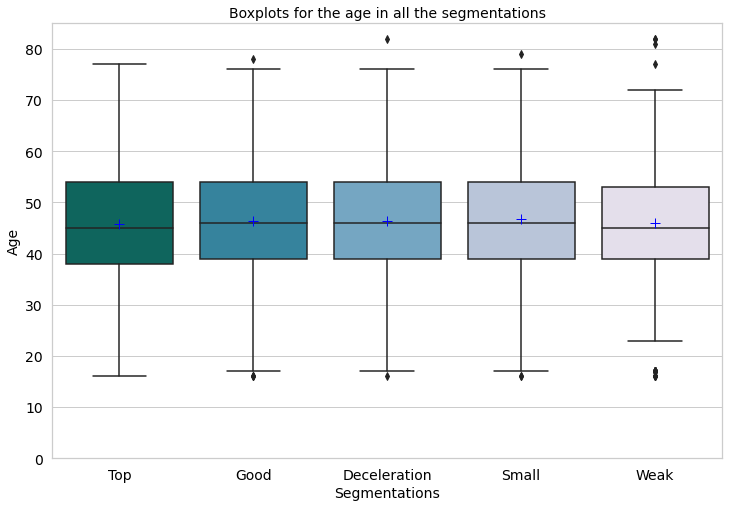

In [ ]:
# We plot all the boxplot in the same plot to compare them easily

G=sns.boxplot(x=MASTER_RFM["final_SEGMENTATION_RFM"], y=MASTER_RFM["AGE"], palette="PuBuGn_r", 
              showmeans=True, meanprops={"marker":"+","markeredgecolor":"Blue","markersize":"10"},
              order=['Top', 'Good', 'Deceleration', 'Small','Weak'])
G.set(xlabel='Segmentations',ylabel='Age')
G.set_title("Boxplots for the age in all the segmentations")
G.set(ylim=(0, 85))

Text(0.5, 1.0, 'Probability for the age in the top segmentation')

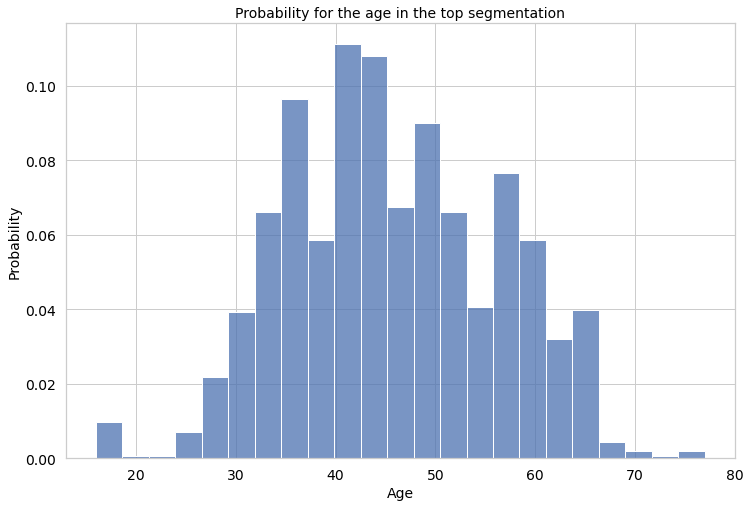

In [ ]:
# We plot the histogram of the variable Age in the Top Segmentation

sns.histplot(data=TOP, x="AGE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability for the age in the top segmentation")

In [ ]:
#We print the statistics summaries for the variable Age in the Top Segmentation

TOP["AGE"].describe()

count    1555.000000
mean       45.711254
std        10.556990
min        16.000000
25%        38.000000
50%        45.000000
75%        54.000000
max        77.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Probability for the variable age in the good segmentation')

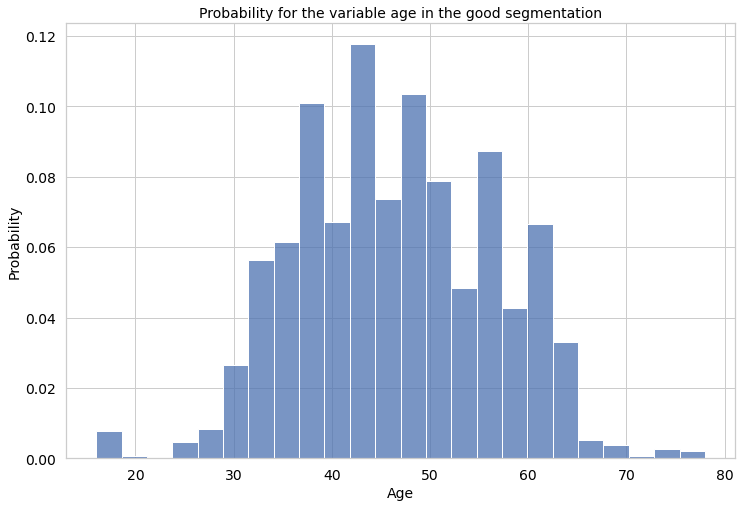

In [ ]:
#We plot the histogram of the variable Age in the Good Segmentation

sns.histplot(data=GOOD, x="AGE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability for the variable age in the good segmentation")

In [ ]:
#We print the statistics summaries for the variable Age in the Good Segmentation

GOOD["AGE"].describe()

count    1546.000000
mean       46.454075
std         9.928718
min        16.000000
25%        39.000000
50%        46.000000
75%        54.000000
max        78.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Probability for the variable age in the deceleration segmentation')

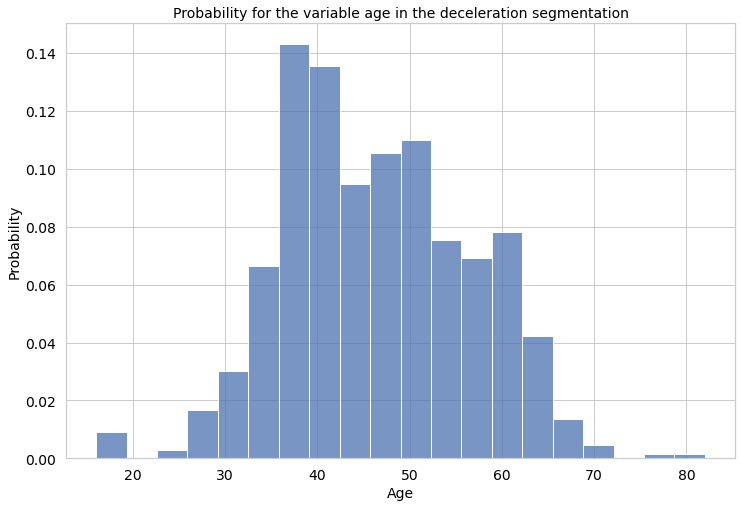

In [ ]:
#We plot the histogram of the variable Age in the Deceleration Segmentation

sns.histplot(data=DECELERATION, x="AGE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability for the variable age in the deceleration segmentation")

In [ ]:
#We print the statistics summaries for the variable Age in the Deceleration Segmentation
DECELERATION["AGE"].describe()

count    664.000000
mean      46.302711
std       10.101756
min       16.000000
25%       39.000000
50%       46.000000
75%       54.000000
max       82.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Probability for the variable age in the small segmentation')

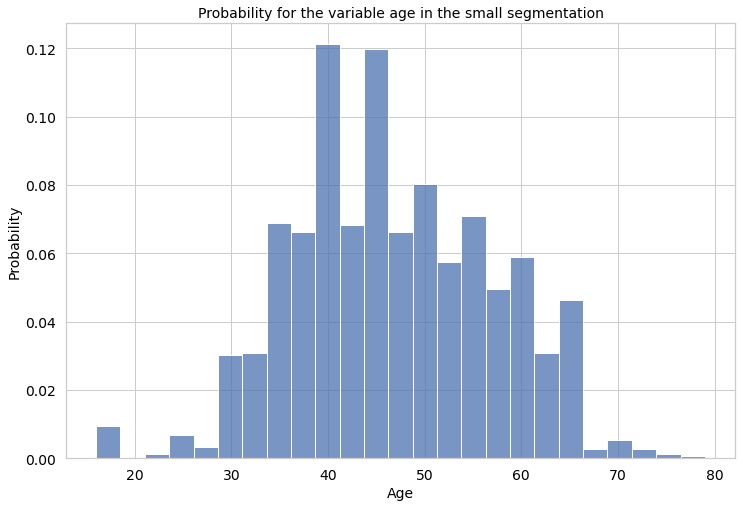

In [ ]:
#We plot the histogram of the variable Age in the Small Segmentation

sns.histplot(data=SMALL, x="AGE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability for the variable age in the small segmentation")

In [ ]:
#We print the statistics summaries for the variable Age in the Small Segmentation

SMALL["AGE"].describe()

count    1493.000000
mean       46.723376
std        10.205225
min        16.000000
25%        39.000000
50%        46.000000
75%        54.000000
max        79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Probability for the variable Age in the weak segmentation')

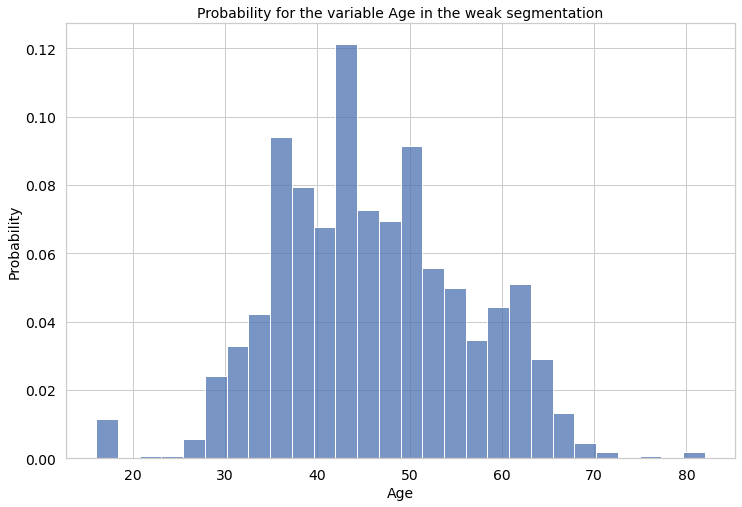

In [ ]:
#We plot the histogram of the variable Age in the Weak Segmentation

sns.histplot(data=WEAK, x="AGE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Probability for the variable Age in the weak segmentation")

In [ ]:
#We print the statistics summaries for the variable Age in the Weak Segmentation

WEAK["AGE"].describe()

count    1584.000000
mean       45.950126
std        10.284490
min        16.000000
25%        39.000000
50%        45.000000
75%        53.000000
max        82.000000
Name: AGE, dtype: float64

* CAT_PROF

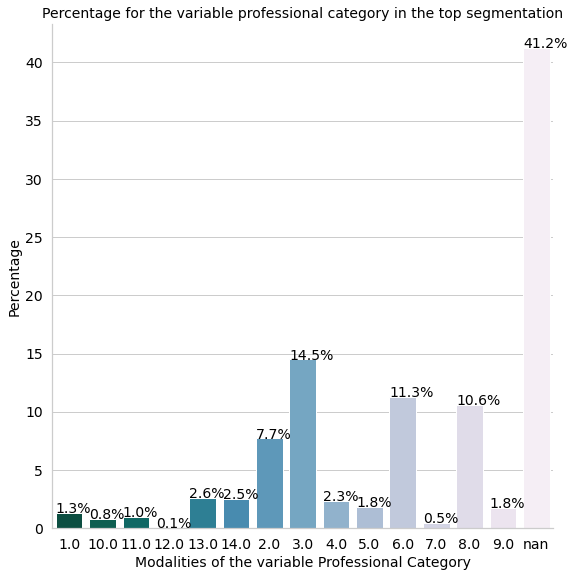

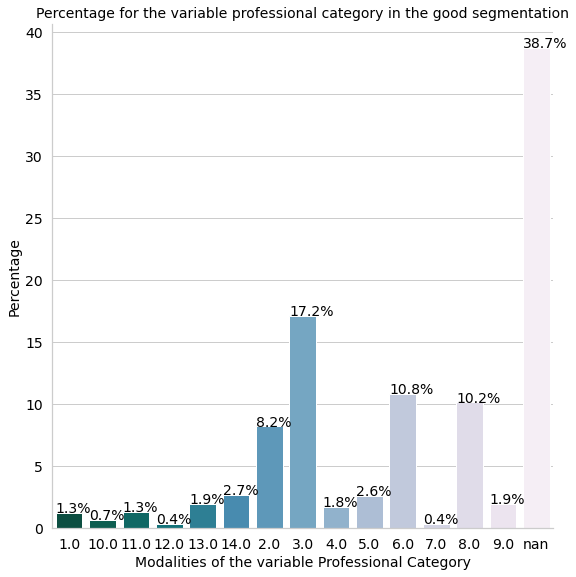

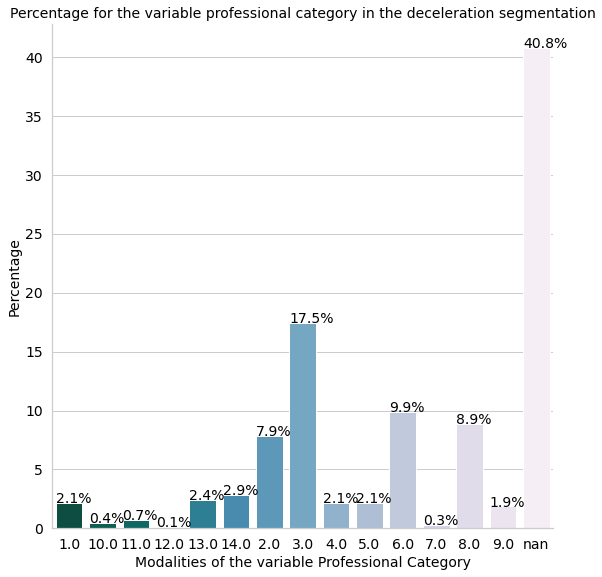

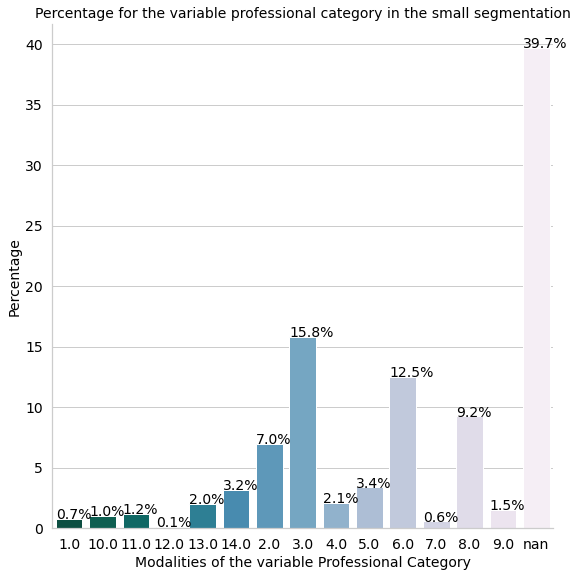

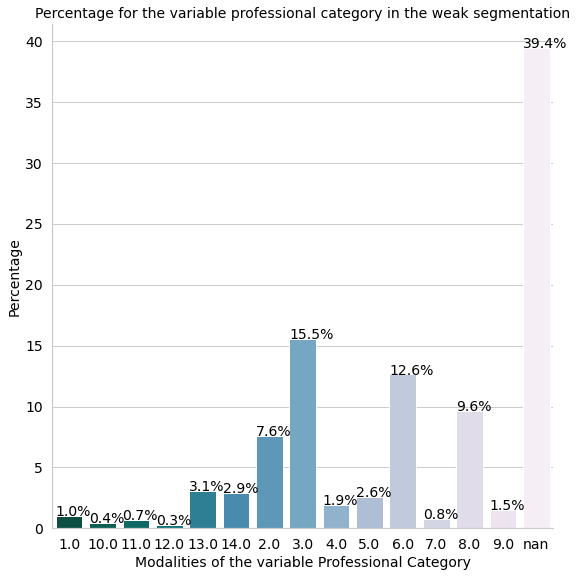

In [ ]:
# Plotting the variable CAT_PROF

lT = []
lG = []
lD = []
lS = []
lW = []

# We display the frequency of each modalities of the variable CAT_PROF

TOP_PROF = TOP["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100
GOOD_PROF = GOOD["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100
DECELERATION_PROF = DECELERATION["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100
SMALL_PROF = SMALL["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100
WEAK_PROF = WEAK["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100

# Creation of a dictionnary with the modalities and the frequencies linked to the modalities
for i in range (TOP_PROF.shape[0]):
   lT.append({"CATEGORIE_PROF":TOP_PROF.index[i], "percent": TOP_PROF[i]})
for i in range (GOOD_PROF.shape[0]):
   lG.append({"CATEGORIE_PROF":GOOD_PROF.index[i], "percent": GOOD_PROF[i]})
for i in range (DECELERATION_PROF.shape[0]):
   lD.append({"CATEGORIE_PROF":DECELERATION_PROF.index[i], "percent": DECELERATION_PROF[i]})
for i in range (SMALL_PROF.shape[0]):
   lS.append({"CATEGORIE_PROF":SMALL_PROF.index[i], "percent": SMALL_PROF[i]})
for i in range (WEAK_PROF.shape[0]):
   lW.append({"CATEGORIE_PROF":WEAK_PROF.index[i], "percent": WEAK_PROF[i]})

# We transform this dictionnary into a dataframe
dfT = pd.DataFrame(lT)
dfG = pd.DataFrame(lG)
dfD = pd.DataFrame(lD)
dfS = pd.DataFrame(lS)
dfW = pd.DataFrame(lW)

# We plot the barplot (without the frequencies)
# We want to plot them in the same order 
T = sns.catplot(x = "CATEGORIE_PROF", y = "percent", kind= 'bar',data = dfT, height=8,
                palette = 'PuBuGn_r', order=dfT.sort_values('CATEGORIE_PROF',ascending = True).CATEGORIE_PROF)
T.ax.set(xlabel='Modalities of the variable Professional Category',
       ylabel='Percentage')

G = sns.catplot(x = "CATEGORIE_PROF", y = "percent", kind= 'bar',data = dfG, height=8, 
                palette = 'PuBuGn_r', order=dfT.sort_values('CATEGORIE_PROF',ascending = True).CATEGORIE_PROF)
G.ax.set(xlabel='Modalities of the variable Professional Category',
       ylabel='Percentage')

D = sns.catplot(x = "CATEGORIE_PROF", y = "percent", kind= 'bar',data = dfD, height=8, 
                palette = 'PuBuGn_r', order=dfT.sort_values('CATEGORIE_PROF',ascending = True).CATEGORIE_PROF)
D.ax.set(xlabel='Modalities of the variable Professional Category',
       ylabel='Percentage')

S = sns.catplot(x = "CATEGORIE_PROF", y = "percent", kind= 'bar',data = dfS, height=8, 
                palette = 'PuBuGn_r', order=dfT.sort_values('CATEGORIE_PROF',ascending = True).CATEGORIE_PROF)
S.ax.set(xlabel='Modalities of the variable Professional Category',
       ylabel='Percentage')

W = sns.catplot(x = "CATEGORIE_PROF", y = "percent", kind= 'bar',data = dfW, height=8, 
                palette = 'PuBuGn_r', order=dfT.sort_values('CATEGORIE_PROF',ascending = True).CATEGORIE_PROF)
W.ax.set(xlabel='Modalities of the variable Professional Category',
       ylabel='Percentage')

# We add the frequencies at the top of each bar
for dataframe in [T,G,D,S,W]:
  for p in dataframe.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    dataframe.ax.text(txt_x,txt_y,txt)
    if dataframe==T:
      dataframe.ax.set_title("Percentage for the variable professional category in the top segmentation")
    if dataframe==G:
      dataframe.ax.set_title("Percentage for the variable professional category in the good segmentation")
    if dataframe==D:
      dataframe.ax.set_title("Percentage for the variable professional category in the deceleration segmentation")
    if dataframe==S:
      dataframe.ax.set_title("Percentage for the variable professional category in the small segmentation")
    if dataframe==W:
      dataframe.ax.set_title("Percentage for the variable professional category in the weak segmentation")

In [ ]:
# We print the the frequencies of the profesional category for each segmentation
print("Top frequency")
print(TOP_PROF)
print('\n')

print("Good frequency")
print(GOOD_PROF)
print("\n")

print("Decelaration frequency")
print(DECELERATION_PROF)
print("\n")

print("Small frequency")
print(SMALL_PROF)
print("\n")

print("Weak frequency")
print(WEAK_PROF)
print("\n")

Top frequency
nan     41.235888
3.0     14.497920
6.0     11.289364
8.0     10.576352
2.0      7.724302
13.0     2.614379
14.0     2.495544
4.0      2.317291
5.0      1.841949
9.0      1.782531
1.0      1.307190
11.0     1.010101
10.0     0.772430
7.0      0.475342
12.0     0.059418
Name: CATEGORIE_PROF, dtype: float64


Good frequency
nan     38.731118
3.0     17.160121
6.0     10.815710
8.0     10.151057
2.0      8.217523
14.0     2.719033
5.0      2.598187
9.0      1.933535
13.0     1.933535
4.0      1.752266
11.0     1.329305
1.0      1.268882
10.0     0.664653
7.0      0.362538
12.0     0.362538
Name: CATEGORIE_PROF, dtype: float64


Decelaration frequency
nan     40.772532
3.0     17.453505
6.0      9.871245
8.0      8.869814
2.0      7.868383
14.0     2.861230
13.0     2.432046
5.0      2.145923
4.0      2.145923
1.0      2.145923
9.0      1.859800
11.0     0.715308
10.0     0.429185
7.0      0.286123
12.0     0.143062
Name: CATEGORIE_PROF, dtype: float64


Small frequency
nan  

## Attachment

*Are they attached to the store ?*



*  NB_GIFTS

Text(0.5, 1.0, 'Boxplot for the number of gifts received in all the segmentations')

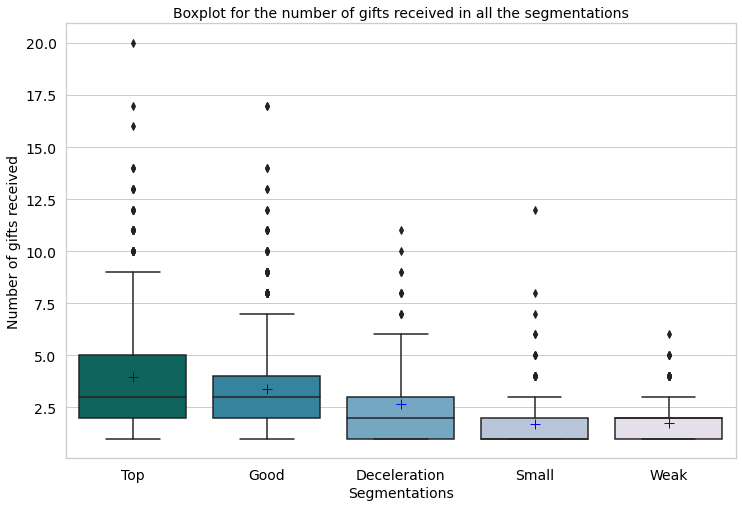

In [ ]:
# We plot all the boxplot in the same plot to compare them easily

G=sns.boxplot(x=MASTER_RFM["final_SEGMENTATION_RFM"], y=MASTER_RFM["NB_GIFTS"], 
              palette="PuBuGn_r", showmeans=True, 
              meanprops={"marker":"+","markeredgecolor":"Blue","markersize":"10"},order=[
                 'Top', 'Good', 'Deceleration', 'Small','Weak'])
G.set(xlabel='Segmentations',ylabel='Number of gifts received')
G.set_title("Boxplot for the number of gifts received in all the segmentations")

In [ ]:
# We print the statistics summaries for the number of gifts in the top Segmentation

TOP["NB_GIFTS"].describe()

count    1184.000000
mean        3.938345
std         2.673324
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        20.000000
Name: NB_GIFTS, dtype: float64

In [ ]:
# We print the statistics summaries for the number of gifts in the good Segmentation

GOOD["NB_GIFTS"].describe()

count    1105.000000
mean        3.376471
std         2.338127
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: NB_GIFTS, dtype: float64

In [ ]:
# We print the statistics summaries for the number of gifts in the deceleration Segmentation

DECELERATION["NB_GIFTS"].describe()

count    366.000000
mean       2.683060
std        1.740127
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: NB_GIFTS, dtype: float64

In [ ]:
# We plot the statistics summaries for the number of gifts in the Small Segmentation

SMALL["NB_GIFTS"].describe()

count    350.000000
mean       1.705714
std        1.180899
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
Name: NB_GIFTS, dtype: float64

In [ ]:
# We print the statistics summaries for the number of gifts in the Weak Segmentation

WEAK["NB_GIFTS"].describe()

count    386.000000
mean       1.761658
std        0.937075
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: NB_GIFTS, dtype: float64

* AVG VALUE PER VISIT

Text(0.5, 1.0, 'Boxplot for the average value per visit received in all the segmentations')

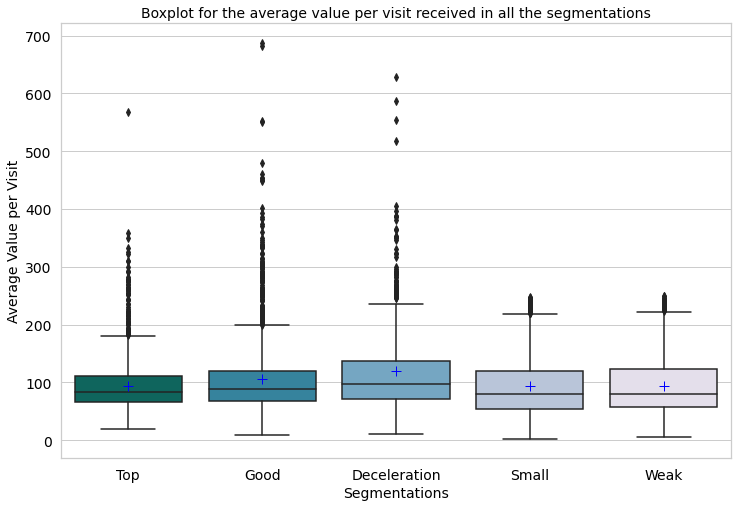

In [ ]:
# We plot all the boxplot in the same plot to compare them easily

G=sns.boxplot(x=MASTER_RFM["final_SEGMENTATION_RFM"], y=MASTER_RFM["AVG_VISIT_VALUE"], palette="PuBuGn_r", showmeans=True, meanprops={"marker":"+","markeredgecolor":"Blue","markersize":"10"},order=[
                 'Top', 'Good', 'Deceleration', 'Small','Weak'])
G.set(xlabel='Segmentations',ylabel='Average Value per Visit')
G.set_title("Boxplot for the average value per visit received in all the segmentations")

Text(0.5, 1.0, 'Histogram for the average value per visit received in the top segmentation')

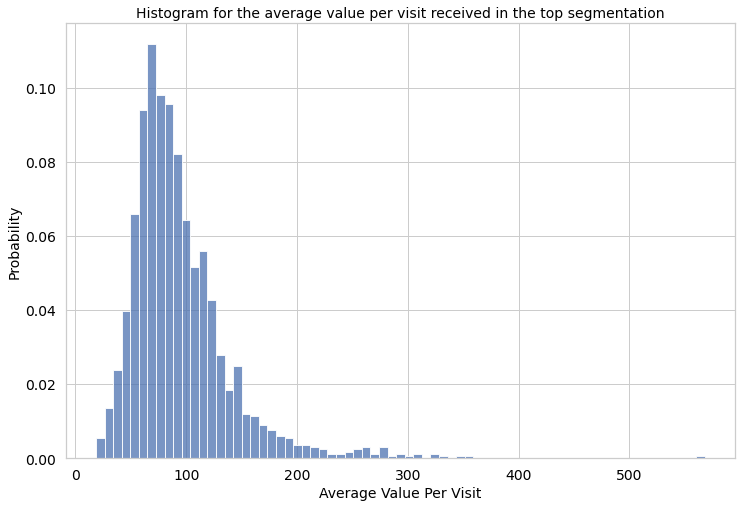

In [ ]:
# We print the histplot for the average value per visit for the top segmentation

sns.histplot(data=TOP, x="AVG_VISIT_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Average Value Per Visit")
plt.ylabel("Probability")
plt.title("Histogram for the average value per visit received in the top segmentation")

In [ ]:
# We print the statistics summaries for the variable Average Value Per Visit in the Top segmentation

TOP["AVG_VISIT_VALUE"].describe()

count    1683.000000
mean       94.164557
std        45.632436
min        18.670000
25%        65.900000
50%        84.000000
75%       112.000000
max       568.000000
Name: AVG_VISIT_VALUE, dtype: float64

Text(0.5, 1.0, 'Histogram for the average value per visit received in the good segmentation')

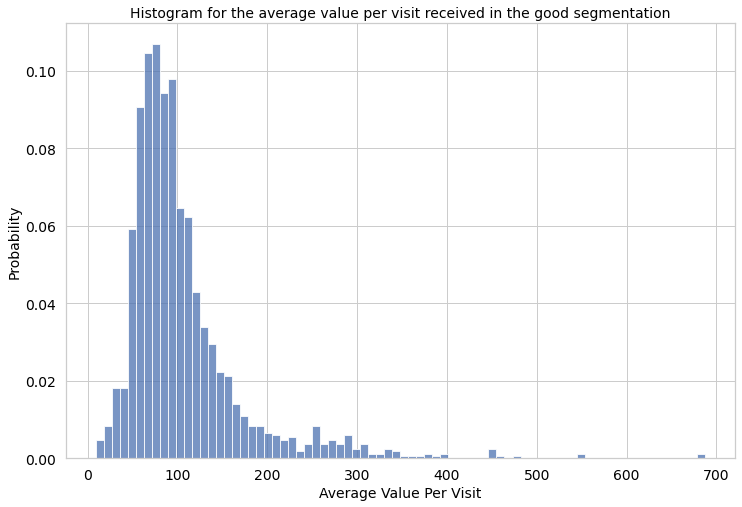

In [ ]:
# We plot the histplot for the average value per visit for the good segmentation
sns.histplot(data=GOOD, x="AVG_VISIT_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Average Value Per Visit")
plt.ylabel("Probability")
plt.title("Histogram for the average value per visit received in the good segmentation")

In [ ]:
# We print the statistics summaries for the variable Average Value Per Visit in the good segmentation

GOOD["AVG_VISIT_VALUE"].describe()

count    1655.000000
mean      105.948103
std        66.806291
min         9.400000
25%        67.330000
50%        89.200000
75%       120.330000
max       687.000000
Name: AVG_VISIT_VALUE, dtype: float64

Text(0.5, 1.0, 'Histogram for the average value per visit received in the deceleration segmentation')

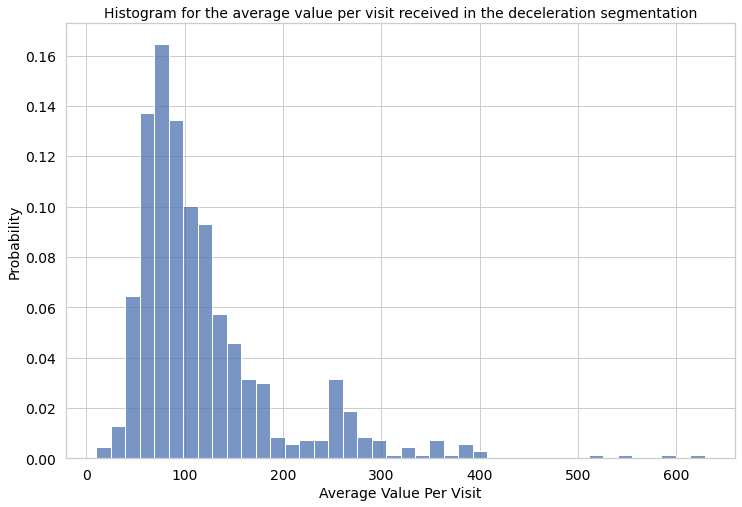

In [ ]:
# We plot the histplot for the average value per visit for the deceleration segmentation

sns.histplot(data=DECELERATION, x="AVG_VISIT_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Average Value Per Visit")
plt.ylabel("Probability")
plt.title("Histogram for the average value per visit received in the deceleration segmentation")

In [ ]:
# We print the statistics summaries for the variable Average Value Per Visit in the deceleration segmentation

DECELERATION["AVG_VISIT_VALUE"].describe()

count    699.000000
mean     119.383791
std       76.765357
min       10.000000
25%       71.500000
50%       96.500000
75%      137.585000
max      629.000000
Name: AVG_VISIT_VALUE, dtype: float64

Text(0.5, 1.0, 'Histogram for the average value per visit received in the small segmentation')

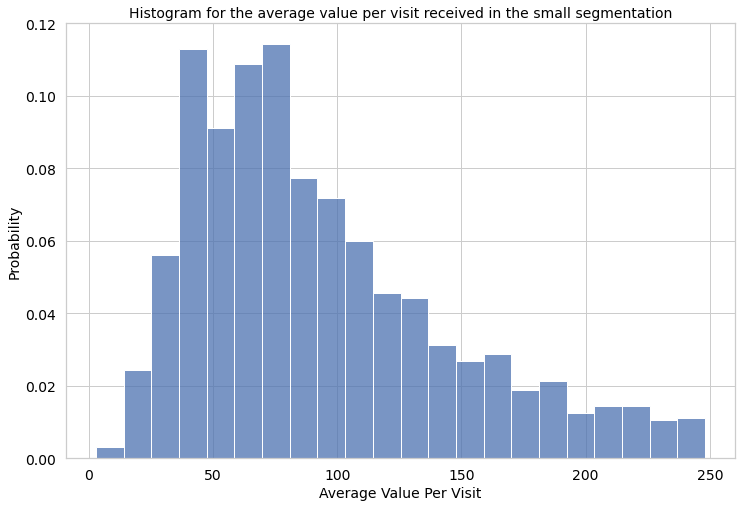

In [ ]:
# We plot the histplot for the average value per visit for the Small segmentation

sns.histplot(data=SMALL, x="AVG_VISIT_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Average Value Per Visit")
plt.ylabel("Probability")
plt.title("Histogram for the average value per visit received in the small segmentation")

In [ ]:
# We print the statistics summaries for the variable Average Value Per Visit in the small segmentation

SMALL["AVG_VISIT_VALUE"].describe()

count    1601.000000
mean       93.335415
std        51.917265
min         3.000000
25%        54.000000
50%        80.000000
75%       120.000000
max       248.000000
Name: AVG_VISIT_VALUE, dtype: float64

Text(0.5, 1.0, 'Histogram for the average value per visit received in the weak segmentation')

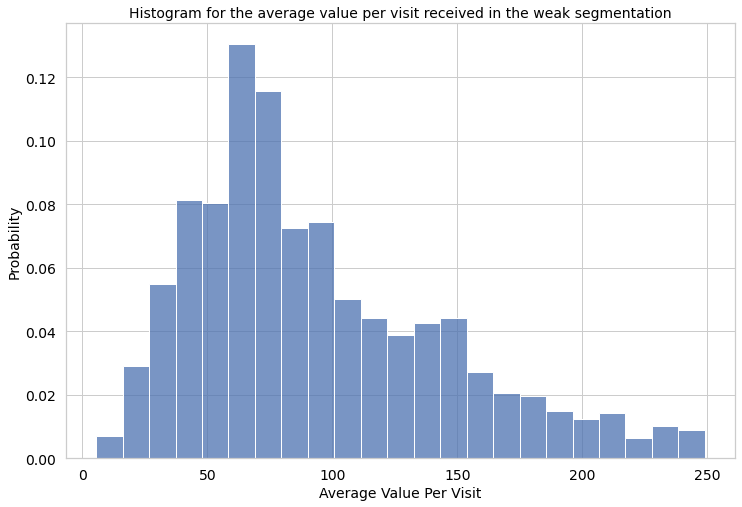

In [ ]:
# We plot the histplot for the average value per visit for the weak segmentation

sns.histplot(data=WEAK, x="AVG_VISIT_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Average Value Per Visit")
plt.ylabel("Probability")
plt.title("Histogram for the average value per visit received in the weak segmentation")

In [ ]:
# We print the statistics summaries for the variable Average Value Per Visit in the weak segmentation

WEAK["AVG_VISIT_VALUE"].describe()

count    1694.000000
mean       93.731405
std        50.606646
min         5.500000
25%        58.000000
50%        80.000000
75%       123.750000
max       249.000000
Name: AVG_VISIT_VALUE, dtype: float64

* AVG NUMBER OF PRODUCTS PER VISIT 

Text(0.5, 1.0, 'Boxplot for the average number of products per visit in all the segmentations')

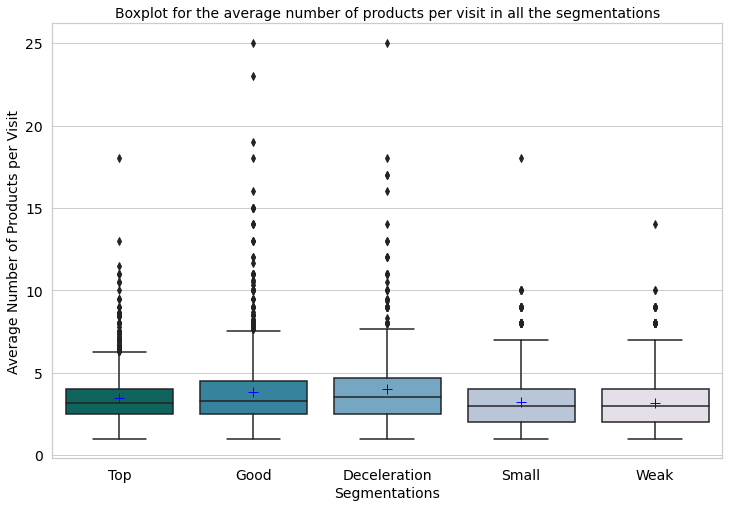

In [ ]:
# We plot all the boxplot in the same plot to compare them easily

G=sns.boxplot(x=MASTER_RFM["final_SEGMENTATION_RFM"], y=MASTER_RFM["AVG_NB_PRODUCTS_VISIT"], palette="PuBuGn_r", showmeans=True, meanprops={"marker":"+","markeredgecolor":"Blue","markersize":"10"},order=[
                 'Top', 'Good', 'Deceleration', 'Small','Weak'])
G.set(xlabel='Segmentations',ylabel='Average Number of Products per Visit')
G.set_title("Boxplot for the average number of products per visit in all the segmentations")

In [ ]:
# We print the statistics summaries for the variable Average Number of Products Per Visit in the Top segmentation

TOP["AVG_NB_PRODUCTS_VISIT"].describe()

count    1683.000000
mean        3.459263
std         1.515253
min         1.000000
25%         2.500000
50%         3.170000
75%         4.000000
max        18.000000
Name: AVG_NB_PRODUCTS_VISIT, dtype: float64

In [ ]:
# We print the statistics summaries for the variable Average Number of Products Per Visit in the Good segmentation

GOOD["AVG_NB_PRODUCTS_VISIT"].describe()

count    1655.000000
mean        3.813940
std         2.193768
min         1.000000
25%         2.500000
50%         3.290000
75%         4.500000
max        25.000000
Name: AVG_NB_PRODUCTS_VISIT, dtype: float64

In [ ]:
# We print the statistics summaries for the variable Average Number of Products Per Visit in the Deceleration segmentation

DECELERATION["AVG_NB_PRODUCTS_VISIT"].describe()

count    699.000000
mean       4.016481
std        2.450023
min        1.000000
25%        2.500000
50%        3.500000
75%        4.670000
max       25.000000
Name: AVG_NB_PRODUCTS_VISIT, dtype: float64

In [ ]:
# We print the statistics summaries for the variable Average Number of Products Per Visit in the Small segmentation

SMALL["AVG_NB_PRODUCTS_VISIT"].describe()

count    1601.000000
mean        3.200187
std         1.838748
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        18.000000
Name: AVG_NB_PRODUCTS_VISIT, dtype: float64

In [ ]:
# We print the statistics summaries for the variable Average Number of Products Per Visit in the Weak segmentation

WEAK["AVG_NB_PRODUCTS_VISIT"].describe()

count    1694.000000
mean        3.165880
std         1.752205
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        14.000000
Name: AVG_NB_PRODUCTS_VISIT, dtype: float64

* CUMULATED PURCHASE AMOUNT

Text(0.5, 1.0, 'Boxplot for the cumulated purchase amount received in all the segmentations')

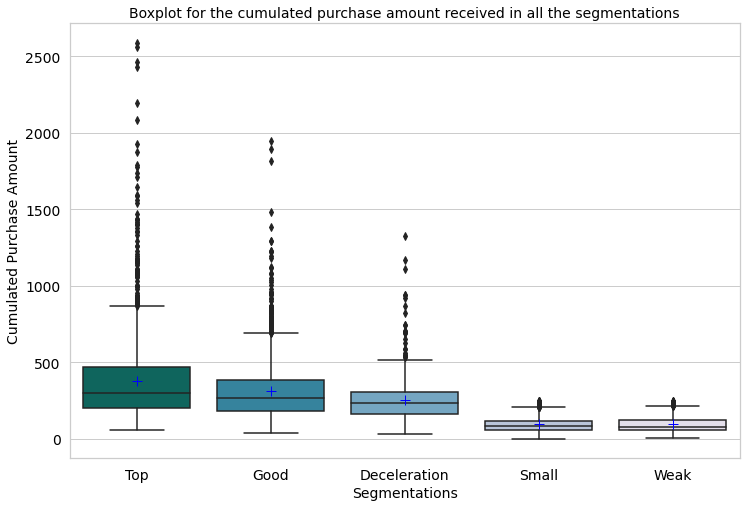

In [ ]:
# boxplot for the cumulated purchase amount of all the different segments

G=sns.boxplot(x=MASTER_RFM["final_SEGMENTATION_RFM"], y=MASTER_RFM["CUMUL_VALUE"], palette="PuBuGn_r", showmeans=True, meanprops={"marker":"+","markeredgecolor":"Blue","markersize":"10"},order=[
                 'Top', 'Good', 'Deceleration', 'Small','Weak'])
G.set(xlabel='Segmentations',ylabel='Cumulated Purchase Amount')
G.set_title("Boxplot for the cumulated purchase amount received in all the segmentations")

Text(0.5, 1.0, 'Histogram for the cumulated purchase amount  in the top segmentation')

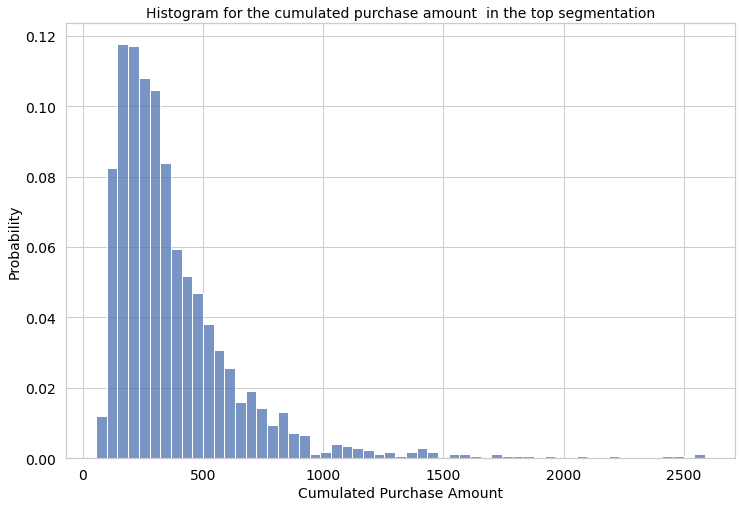

In [ ]:
# boxplot for the cumulated purchase amount followed by summary statistics

sns.histplot(data=TOP, x="CUMUL_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Cumulated Purchase Amount")
plt.ylabel("Probability")
plt.title("Histogram for the cumulated purchase amount  in the top segmentation")

In [ ]:
TOP["CUMUL_VALUE"].describe()

count    1683.000000
mean      379.954843
std       280.229300
min        56.000000
25%       204.500000
50%       301.000000
75%       471.000000
max      2587.000000
Name: CUMUL_VALUE, dtype: float64

Text(0.5, 1.0, 'Histogram for the cumulated purchase amount  in the good segmentation')

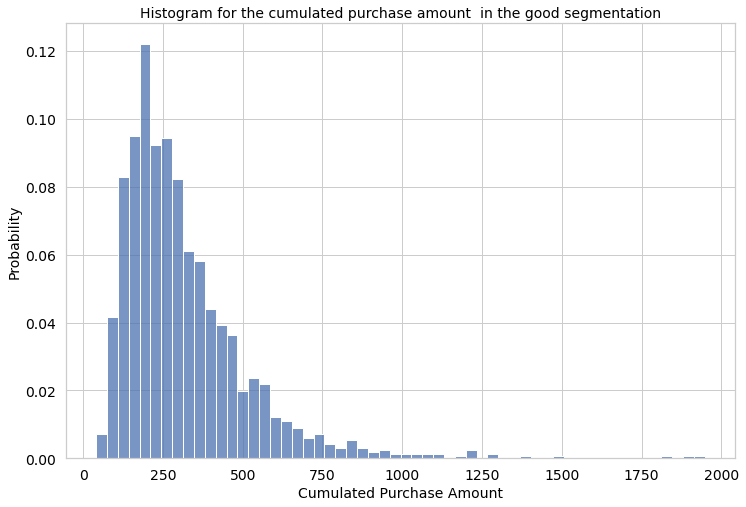

In [ ]:
sns.histplot(data=GOOD, x="CUMUL_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Cumulated Purchase Amount")
plt.ylabel("Probability")
plt.title("Histogram for the cumulated purchase amount  in the good segmentation")

In [ ]:
GOOD["CUMUL_VALUE"].describe()

count    1655.000000
mean      315.335347
std       198.868603
min        41.000000
25%       184.000000
50%       266.000000
75%       388.000000
max      1948.000000
Name: CUMUL_VALUE, dtype: float64

Text(0.5, 1.0, 'Histogram for the cumulated purchase amount  in the deceleration segmentation')

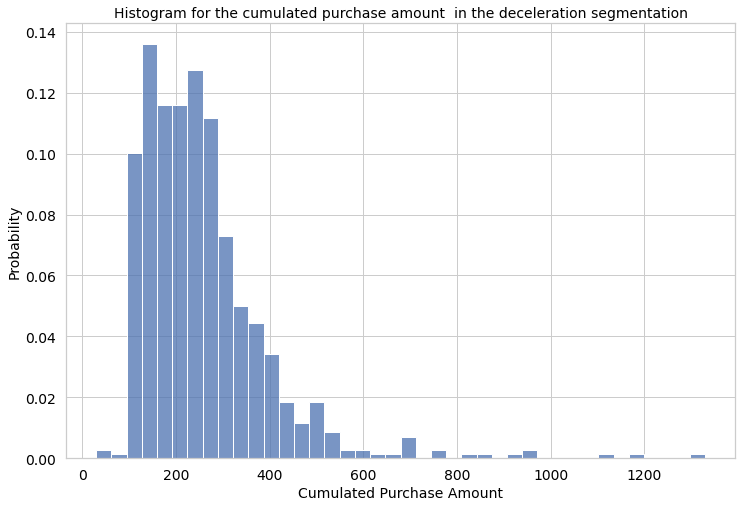

In [ ]:
sns.histplot(data=DECELERATION, x="CUMUL_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Cumulated Purchase Amount")
plt.ylabel("Probability")
plt.title("Histogram for the cumulated purchase amount  in the deceleration segmentation")

In [ ]:
DECELERATION["CUMUL_VALUE"].describe()

count     699.000000
mean      257.074392
std       140.677648
min        30.000000
25%       161.500000
50%       232.000000
75%       307.500000
max      1329.000000
Name: CUMUL_VALUE, dtype: float64

Text(0.5, 1.0, 'Histogram for the cumulated purchase amount  in the small segmentation')

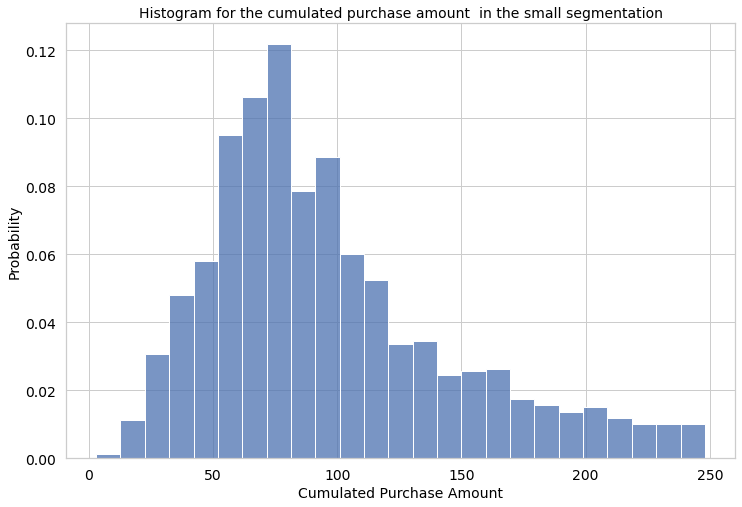

In [ ]:
sns.histplot(data=SMALL, x="CUMUL_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Cumulated Purchase Amount")
plt.ylabel("Probability")
plt.title("Histogram for the cumulated purchase amount  in the small segmentation")

In [ ]:
SMALL["CUMUL_VALUE"].describe()

count    1601.000000
mean       96.925671
std        49.520161
min         3.000000
25%        62.000000
50%        84.000000
75%       120.000000
max       248.000000
Name: CUMUL_VALUE, dtype: float64

Text(0.5, 1.0, 'Histogram for the cumulated purchase amount  in the weak segmentations')

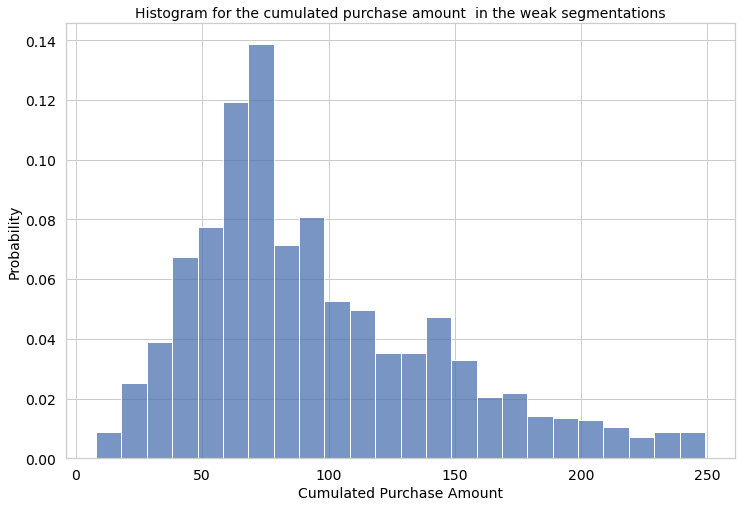

In [ ]:
sns.histplot(data=WEAK, x="CUMUL_VALUE", stat='probability', palette='PuBuGn_r', edgecolor="white")
plt.xlabel("Cumulated Purchase Amount")
plt.ylabel("Probability")
plt.title("Histogram for the cumulated purchase amount  in the weak segmentations")

In [ ]:
WEAK["CUMUL_VALUE"].describe()

count    1694.000000
mean       95.397875
std        49.334016
min         8.000000
25%        62.000000
50%        81.000000
75%       123.750000
max       249.000000
Name: CUMUL_VALUE, dtype: float64

# 5. Migration (Bonus) 

Apply the same treatment on the previous period 

## Recalculate the segments

In [ ]:
# We define the new SCOPE
min_date = '2015-06-01 00:00:00'
max_date = '2016-05-31 00:00:00'

# For the RFM we create a table with only the 12 months scope
RECEIPTS_INFO_RFM_bis = RECEIPTS_INFO[(RECEIPTS_INFO.DATE_ACHAT >= min_date) 
                                      & (RECEIPTS_INFO.DATE_ACHAT <= max_date)]

In [ ]:
# Dimensions of the RFM table
RECEIPTS_INFO_RFM_bis.shape

(104084, 29)

In [ ]:
# We compute the same variables as we did for the previous segmentation 

# VISITS
VISIT_bis = RECEIPTS_INFO_RFM_bis[~RECEIPTS_INFO_RFM_bis.MODELE.isin(["FAVO","FAVORI","PLV"])].groupby([
    "DATE_ACHAT", "CODE_BOUTIQUE", "ID_INDIVIDU", "NUM_TICKET"]).aggregate({
    'PRICE': 'sum', 'QUANTITE': 'sum'}).reset_index()
my_columns = ['DATE_ACHAT', 'CODE_BOUTIQUE','ID_INDIVIDU', 'NUM_TICKET', 'VISIT_VALUE', 'NB_PRODUCTS']
VISIT_bis.columns = my_columns
# Computation of the average price per product
VISIT_bis["AVG_PRICE"] = round(VISIT_bis["VISIT_VALUE"] / VISIT_bis["NB_PRODUCTS"],2)


# FREQUENCY
FREQUENCY_bis = VISIT_bis.groupby(["ID_INDIVIDU"]).aggregate({
    'DATE_ACHAT': 'count', 'VISIT_VALUE':  ['mean', 'sum'], 'NB_PRODUCTS': 'mean'}).reset_index()
my_columns = ['ID_INDIVIDU','NB_VISITS','AVG_VISIT_VALUE', 'CUMUL_VALUE','AVG_NB_PRODUCTS_VISIT']
FREQUENCY_bis.columns = my_columns
# We round the results to have only 2 decimals
FREQUENCY_bis['AVG_VISIT_VALUE'] = round(FREQUENCY_bis['AVG_VISIT_VALUE'],2)
FREQUENCY_bis['AVG_NB_PRODUCTS_VISIT'] = round(FREQUENCY_bis['AVG_NB_PRODUCTS_VISIT'],2)


# RECENCY
RECENCY_bis = VISIT_bis.groupby('ID_INDIVIDU').aggregate({'DATE_ACHAT': 'max'}).reset_index()
# Apply date format
RECENCY_bis["DATE_ACHAT"] = pd.to_datetime(RECENCY_bis["DATE_ACHAT"])
# The last purchase date
max_date = pd.to_datetime(max_date)
# We can now compute the difference between the purchase date and the last purchase date
RECENCY_bis["RECENCY"] = (max_date - RECENCY_bis["DATE_ACHAT"])/np.timedelta64(1, 'D')


# STORES
# We aggregate at the individual level and we don't want the purchase which had "promotion sur le lieu de vente"
STORES_bis = RECEIPTS_INFO_RFM_bis[(RECEIPTS_INFO_RFM_bis.MODELE != "PLV") & 
                                   (RECEIPTS_INFO_RFM_bis.CODE_BOUTIQUE.notnull())].groupby(
    'ID_INDIVIDU')["CODE_BOUTIQUE"].nunique().reset_index()
# We give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_STORES']
STORES_bis.columns = my_columns


# LINES
# We exclude the gifts and aggregate at the individual level
LINES_bis = RECEIPTS_INFO_RFM_bis[(~RECEIPTS_INFO_RFM_bis.MODELE.isin(["FAVO","FAVORI","PLV"])) & 
                                  (RECEIPTS_INFO_RFM_bis.LIGNE.notnull())].groupby(
    'ID_INDIVIDU')["LIGNE"].nunique().reset_index()
# We give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_LINES']
LINES_bis.columns = my_columns


# FAMILIES
# We exclude the gifts and "promotion sur lieu de vente" and aggregate at the individual level
FAMILIES_bis = RECEIPTS_INFO_RFM_bis[(~RECEIPTS_INFO_RFM_bis.MODELE.isin(["FAVO","FAVORI","PLV"])) & 
                                     (RECEIPTS_INFO_RFM_bis.FAMILLE.notnull())].groupby(
    'ID_INDIVIDU')["FAMILLE"].nunique().reset_index()
# We give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_FAMILIES']
FAMILIES_bis.columns = my_columns


# GIFTS
# We exclude the gifts and aggregate at the individual level
GIFTS_bis = RECEIPTS_INFO_RFM_bis[(RECEIPTS_INFO_RFM_bis.MODELE.isin(["FAVO","FAVORI"]))|
                                  (RECEIPTS_INFO_RFM_bis.PRICE==0)].groupby(
    'ID_INDIVIDU')["DATE_ACHAT"].count().reset_index()
# We give the good names to the columns
my_columns = ['ID_INDIVIDU', 'NB_GIFTS']
GIFTS_bis.columns = my_columns


# MANAGING STORE
# To get the managing store we need to merge the two following tables
MANAGING_STORE_bis = VISIT_bis[["ID_INDIVIDU","CODE_BOUTIQUE"]].merge(CUSTOMERS_INFO[[
    "ID_INDIVIDU","MANAGING_STORE"]], on="ID_INDIVIDU")
# Creation of a dummy to know if the boutique is a managing store
MANAGING_STORE_bis["MANAGING_STORE_yes_no"] = np.where(MANAGING_STORE_bis[
    "CODE_BOUTIQUE"] == MANAGING_STORE_bis["MANAGING_STORE"], 1, 0)


# SHARE VISITS MANAGING STORE
SHARE_VISITS_MANAGING_STORE_bis = MANAGING_STORE_bis.groupby('ID_INDIVIDU')[
    "MANAGING_STORE_yes_no"].mean().reset_index()
# SHARE_VISITS_MANAGING_STORE: the share of visits in the managing store
my_columns = ['ID_INDIVIDU', 'SHARE_VISITS_MANAGING_STORE']
SHARE_VISITS_MANAGING_STORE_bis.columns = my_columns

In [ ]:
# Merging all the datasets

# We merge the customers_info (with only the desired variables) with the frequency variable
MASTER_bis = CUSTOMERS_INFO[['ID_INDIVIDU', 'CIVILITE', 'SEXE', 'PROFESSION', 'CATEGORIE_PROF', 
   'DATE_CREATION_CARTE','MANAGING_STORE','AGE', 'SENIORITY']].merge(FREQUENCY_bis, on='ID_INDIVIDU', how='left')

# Then we merge the master tables (result of the previous merge) with recency
MASTER_bis = MASTER_bis.merge(RECENCY_bis, on='ID_INDIVIDU', how='left')

# Then we merge the master tables with stores
MASTER_bis = MASTER_bis.merge(STORES_bis, on='ID_INDIVIDU', how='left')

# Then we merge the master tables with lines
MASTER_bis = MASTER_bis.merge(LINES_bis, on='ID_INDIVIDU', how='left')

# Then we merge the master tables with families
MASTER_bis = MASTER_bis.merge(FAMILIES_bis, on='ID_INDIVIDU', how='left')

# Then we merge the master tables with gifts
MASTER_bis = MASTER_bis.merge(GIFTS_bis, on='ID_INDIVIDU', how='left')

# Then we merge the master tables with share_visits_managing_store
MASTER_bis = MASTER_bis.merge(SHARE_VISITS_MANAGING_STORE_bis, on='ID_INDIVIDU', how='left')

In [ ]:
# Dimension of the new segmentation
MASTER_bis.shape

(36157, 20)

In [ ]:
# Displaying the 10 firts rows of the new table
MASTER_bis.head(10)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_CREATION_CARTE,MANAGING_STORE,AGE,SENIORITY,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT,DATE_ACHAT,RECENCY,NB_STORES,NB_LINES,NB_FAMILIES,NB_GIFTS,SHARE_VISITS_MANAGING_STORE
0,4,0,0,NaN,NaN,1989-01-01,751,NaN,NaN,2.0,72.0,144.0,1.0,2016-02-07,114.0,2.0,2.0,2.0,NaN,0.0
1,27,3,2,NaN,3.0,2007-08-08,942,49.0,111.77,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,34,3,2,NaN,6.0,2007-07-27,942,64.0,112.17,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,37,2,2,NaN,3.0,2007-11-07,942,52.0,108.78,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,47,3,2,NaN,NaN,2008-04-23,941,45.0,103.26,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,54,3,2,NaN,8.0,2007-06-11,941,41.0,113.68,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,84,3,2,NaN,2.0,2007-05-12,920,53.0,114.66,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,88,3,2,NaN,8.0,1989-01-01,311,41.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,89,2,2,NaN,NaN,2007-12-18,311,46.0,107.44,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,91,2,2,NaN,2.0,2007-08-31,312,63.0,111.02,1.0,79.0,79.0,3.0,2015-11-07,206.0,1.0,1.0,3.0,NaN,1.0


In [ ]:
# We delete some observations

# We delete the inactive people between our analysis period
MASTER_RFM_bis = MASTER_bis[MASTER_bis.RECENCY.notnull()]

# We decide to drop the people who came only for gifts
MASTER_RFM_bis = MASTER_RFM_bis[MASTER_RFM_bis.CUMUL_VALUE>0]

In [ ]:
# New customer = those who came in the program before 12 months.
MASTER_RFM_bis["NEW_CUSTOMER"] = np.where(MASTER_RFM_bis.SENIORITY<= 12, 1, 0)

In [ ]:
# Inactive customer if recency > 1 years
MASTER_RFM_bis["TOP_INACTIVE"] = np.where(MASTER_RFM_bis.RECENCY>(1*365), 1, 0)

In [ ]:
# Variables of interest
interest_variables = ["CUMUL_VALUE", "NB_VISITS", "RECENCY"]

# We are not keeping the new clients
# This is to define the tresholds for the RFM segmentation
MASTER_RFM_bis.loc[(MASTER_RFM_bis.NEW_CUSTOMER==0),interest_variables].quantile([0.33, 0.67])

,CUMUL_VALUE,NB_VISITS,RECENCY
0.33,132.0,1.0,75.0
0.67,265.0,3.0,206.0


In [ ]:
# Values for the thresholds
min_amount = 130
max_amount = 270
min_freq = 2
max_freq = 3
min_recency = 70
max_recency = 210

In [ ]:
# We define the segmentation for the monetary value
MASTER_RFM_bis["AMOUNT_seg"] = np.where(MASTER_RFM_bis.TOP_INACTIVE == 1, 'Inactive',
                           np.where(MASTER_RFM_bis.NEW_CUSTOMER == 1, 'New',
                           np.where(MASTER_RFM_bis.CUMUL_VALUE < min_amount, 'Low',
                           np.where(MASTER_RFM_bis.CUMUL_VALUE >= max_amount, 'High','Medium'))))

In [ ]:
# We define the segmentation for the frequency
MASTER_RFM_bis["FREQUENCY_seg"] = np.where(MASTER_RFM_bis.TOP_INACTIVE == 1, 'Inactive',
                              np.where(MASTER_RFM_bis.NEW_CUSTOMER == 1, 'New',
                              np.where(MASTER_RFM_bis.NB_VISITS < min_freq, 'Low',
                              np.where(MASTER_RFM_bis.NB_VISITS >= max_freq, 'High','Medium'))))

In [ ]:
# We define the segmentation for the recency
MASTER_RFM_bis["RECENCY_seg"] = np.where(MASTER_RFM_bis.TOP_INACTIVE == 1, 'Inactive',
                            np.where(MASTER_RFM_bis.NEW_CUSTOMER == 1, 'New',
                            np.where(MASTER_RFM_bis.RECENCY > max_recency, 'Low',
                            np.where(MASTER_RFM_bis.RECENCY <= min_recency, 'High','Medium'))))

In [ ]:
# Conditions

#LOW 
condition_FM_LOW_bis = ((MASTER_RFM_bis.FREQUENCY_seg=='Low') & ((MASTER_RFM_bis.AMOUNT_seg=='Low') 
                 | (MASTER_RFM_bis.AMOUNT_seg=='Medium'))) | ((MASTER_RFM_bis.FREQUENCY_seg=='Medium') 
                                                       & (MASTER_RFM_bis.AMOUNT_seg=='Low'))

#MEDIUM
condition_FM_MEDIUM_bis = ((MASTER_RFM_bis.FREQUENCY_seg=='Low') 
              & ((MASTER_RFM_bis.AMOUNT_seg=='Low') 
                 | (MASTER_RFM_bis.AMOUNT_seg=='Medium'))) | ((MASTER_RFM_bis.FREQUENCY_seg=='Medium') 
                                                       & (MASTER_RFM_bis.AMOUNT_seg=='Low'))

#HIGH
condition_FM_HIGH_bis = ((MASTER_RFM_bis.FREQUENCY_seg=='High') 
               & ((MASTER_RFM_bis.AMOUNT_seg=='High') 
                  | (MASTER_RFM_bis.AMOUNT_seg=='Medium'))) | ((MASTER_RFM_bis.FREQUENCY_seg=='Medium') 
                                                        & (MASTER_RFM_bis.AMOUNT_seg=='High'))

In [ ]:
# Segmentation

# We can now say which individuals are in which segmentation
MASTER_RFM_bis["SEGMENTATION_FM_bis"] = np.where(MASTER_RFM_bis.NEW_CUSTOMER, 'New',
    np.where(condition_FM_LOW_bis, 'Low',
    np.where(condition_FM_HIGH_bis, 'High', 'Medium')))

In [ ]:
# Groups

# We set the conditions to create the different groups
condition_TOP_bis = ((MASTER_RFM_bis.RECENCY_seg=='High') & ((MASTER_RFM_bis.SEGMENTATION_FM_bis=='High') | 
                                                     (MASTER_RFM_bis.SEGMENTATION_FM_bis=='Medium')))
condition_GOOD_bis = ((MASTER_RFM_bis.RECENCY_seg=='Medium') & ((MASTER_RFM_bis.SEGMENTATION_FM_bis=='High') | 
                                                        (MASTER_RFM_bis.SEGMENTATION_FM_bis=='Medium')))
condition_DECELERATION_bis = ((MASTER_RFM_bis.RECENCY_seg=='Low') & ((MASTER_RFM_bis.SEGMENTATION_FM_bis=='High') | 
                                                             (MASTER_RFM_bis.SEGMENTATION_FM_bis=='Medium')))
condition_SMALL_bis = ((MASTER_RFM_bis.SEGMENTATION_FM_bis=='Low') & ((MASTER_RFM_bis.RECENCY_seg=='High') | 
                                                          (MASTER_RFM_bis.RECENCY_seg=='Medium')))
condition_WEAK_bis = ((MASTER_RFM_bis.SEGMENTATION_FM_bis=='Low') & (MASTER_RFM_bis.RECENCY_seg=='Low'))

In [ ]:
# We create the different groups
MASTER_RFM_bis["final_SEGMENTATION_RFM_bis"] = np.where(condition_TOP_bis , 'Top',
   np.where(condition_GOOD_bis , 'Good',
   np.where(condition_DECELERATION_bis , 'Deceleration', 
   np.where(condition_SMALL_bis , 'Small',
   np.where(condition_WEAK_bis, 'Weak', MASTER_RFM_bis.SEGMENTATION_FM_bis)))))

In [ ]:
# How many individuals in each group ?
MASTER_RFM_bis[["final_SEGMENTATION_RFM_bis", "ID_INDIVIDU"]].groupby("final_SEGMENTATION_RFM_bis").count()

,ID_INDIVIDU
final_SEGMENTATION_RFM_bis,
Deceleration,675
Good,2056
New,2210
Small,1980
Top,2388
Weak,2322


In [ ]:
# We check if the number of individuals is the total number of people in the final segmentation
MASTER_RFM_bis[["final_SEGMENTATION_RFM_bis", "ID_INDIVIDU"]].count()

final_SEGMENTATION_RFM_bis    11631
ID_INDIVIDU                   11631
dtype: int64

In [ ]:
# Creation of the data frame containing only the Top customers
TOP_bis = MASTER_RFM_bis[MASTER_RFM_bis.final_SEGMENTATION_RFM_bis=='Top']

# Creating the other dataframes to compare
GOOD_bis = MASTER_RFM_bis[MASTER_RFM_bis.final_SEGMENTATION_RFM_bis=='Good']
DECELERATION_bis = MASTER_RFM_bis[MASTER_RFM_bis.final_SEGMENTATION_RFM_bis=='Deceleration']
SMALL_bis = MASTER_RFM_bis[MASTER_RFM_bis.final_SEGMENTATION_RFM_bis=='Small']
WEAK_bis = MASTER_RFM_bis[MASTER_RFM_bis.final_SEGMENTATION_RFM_bis=='Weak']

# Displaying the 10 first rows of the data frame
TOP_bis.head(10)

,ID_INDIVIDU,CIVILITE,SEXE,PROFESSION,CATEGORIE_PROF,DATE_CREATION_CARTE,MANAGING_STORE,AGE,SENIORITY,NB_VISITS,AVG_VISIT_VALUE,CUMUL_VALUE,AVG_NB_PRODUCTS_VISIT,DATE_ACHAT,RECENCY,NB_STORES,NB_LINES,NB_FAMILIES,NB_GIFTS,SHARE_VISITS_MANAGING_STORE,NEW_CUSTOMER,TOP_INACTIVE,AMOUNT_seg,FREQUENCY_seg,RECENCY_seg,SEGMENTATION_FM_bis,final_SEGMENTATION_RFM_bis
208,1396,3,2,NaN,NaN,2007-12-19,920,43.0,107.40,6.0,75.33,452.0,4.00,2016-05-01,30.0,3.0,1.0,7.0,5.0,0.000000,0,0,High,High,High,High,Top
307,1943,2,2,NaN,NaN,2008-05-28,381,49.0,102.11,2.0,81.00,162.0,2.00,2016-05-25,6.0,1.0,1.0,2.0,NaN,0.000000,0,0,Medium,Medium,High,Medium,Top
457,2886,2,2,NaN,6.0,2008-01-30,942,49.0,106.02,12.0,72.42,869.0,2.25,2016-04-13,48.0,1.0,3.0,8.0,2.0,0.000000,0,0,High,High,High,High,Top
497,3140,3,2,NaN,2.0,2007-11-24,942,56.0,108.22,3.0,178.00,534.0,8.00,2016-04-05,56.0,1.0,3.0,9.0,8.0,1.000000,0,0,High,High,High,High,Top
551,3547,3,2,NaN,8.0,2007-10-13,942,41.0,109.60,3.0,180.67,542.0,5.00,2016-05-15,16.0,2.0,3.0,7.0,NaN,0.666667,0,0,High,High,High,High,Top
656,4254,3,2,NaN,NaN,2007-07-17,942,59.0,112.50,5.0,113.20,566.0,4.20,2016-05-25,6.0,2.0,2.0,4.0,5.0,0.400000,0,0,High,High,High,High,Top
901,5806,2,2,NaN,14.0,2008-05-21,331,48.0,102.34,5.0,59.20,296.0,2.60,2016-04-08,53.0,2.0,2.0,6.0,1.0,0.000000,0,0,High,High,High,High,Top
946,6092,2,2,NaN,NaN,2008-04-26,941,47.0,103.16,3.0,149.33,448.0,5.67,2016-03-23,69.0,1.0,1.0,3.0,4.0,1.000000,0,0,High,High,High,High,Top
963,6195,3,2,NaN,2.0,2008-02-13,941,38.0,105.56,3.0,51.33,154.0,3.00,2016-05-17,14.0,3.0,1.0,2.0,4.0,0.333333,0,0,Medium,High,High,High,Top
1044,6713,3,2,NaN,NaN,2008-01-30,941,40.0,106.02,7.0,83.43,584.0,3.00,2016-04-21,40.0,4.0,1.0,7.0,5.0,0.142857,0,0,High,High,High,High,Top


## Cross the two segmentations to quantify migrations 

**Summary statistics**

In [ ]:
TOP_bis[['NB_LINES','NB_FAMILIES',"NB_STORES", 
         "SHARE_VISITS_MANAGING_STORE", 'NB_VISITS','RECENCY','AGE','NB_GIFTS','AVG_VISIT_VALUE','AVG_NB_PRODUCTS_VISIT','CUMUL_VALUE']].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE,NB_VISITS,RECENCY,AGE,NB_GIFTS,AVG_VISIT_VALUE,AVG_NB_PRODUCTS_VISIT,CUMUL_VALUE
count,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2237.000000,1868.000000,2388.000000,2388.000000,2388.000000
mean,2.087102,5.818258,1.650754,0.636006,4.570771,32.865159,46.282074,4.126338,106.158258,3.639556,453.801926
std,0.718970,2.332367,0.875283,0.400427,2.919894,20.990318,10.258271,3.201682,53.439767,1.669888,328.187725
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,16.000000,1.000000,13.600000,1.000000,65.000000
25%,2.000000,4.000000,1.000000,0.250000,3.000000,13.000000,39.000000,2.000000,73.500000,2.537500,249.000000
50%,2.000000,6.000000,1.000000,0.769231,4.000000,33.000000,46.000000,3.000000,94.000000,3.330000,365.500000
75%,3.000000,7.000000,2.000000,1.000000,6.000000,48.000000,54.000000,6.000000,123.270000,4.200000,552.000000
max,3.000000,14.000000,7.000000,1.000000,33.000000,70.000000,82.000000,21.000000,626.500000,18.000000,3601.000000


In [ ]:
GOOD_bis[['NB_LINES','NB_FAMILIES',"NB_STORES", 
         "SHARE_VISITS_MANAGING_STORE", 'NB_VISITS','RECENCY','AGE','NB_GIFTS','AVG_VISIT_VALUE','AVG_NB_PRODUCTS_VISIT','CUMUL_VALUE']].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE,NB_VISITS,RECENCY,AGE,NB_GIFTS,AVG_VISIT_VALUE,AVG_NB_PRODUCTS_VISIT,CUMUL_VALUE
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,1912.000000,1369.000000,2056.000000,2056.000000,2056.000000
mean,1.801070,4.938716,1.459144,0.695418,3.242704,128.603113,46.104603,2.914536,106.276770,3.614898,321.032101
std,0.671867,1.910182,0.680835,0.383807,1.641596,40.577355,10.321445,2.195989,54.308783,1.699186,188.797671
min,1.000000,1.000000,1.000000,0.000000,1.000000,71.000000,16.000000,1.000000,5.000000,1.000000,15.000000
25%,1.000000,4.000000,1.000000,0.500000,2.000000,91.000000,39.000000,1.000000,72.927500,2.500000,196.000000
50%,2.000000,5.000000,1.000000,1.000000,3.000000,125.000000,45.000000,2.000000,94.000000,3.330000,272.000000
75%,2.000000,6.000000,2.000000,1.000000,4.000000,163.000000,53.000000,4.000000,124.000000,4.330000,387.250000
max,3.000000,13.000000,6.000000,1.000000,14.000000,210.000000,81.000000,15.000000,519.330000,17.000000,2390.000000


In [ ]:
DECELERATION_bis[['NB_LINES','NB_FAMILIES',"NB_STORES", 
         "SHARE_VISITS_MANAGING_STORE", 'NB_VISITS','RECENCY','AGE','NB_GIFTS','AVG_VISIT_VALUE','AVG_NB_PRODUCTS_VISIT','CUMUL_VALUE']].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE,NB_VISITS,RECENCY,AGE,NB_GIFTS,AVG_VISIT_VALUE,AVG_NB_PRODUCTS_VISIT,CUMUL_VALUE
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,617.000000,407.000000,675.000000,675.000000,675.000000
mean,1.688889,4.493333,1.257778,0.751832,2.268148,263.040000,45.910859,2.208845,142.592726,4.566237,274.339259
std,0.683275,1.646289,0.497988,0.380765,0.971756,42.092697,9.863525,1.683920,99.998926,2.956572,144.730996
min,1.000000,1.000000,1.000000,0.000000,1.000000,211.000000,17.000000,1.000000,24.670000,1.000000,74.000000
25%,1.000000,3.000000,1.000000,0.500000,2.000000,230.000000,39.000000,1.000000,81.165000,2.550000,185.000000
50%,2.000000,4.000000,1.000000,1.000000,2.000000,252.000000,45.000000,2.000000,107.000000,3.500000,250.000000
75%,2.000000,5.000000,1.000000,1.000000,3.000000,296.000000,53.000000,2.000000,159.500000,5.000000,331.500000
max,3.000000,11.000000,4.000000,1.000000,12.000000,365.000000,74.000000,12.000000,786.000000,23.000000,2569.000000


In [ ]:
SMALL_bis[['NB_LINES','NB_FAMILIES',"NB_STORES", 
         "SHARE_VISITS_MANAGING_STORE", 'NB_VISITS','RECENCY','AGE','NB_GIFTS','AVG_VISIT_VALUE','AVG_NB_PRODUCTS_VISIT','CUMUL_VALUE']].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE,NB_VISITS,RECENCY,AGE,NB_GIFTS,AVG_VISIT_VALUE,AVG_NB_PRODUCTS_VISIT,CUMUL_VALUE
count,1945.000000,1945.000000,1980.000000,1980.000000,1980.000000,1980.000000,1845.000000,514.000000,1980.000000,1980.000000,1980.000000
mean,1.195887,2.318766,1.063131,0.640404,1.166162,113.576768,46.247154,1.577821,96.132323,3.091162,103.873737
std,0.419660,1.041911,0.245329,0.469896,0.372320,64.104384,10.179445,0.921253,56.074385,1.752324,52.674160
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,16.000000,1.000000,4.000000,1.000000,4.000000
25%,1.000000,2.000000,1.000000,0.000000,1.000000,56.000000,39.000000,1.000000,55.000000,2.000000,66.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,118.500000,45.000000,1.000000,77.000000,3.000000,94.500000
75%,1.000000,3.000000,1.000000,1.000000,1.000000,174.000000,54.000000,2.000000,132.000000,4.000000,132.000000
max,3.000000,7.000000,3.000000,1.000000,2.000000,210.000000,82.000000,6.000000,268.000000,13.000000,268.000000


In [ ]:
WEAK_bis[['NB_LINES','NB_FAMILIES',"NB_STORES", 
         "SHARE_VISITS_MANAGING_STORE", 'NB_VISITS','RECENCY','AGE','NB_GIFTS','AVG_VISIT_VALUE','AVG_NB_PRODUCTS_VISIT','CUMUL_VALUE']].describe()

,NB_LINES,NB_FAMILIES,NB_STORES,SHARE_VISITS_MANAGING_STORE,NB_VISITS,RECENCY,AGE,NB_GIFTS,AVG_VISIT_VALUE,AVG_NB_PRODUCTS_VISIT,CUMUL_VALUE
count,2302.000000,2302.00000,2322.000000,2322.000000,2322.000000,2322.000000,2148.000000,951.000000,2322.000000,2322.000000,2322.000000
mean,1.190704,2.48914,1.012920,0.774763,1.047373,288.198105,45.644786,1.312303,111.296296,3.559001,113.618863
std,0.410256,1.09664,0.112953,0.415502,0.212481,45.830941,9.768107,0.767941,56.784319,1.765364,55.333035
min,1.000000,1.00000,1.000000,0.000000,1.000000,211.000000,16.000000,1.000000,3.000000,1.000000,3.000000
25%,1.000000,2.00000,1.000000,1.000000,1.000000,246.250000,39.000000,1.000000,65.000000,2.000000,70.000000
50%,1.000000,2.00000,1.000000,1.000000,1.000000,292.000000,45.000000,1.000000,105.000000,4.000000,110.000000
75%,1.000000,3.00000,1.000000,1.000000,1.000000,329.000000,53.000000,1.000000,146.000000,4.000000,146.000000
max,3.000000,6.00000,2.000000,1.000000,2.000000,365.000000,74.000000,9.000000,267.000000,11.000000,267.000000


In [ ]:
# We display the frequency of each modalities of the variable SEXE
# We assume 0 is NaN, 1 is men and 2 is women
TOP_BIS_SEXE = TOP_bis["SEXE"].astype(str).value_counts(normalize=True)*100
GOOD_BIS_SEXE = GOOD_bis["SEXE"].astype(str).value_counts(normalize=True)*100
DECELERATION_BIS_SEXE = DECELERATION_bis["SEXE"].astype(str).value_counts(normalize=True)*100
SMALL_BIS_SEXE = SMALL_bis["SEXE"].astype(str).value_counts(normalize=True)*100
WEAK_BIS_SEXE = WEAK_bis["SEXE"].astype(str).value_counts(normalize=True)*100

print("Top frequency")
print(TOP_BIS_SEXE)
print("\n")

print("Good frequency")
print(GOOD_BIS_SEXE)
print("\n")

print("Decelartion frequency")
print(DECELERATION_BIS_SEXE)
print("\n")

print("Small frequency")
print(SMALL_BIS_SEXE)
print("\n")

print("Weak frequency")
print(WEAK_BIS_SEXE)

Top frequency
2    99.329983
1     0.670017
Name: SEXE, dtype: float64


Good frequency
2    99.416342
1     0.486381
0     0.097276
Name: SEXE, dtype: float64


Decelartion frequency
2    99.555556
1     0.444444
Name: SEXE, dtype: float64


Small frequency
2    99.292929
1     0.606061
0     0.101010
Name: SEXE, dtype: float64


Weak frequency
2    98.837209
1     1.033592
0     0.129199
Name: SEXE, dtype: float64


In [ ]:
# We display the frequency of each modalities of the variable CAT_PROF

TOP_BIS_PROF = TOP_bis["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100
GOOD_BIS_PROF = GOOD_bis["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100
DECELERATION_BIS_PROF = DECELERATION_bis["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100
SMALL_BIS_PROF = SMALL_bis["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100
WEAK_BIS_PROF = WEAK_bis["CATEGORIE_PROF"].astype(str).value_counts(normalize=True)*100

print("Top frequency")
print(TOP_BIS_PROF)
print("\n")

print("Good frequency")
print(GOOD_BIS_PROF)
print("\n")

print("Deceleration frequency")
print(DECELERATION_BIS_PROF)
print("\n")

print("Small frequency")
print(SMALL_BIS_PROF)
print("\n")

print("Weak frequency")
print(WEAK_BIS_PROF)

Top frequency
nan     41.038526
3.0     15.368509
6.0     10.762144
8.0      9.924623
2.0      8.291457
5.0      2.428811
14.0     2.093802
13.0     2.093802
4.0      1.926298
1.0      1.675042
9.0      1.633166
11.0     1.507538
10.0     0.628141
7.0      0.376884
12.0     0.251256
Name: CATEGORIE_PROF, dtype: float64


Good frequency
nan     39.640078
3.0     16.731518
6.0     11.575875
8.0      9.630350
2.0      8.025292
13.0     2.918288
14.0     2.675097
4.0      2.188716
5.0      1.945525
9.0      1.799611
1.0      1.215953
11.0     0.535019
10.0     0.535019
7.0      0.486381
12.0     0.097276
Name: CATEGORIE_PROF, dtype: float64


Deceleration frequency
nan     40.296296
3.0     16.740741
6.0     12.444444
8.0      9.333333
2.0      7.111111
14.0     2.962963
13.0     2.518519
4.0      2.222222
5.0      1.777778
1.0      1.481481
10.0     1.185185
9.0      1.037037
11.0     0.740741
7.0      0.148148
Name: CATEGORIE_PROF, dtype: float64


Small frequency
nan     39.242424
3.0  

In [ ]:
# Tables to compute the favorite line, family and location

# Keep only the columns we need
MASTER_RFM_Seg_bis = MASTER_RFM_bis[["ID_INDIVIDU", "final_SEGMENTATION_RFM_bis"]]

# Merge the datasets to get the segmentation in the customer_additional table

CUSTOMER_ADDITIONAL_RFM_bis = pd.merge(CUSTOMER_ADDITIONAL, MASTER_RFM_Seg_bis, on=["ID_INDIVIDU"], how="outer")
CUSTOMER_ADDITIONAL_RFM_bis

# We keep only the top customers

TOP_CUSTOMER_ADDITIONAL_bis = CUSTOMER_ADDITIONAL_RFM_bis[CUSTOMER_ADDITIONAL_RFM_bis["final_SEGMENTATION_RFM_bis"] 
                                                          == "Top"]
TOP_CUSTOMER_ADDITIONAL_bis

,ID_INDIVIDU,CODE_MAGASIN,PAYS,ETAT,TAILLE,TAILLE_SG,TAILLE_BONNET,final_SEGMENTATION_RFM_bis
208,1396,920,FR,N,38.0,85.0,B,Top
307,1943,381,FR,N,NaN,NaN,NaN,Top
457,2886,942,NaN,N,40.0,90.0,C,Top
497,3140,942,FR,M,40.0,90.0,C,Top
551,3547,942,FR,M,42.0,95.0,B,Top
...,...,...,...,...,...,...,...,...
32513,217337,923,FR,C,40.0,90.0,b,Top
32519,217374,130,FR,M,40.0,95.0,c,Top
32521,217381,130,FR,M,1.0,85.0,b,Top
32522,217389,201,FR,M,40.0,85.0,b,Top


In [ ]:
# Merge the datasets to get the segmentation in the receipts_info table
RECEIPTS_INFO_RFM_bis = pd.merge(RECEIPTS_INFO, MASTER_RFM_Seg_bis, on=["ID_INDIVIDU"], how="outer")
RECEIPTS_INFO_RFM_bis

# Keep only the top customers

TOP_RECEIPTS_bis = RECEIPTS_INFO_RFM_bis[RECEIPTS_INFO_RFM_bis["final_SEGMENTATION_RFM_bis"] == "Top"]
TOP_RECEIPTS_bis

,DATE_ACHAT,EAN,ID_INDIVIDU,ID_FOYER,CODE_LIGNE,TYPE_LIGNE,NUM_TICKET,QUANTITE,PRIX_AP_REMISE,REMISE,REMISE_VALEUR,CODE_BOUTIQUE,ID_ARTICLE,ID_MODELE,ID_OPTION,MODELE,OPTION_PTT,COLORIS,POSITION,GRILLE,LIGNE,FAMILLE,REGIONS,CENTRE_VILLE,TYPE_MAGASIN,REGIONS_COMMERCIAL,TOP_GIFT,TOP_PLV,PRICE,final_SEGMENTATION_RFM_bis
197,2014-02-22,3585211509803,1396,154,81,"""SALE""",3,1,27,0,0,781,47551.0,155.0,4029.0,119,SOUPI,4117.0,3.0,3.0,Corseterie,Slip,Paris,Shopping center,Succursale,Paris,0,0,27,Top
198,2015-06-28,3585211673467,1396,154,81,"""SALE""",53,1,31,0,0,781,51722.0,176.0,6272.0,106B,VANIT,42.0,4.0,25.0,Corseterie,Push-up,Paris,Shopping center,Succursale,Paris,0,0,31,Top
199,2014-03-10,3585211674372,1396,154,81,"""SALE""",16,1,0,15,100,781,53664.0,90.0,7768.0,120,20ANS,3001.0,1.0,10.0,Corseterie,Slip,Paris,Shopping center,Succursale,Paris,0,0,0,Top
200,2014-03-10,3585211695889,1396,154,81,"""SALE""",16,1,0,0,100,781,53366.0,7.0,7626.0,FAVO,EXCLU,11.0,1.0,4.0,NaN,NaN,Paris,Shopping center,Succursale,Paris,1,0,0,Top
201,2015-06-28,3585211656811,1396,154,81,"""SALE""",53,1,39,0,0,781,57376.0,24.0,10498.0,141,PRECI,60.0,1.0,10.0,Corseterie,Corseterie_PP,Paris,Shopping center,Succursale,Paris,0,0,39,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304958,2015-10-12,3585211711954,217422,213794,81,"""SALE""",12,1,39,0,0,671,58720.0,227.0,11429.0,101B,COCOT,30.0,5.0,25.0,Corseterie,Corbeille,Province,City center,Succursale,Province,0,0,39,Top
304959,2016-06-30,3585211797637,217422,213794,81,"""SALE""",110,1,41,0,0,671,64043.0,97.0,14644.0,140,OMBRE,20.0,1.0,10.0,Corseterie,Corseterie_PP,Province,City center,Succursale,Province,0,0,41,Top
304960,2016-10-02,3585211719523,217422,213794,81,"""SALE""",58,1,0,19,100,671,60443.0,21.0,6272.0,128,VANIT,21.0,1.0,10.0,Corseterie,String/Tanga,Province,City center,Succursale,Province,0,0,0,Top
304961,2016-06-03,3585211806872,217422,213794,81,"""SALE""",9,1,15,0,0,671,60672.0,576.0,9501.0,219,SOCKS,4142.0,1.0,10.0,NaN,NaN,Province,City center,Succursale,Province,0,0,15,Top


In [ ]:
# Check which line is the most bought

TOP_RECEIPTS_bis['LIGNE'].value_counts(normalize=True)*100

Corseterie    74.919254
Homewear      13.281919
Bain          11.798827
Name: LIGNE, dtype: float64

In [ ]:
# Percentages of family purchases by top customers

TOP_RECEIPTS_bis['FAMILLE'].value_counts(normalize=True)*100

String/Tanga                16.055632
Slip                        15.817019
Short                       10.543801
Bain_Maillot                 8.437150
Push-up                      6.683805
Emboitant                    6.555929
Triangle/Brassiere           5.746490
Homewear_Haut                5.604113
Corbeille                    5.432734
Corseterie_PP                4.908048
Homewear_Bas                 4.121020
Homewear_Ensemble            3.556786
Corbeille mousse/Bandeau     3.377497
Bain_Beachwear               3.130974
Bustier/Guepiere             0.029003
Name: FAMILLE, dtype: float64

In [ ]:
# Location of the managing store

# Check in which country there are the most managing stores

TOP_CUSTOMER_ADDITIONAL_bis.groupby('PAYS').aggregate({'PAYS':'count'})

# Most managing stores are in France

# We keep only one line for each managing store

TOP_CUSTOMER_ADDITIONAL2_bis=TOP_CUSTOMER_ADDITIONAL_bis.copy()
TOP_CUSTOMER_ADDITIONAL2_bis=TOP_CUSTOMER_ADDITIONAL2_bis['CODE_MAGASIN'].drop_duplicates()
TOP_CUSTOMER_ADDITIONAL2_bis

# We keep only one line for each store

TOP_RECEIPTS2_bis=TOP_RECEIPTS_bis.copy()
TOP_RECEIPTS2_bis.rename(columns = {'CODE_BOUTIQUE':'CODE_MAGASIN'}, inplace = True)
TOP_RECEIPTS2_bis=TOP_RECEIPTS2_bis[['CODE_MAGASIN', "CENTRE_VILLE", "REGIONS"]].drop_duplicates()
TOP_RECEIPTS2_bis

# Merge the 2 new datasets to know if the managing store is in the city center or not and Paris or province

TOP_CUSTOMER_ADDITIONAL_LOCATION_bis=pd.merge(TOP_CUSTOMER_ADDITIONAL2_bis, TOP_RECEIPTS2_bis,
         on=["CODE_MAGASIN"], how="inner")
TOP_CUSTOMER_ADDITIONAL_LOCATION_bis

,CODE_MAGASIN,CENTRE_VILLE,REGIONS
0,920,Shopping center,Paris
1,381,City center,Province
2,942,Shopping center,Paris
3,331,City center,Province
4,941,Shopping center,Paris
...,...,...,...
91,950,City center,Paris
92,785,City center,Paris
93,786,City center,Paris
94,924,City center,Paris


In [ ]:
# See if among the top customers the managing store is more ofter in a shopping center or city center

TOP_CUSTOMER_ADDITIONAL_LOCATION_bis.groupby('CENTRE_VILLE').aggregate({'CENTRE_VILLE':'count'})

,CENTRE_VILLE
CENTRE_VILLE,
City center,71
Shopping center,25


In [ ]:
# See if among the top customers the managing store is more ofter in Paris or province

TOP_CUSTOMER_ADDITIONAL_LOCATION_bis.groupby('REGIONS').aggregate({'REGIONS':'count'})

,REGIONS
REGIONS,
Paris,30
Province,66


Text(0.5, 1.0, 'Heatmap migration')

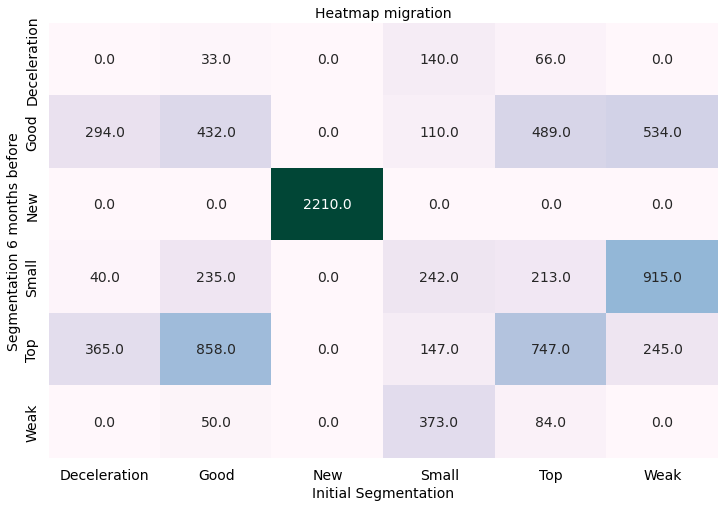

In [ ]:
# Heatmap of the segmentation
sns.heatmap(pd.crosstab([MASTER_RFM_bis.final_SEGMENTATION_RFM_bis], 
                        [MASTER_RFM.final_SEGMENTATION_RFM]),
            cmap="PuBuGn", annot=True, cbar=False, fmt='.1f')
plt.xlabel("Initial Segmentation")
plt.ylabel("Segmentation 6 months before")
plt.title("Heatmap migration")